In [14]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error

In [15]:
def cargar_tablas_a_dataframes(host, database, user, password):
    """
    Se conecta a una base de datos MySQL y carga todas las tablas como DataFrames de Pandas
    con nombres dinámicos en el entorno global (ej. df_nombreTabla).
    """
    try:
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        if connection.is_connected():
            cursor = connection.cursor()  # Creación de un cursor para ejecutar consultas SQL
            cursor.execute("SHOW TABLES")  # Se ejecuta la consulta "SHOW TABLES" para listar las tablas

            tablas = [tabla[0] for tabla in cursor.fetchall()]  # Se obtienen los nombres de las tablas

            for tabla in tablas:
                cursor.execute(f"SELECT * FROM {tabla}")  # Se extraen los datos de cada tabla
                columnas = [columna[0] for columna in cursor.description]  # Nombres de columnas
                globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)  # DataFrame dinámico
                print(f'df_{tabla}')  # Mostrar el nombre del DataFrame creado

    except Error as e:
        print("Error while connecting to MySQL:", e)  # Manejo de errores

    finally:
        if 'connection' in locals() and connection.is_connected():
            cursor.close()  # Cierra el cursor
            connection.close()  # Cierra la conexión
            print("MySQL connection is closed")  # Mensaje de cierre

In [16]:
cargar_tablas_a_dataframes('localhost', 'f1_database', 'root', 'toor')

df_circuits
df_constructor_results
df_constructor_standings
df_constructors
df_driver_standings
df_drivers
df_newnorm
df_qualifying
df_races
df_results
df_status
MySQL connection is closed


In [17]:
# Configurar estilo de gráficos
sns.set_theme(style='whitegrid')

# Filtrar carreras desde 2003 en adelante
df_races_2003 = df_races[df_races['year'] >= 2003]

# INFORMACION GENERAL

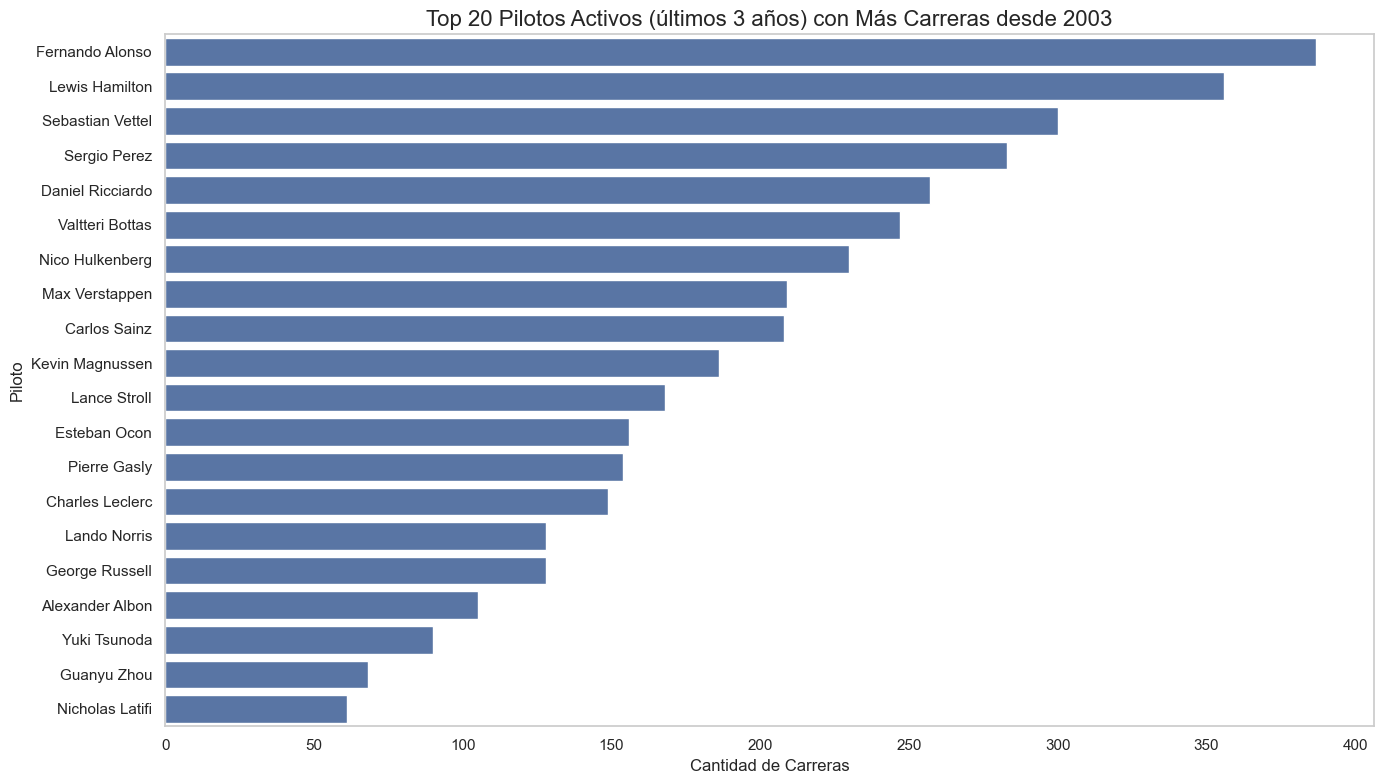

In [18]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]
races_2003_ids = df_races_2003['raceId'].unique()

# 2. Año más reciente (por si cambia)
latest_year = df_races['year'].max()

# 3. Obtener pilotos activos últimos 3 años
recent_races = df_races[df_races['year'] >= latest_year - 2]
recent_driver_ids = df_results[df_results['raceId'].isin(recent_races['raceId'])]['driverId'].unique()

# 4. Filtrar resultados desde 2003
results_2003 = df_results[df_results['raceId'].isin(races_2003_ids)]

# 5. Contar carreras por piloto activo
driver_race_counts = results_2003[results_2003['driverId'].isin(recent_driver_ids)]
driver_race_counts = driver_race_counts.groupby('driverId').size().reset_index(name='race_count')

# 6. Obtener nombres de pilotos
driver_race_counts = pd.merge(driver_race_counts, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
driver_race_counts['name'] = driver_race_counts['forename'] + ' ' + driver_race_counts['surname']

# 7. Top 20 pilotos con más carreras
top20 = driver_race_counts.sort_values(by='race_count', ascending=False).head(20)

# 8. Graficar
plt.figure(figsize=(14, 8))
sns.barplot(data=top20, x='race_count', y='name')

plt.title('Top 20 Pilotos Activos (últimos 3 años) con Más Carreras desde 2003', fontsize=16)
plt.xlabel('Cantidad de Carreras')
plt.ylabel('Piloto')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

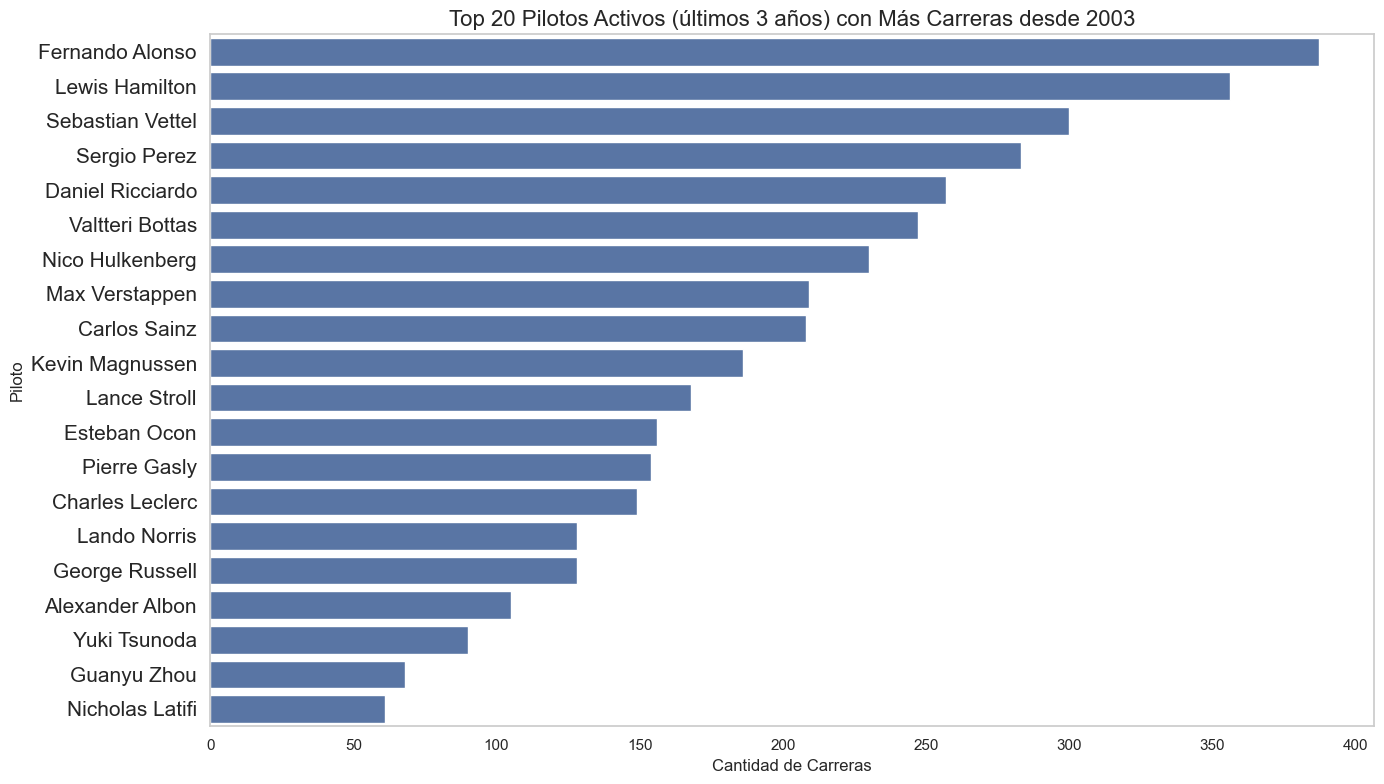

In [19]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]
races_2003_ids = df_races_2003['raceId'].unique()

# 2. Año más reciente (por si cambia)
latest_year = df_races['year'].max()

# 3. Obtener pilotos activos últimos 3 años
recent_races = df_races[df_races['year'] >= latest_year - 2]
recent_driver_ids = df_results[df_results['raceId'].isin(recent_races['raceId'])]['driverId'].unique()

# 4. Filtrar resultados desde 2003
results_2003 = df_results[df_results['raceId'].isin(races_2003_ids)]

# 5. Contar carreras por piloto activo
driver_race_counts = results_2003[results_2003['driverId'].isin(recent_driver_ids)]
driver_race_counts = driver_race_counts.groupby('driverId').size().reset_index(name='race_count')

# 6. Obtener nombres de pilotos
driver_race_counts = pd.merge(driver_race_counts, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
driver_race_counts['name'] = driver_race_counts['forename'] + ' ' + driver_race_counts['surname']

# 7. Top 20 pilotos con más carreras
top20 = driver_race_counts.sort_values(by='race_count', ascending=False).head(20)

# 8. Graficar
plt.figure(figsize=(14, 8))
sns.barplot(data=top20, x='race_count', y='name')

plt.title('Top 20 Pilotos Activos (últimos 3 años) con Más Carreras desde 2003', fontsize=16)
plt.xlabel('Cantidad de Carreras')
plt.ylabel('Piloto')

# Aumentar el tamaño de letra de los nombres de los pilotos
plt.yticks(fontsize=15)  # Puedes ajustar este valor según necesites

plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\1197102656.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=constructor_counts, x='Total Races', y='name', palette=colors)


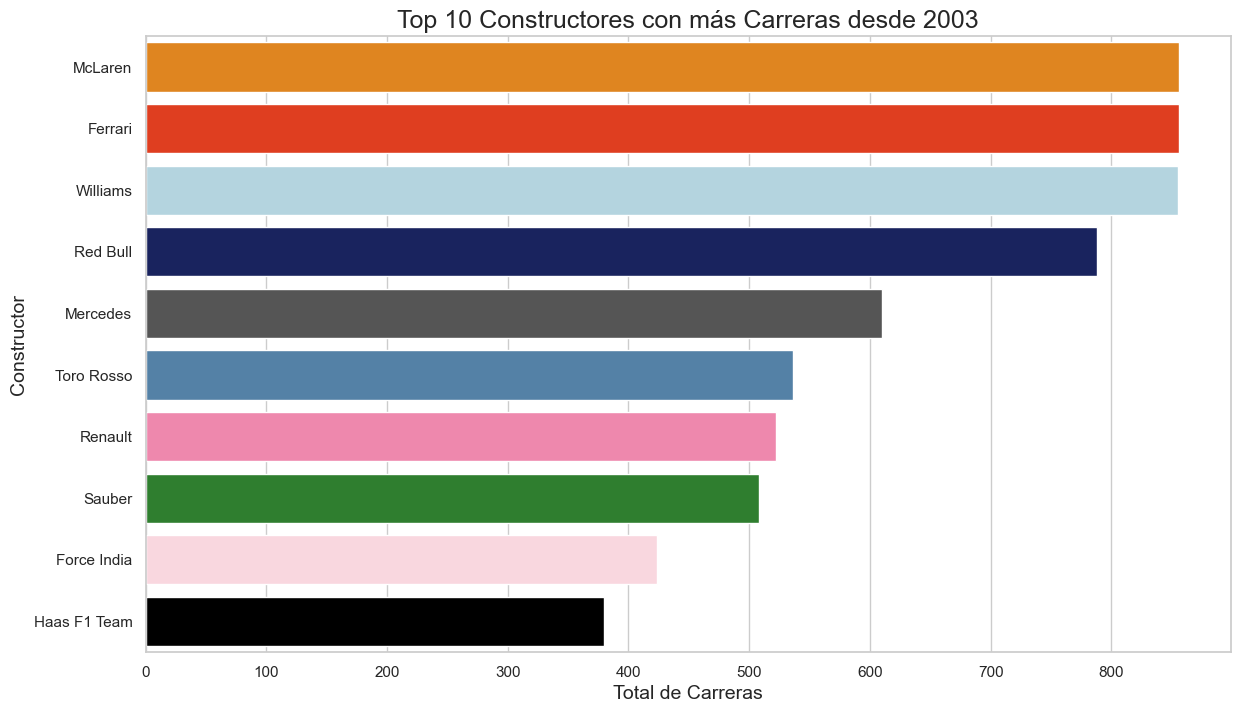

In [20]:
# Colores específicos para cada constructor
constructor_colors = {
    'McLaren': '#FF8700',       # Naranja
    'Ferrari': '#FF2800',       # Rojo oscuro
    'Williams': '#ADD8E6',      # Azul muy claro
    'Red Bull': '#0D1B6A',      # Azul marino
    'Mercedes': '#555555',      # Gris oscuro
    'Toro Rosso': '#4682B4',    # Azul claro
    'Renault': '#FF77A9',       # Rosa medio
    'Sauber': '#228B22',        # Verde pistacho
    'Force India': '#FFD1DC',   # Rosa pálido
    'Haas F1 Team': '#000000',   # Negro
    'Aston Martin': "#043204"
}

# 3. Top 10 Constructores con más Carreras desde 2003
constructor_counts = (df_results[df_results['raceId'].isin(df_races_2003['raceId'])]
                      .groupby('constructorId')['raceId'].count()
                      .reset_index())
constructor_counts.columns = ['constructorId', 'Total Races']

# Añadir nombres de constructores
constructor_counts = pd.merge(constructor_counts, df_constructors[['constructorId', 'name']], on='constructorId')
constructor_counts = constructor_counts.sort_values(by='Total Races', ascending=False).head(10)

# Definir la paleta de colores en el orden correcto
colors = [constructor_colors.get(name, '#808080') for name in constructor_counts['name']]

plt.figure(figsize=(14, 8))
sns.barplot(data=constructor_counts, x='Total Races', y='name', palette=colors)
plt.title('Top 10 Constructores con más Carreras desde 2003', fontsize=18)
plt.xlabel('Total de Carreras', fontsize=14)
plt.ylabel('Constructor', fontsize=14)
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2684574221.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=constructor_counts, x='Total Races', y='name', palette=colors)


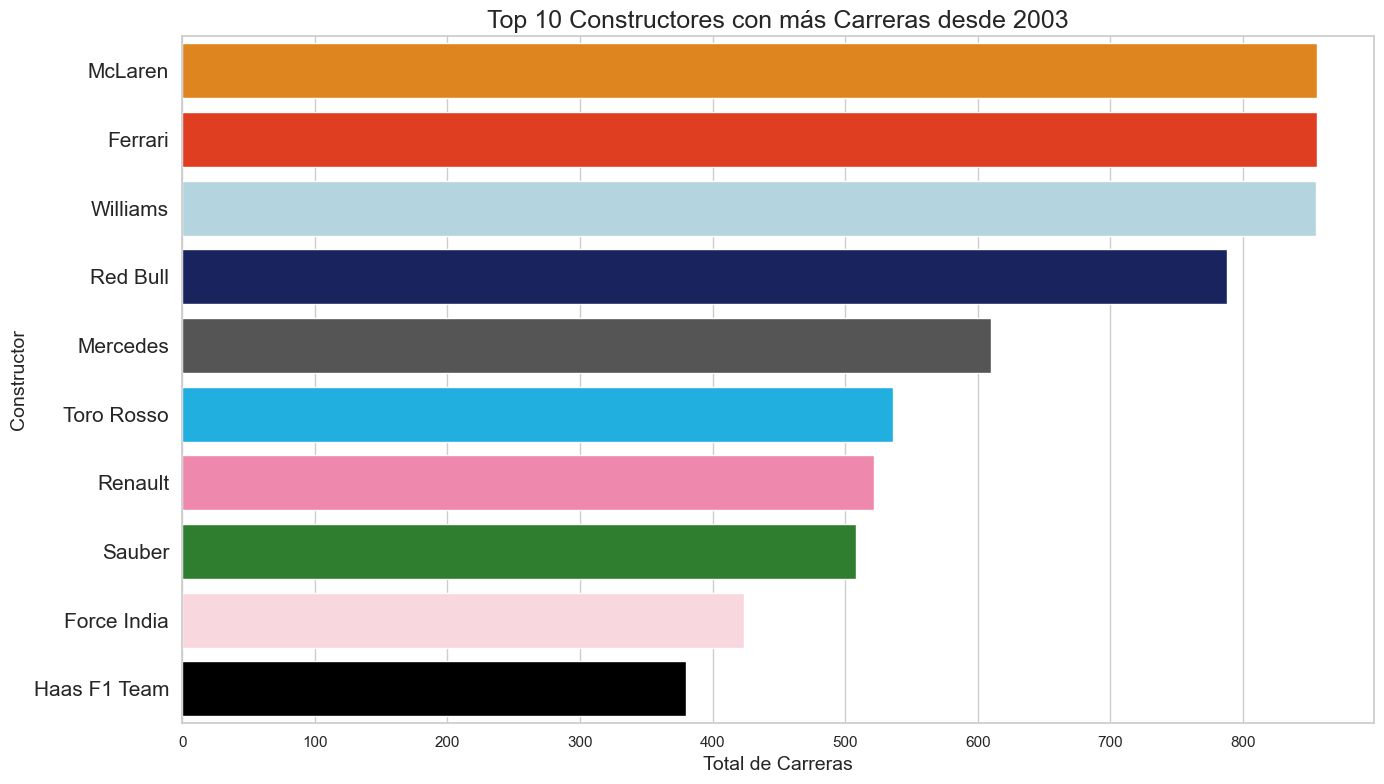

In [21]:
# Colores específicos para cada constructor (Toro Rosso modificado)
constructor_colors = {
    'McLaren': '#FF8700',       # Naranja
    'Ferrari': '#FF2800',       # Rojo oscuro
    'Williams': '#ADD8E6',      # Azul muy claro
    'Red Bull': '#0D1B6A',      # Azul marino
    'Mercedes': '#555555',      # Gris oscuro
    'Toro Rosso': '#00BFFF',    # Azul claro brillante (DeepSkyBlue)
    'Renault': '#FF77A9',       # Rosa medio
    'Sauber': '#228B22',        # Verde pistacho
    'Force India': '#FFD1DC',   # Rosa pálido
    'Haas F1 Team': '#000000'   # Negro
}

# 3. Top 10 Constructores con más Carreras desde 2003
constructor_counts = (
    df_results[df_results['raceId'].isin(df_races_2003['raceId'])]
    .groupby('constructorId')['raceId'].count()
    .reset_index()
)
constructor_counts.columns = ['constructorId', 'Total Races']

# Añadir nombres de constructores
constructor_counts = pd.merge(constructor_counts, df_constructors[['constructorId', 'name']], on='constructorId')
constructor_counts = constructor_counts.sort_values(by='Total Races', ascending=False).head(10)

# Definir la paleta de colores en el orden correcto
colors = [constructor_colors.get(name, '#808080') for name in constructor_counts['name']]

plt.figure(figsize=(14, 8))
sns.barplot(data=constructor_counts, x='Total Races', y='name', palette=colors)

plt.title('Top 10 Constructores con más Carreras desde 2003', fontsize=18)
plt.xlabel('Total de Carreras', fontsize=14)
plt.ylabel('Constructor', fontsize=14)

# Aumentar el tamaño de los nombres en el eje Y
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

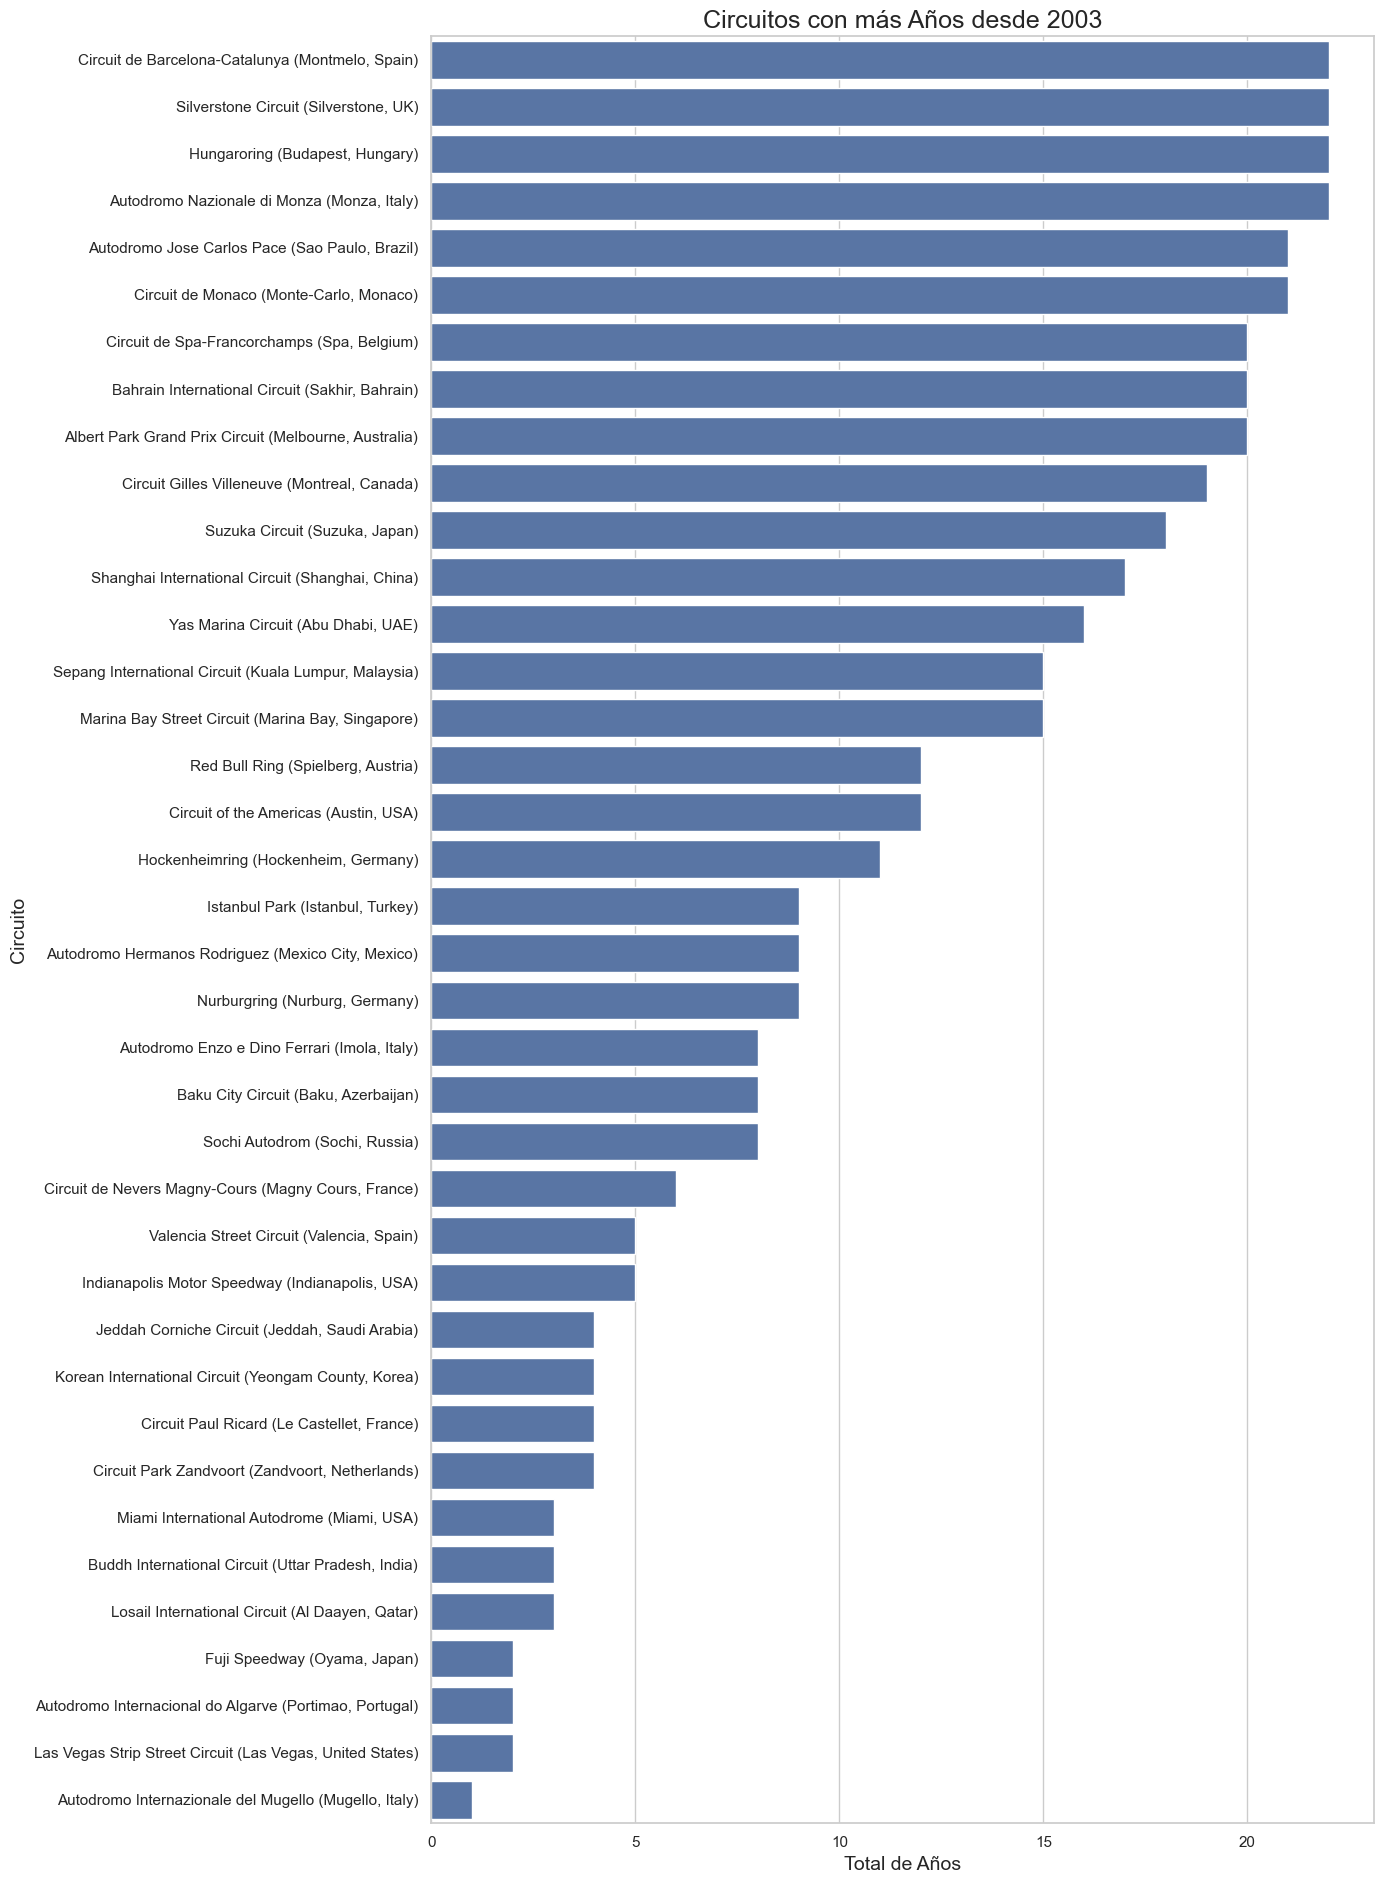

In [22]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 2. Años en los que se ha corrido en cada circuito desde 2003
circuit_years = df_races_2003.groupby('circuitId')['year'].nunique().reset_index()
circuit_years.columns = ['circuitId', 'Total Years']

# 3. Añadir información del circuito
circuit_info = df_circuits[['circuitId', 'name', 'location', 'country']]
circuit_years = pd.merge(circuit_years, circuit_info, on='circuitId')

# 4. Crear columna de nombre combinado
circuit_years['Circuit Display'] = (
    circuit_years['name'] + ' (' + circuit_years['location'] + ', ' + circuit_years['country'] + ')'
)

# 5. Ordenar por cantidad de años
circuit_years = circuit_years.sort_values(by='Total Years', ascending=False)

# 6. Graficar
plt.figure(figsize=(14, len(circuit_years) / 2))
sns.barplot(data=circuit_years, x='Total Years', y='Circuit Display')
plt.title('Circuitos con más Años desde 2003', fontsize=18)
plt.xlabel('Total de Años', fontsize=14)
plt.ylabel('Circuito', fontsize=14)
plt.tight_layout()
plt.show()

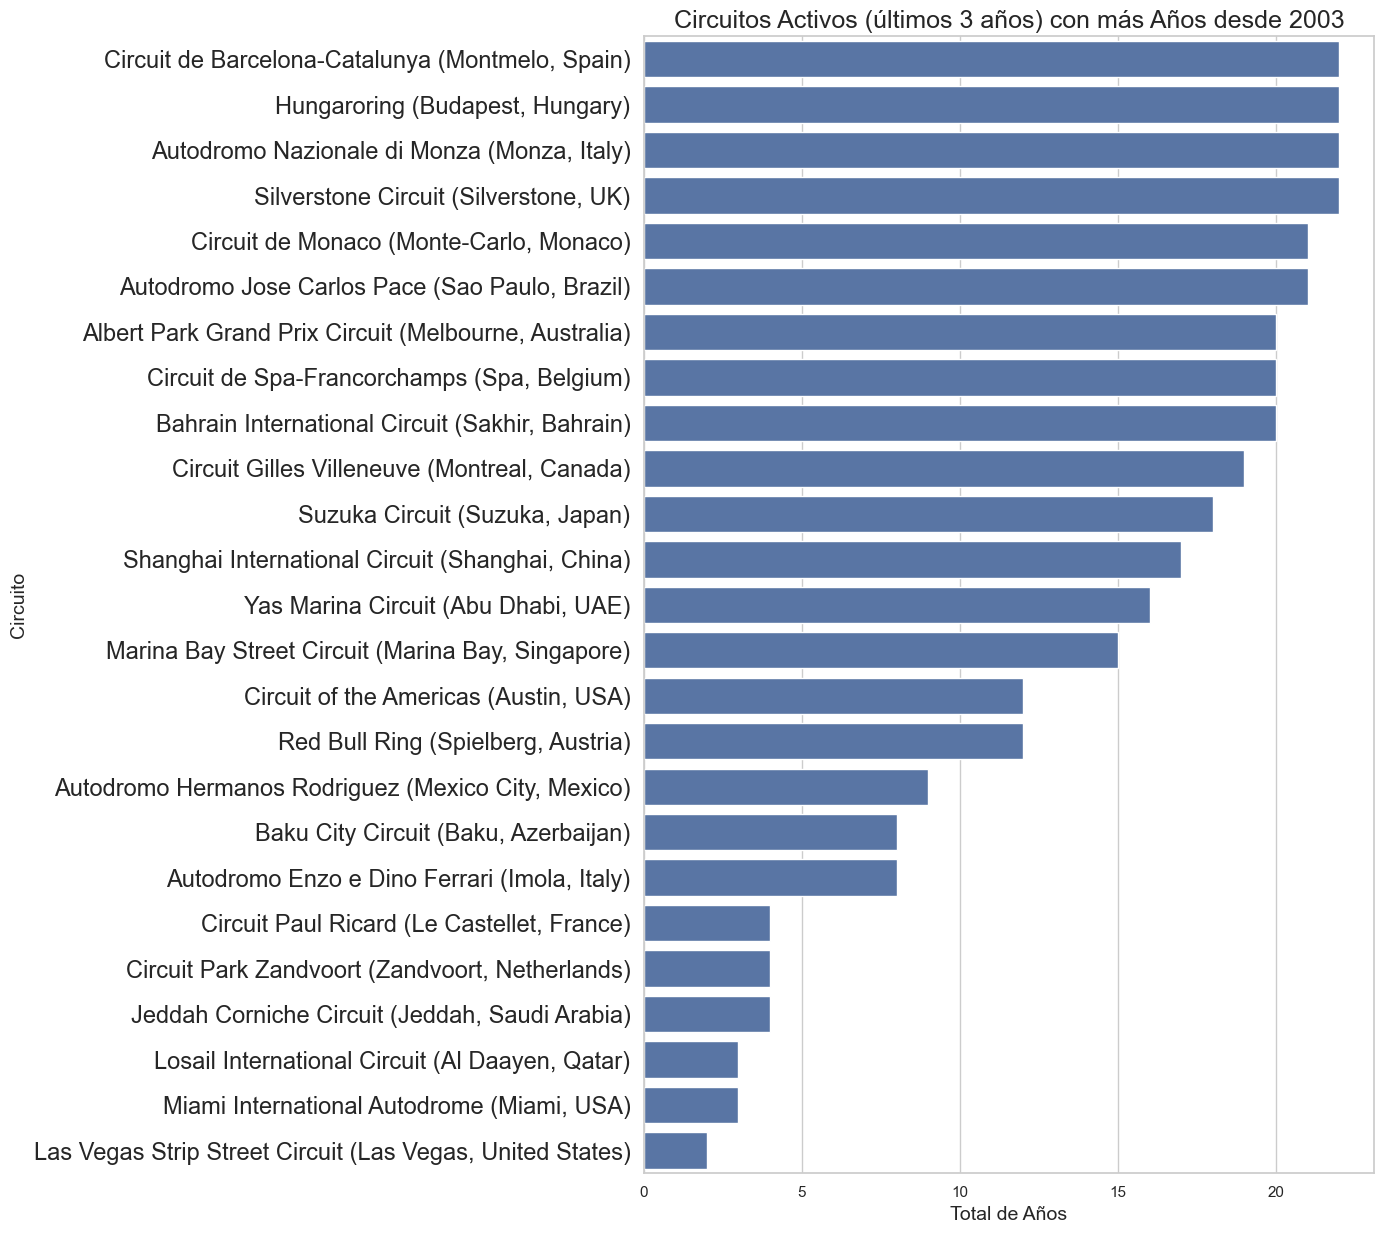

In [23]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 2. Año más reciente
latest_year = df_races['year'].max()

# 3. Circuitos activos en los últimos 3 años
recent_circuits = df_races[df_races['year'] >= latest_year - 2]['circuitId'].unique()

# 4. Años en los que se ha corrido en cada circuito desde 2003
circuit_years = df_races_2003.groupby('circuitId')['year'].nunique().reset_index()
circuit_years.columns = ['circuitId', 'Total Years']

# 5. Filtrar solo circuitos activos últimos 3 años
circuit_years = circuit_years[circuit_years['circuitId'].isin(recent_circuits)]

# 6. Añadir info del circuito
circuit_info = df_circuits[['circuitId', 'name', 'location', 'country']]
circuit_years = pd.merge(circuit_years, circuit_info, on='circuitId')

# 7. Crear columna combinada
circuit_years['Circuit Display'] = (
    circuit_years['name'] + ' (' + circuit_years['location'] + ', ' + circuit_years['country'] + ')'
)

# 8. Ordenar por cantidad de años
circuit_years = circuit_years.sort_values(by='Total Years', ascending=False)

# 9. Graficar
plt.figure(figsize=(14, len(circuit_years) / 2))
sns.barplot(data=circuit_years, x='Total Years', y='Circuit Display')

plt.title('Circuitos Activos (últimos 3 años) con más Años desde 2003', fontsize=18)
plt.xlabel('Total de Años', fontsize=14)
plt.ylabel('Circuito', fontsize=14)

# Aumentar el tamaño de letra de los nombres de los circuitos
plt.yticks(fontsize=17)

plt.tight_layout()
plt.show()

In [24]:
# 4. Total de carreras desde 2003
num_total_carreras = len(df_races_2003)
print(f"Total de carreras desde 2003: {num_total_carreras}")

Total de carreras desde 2003: 428


# IMPACTO NORMATIVO

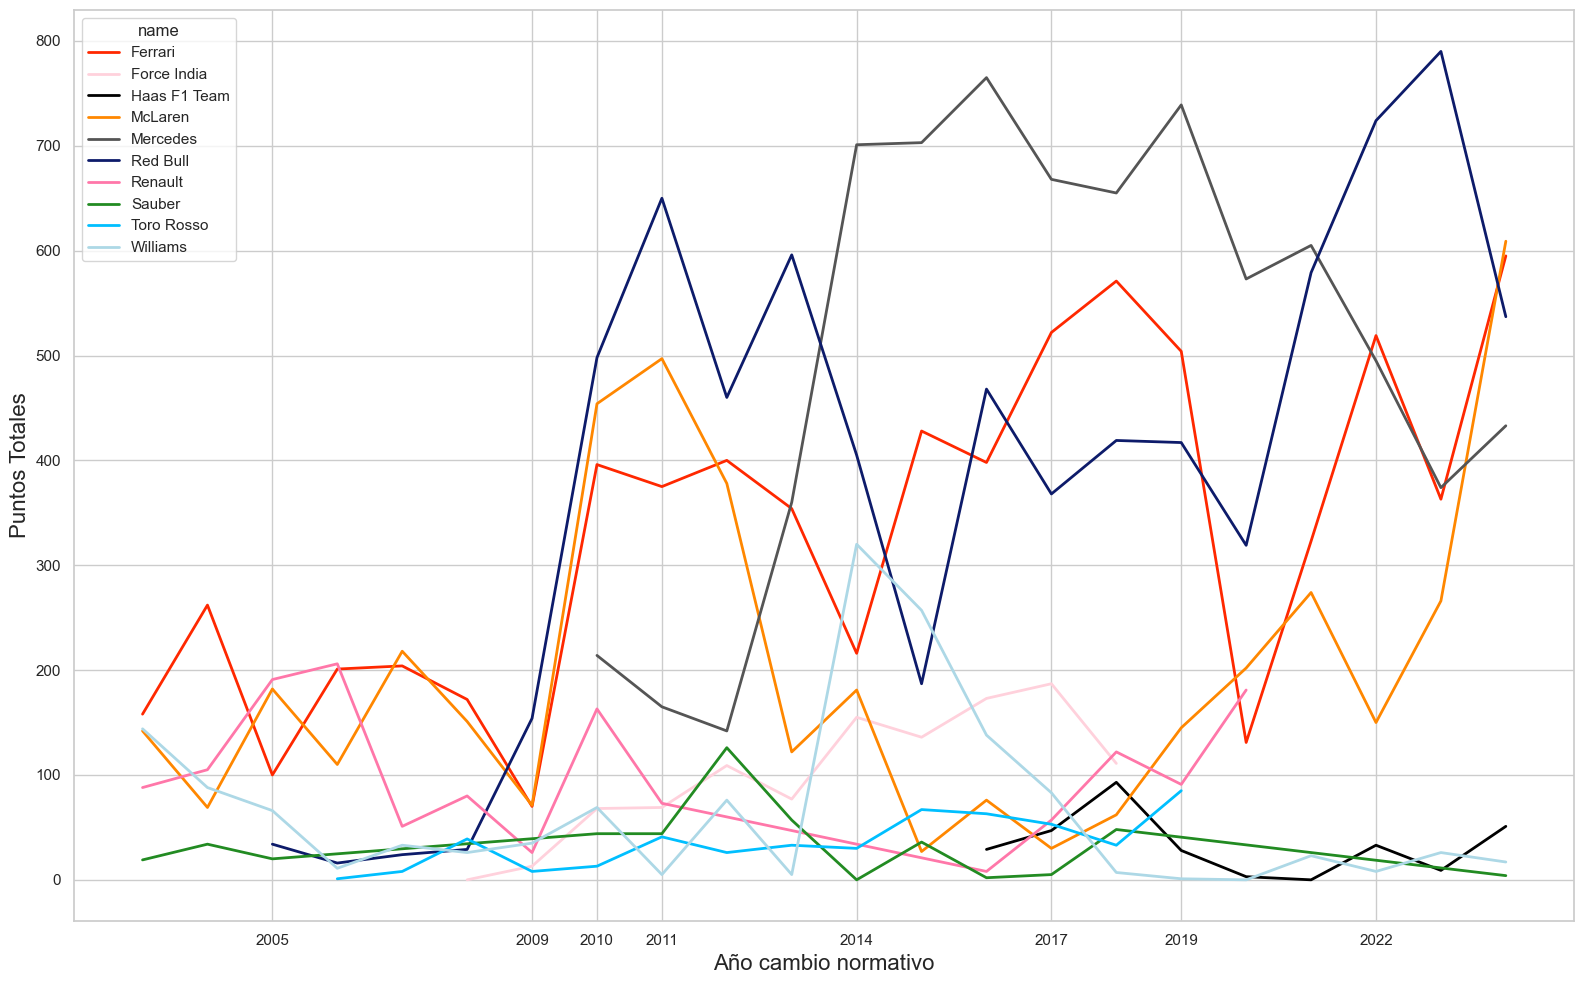

In [25]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 2. Resultados desde 2003
df_results_2003 = df_results[df_results['raceId'].isin(df_races_2003['raceId'])]

# 3. Top 10 constructores con más carreras desde 2003
constructor_counts = (
    df_results_2003.groupby('constructorId')['raceId'].count()
    .reset_index()
    .rename(columns={'raceId': 'Total Races'})
)
constructor_counts = pd.merge(constructor_counts, df_constructors[['constructorId', 'name']], on='constructorId')
top10_constructors = constructor_counts.sort_values(by='Total Races', ascending=False).head(10)

# 4. Sumar puntos por carrera y agregar año
df_points = pd.merge(df_results_2003, df_races[['raceId', 'year']], on='raceId')
df_points = pd.merge(df_points, df_constructors[['constructorId', 'name']], on='constructorId')

# 5. Filtrar solo top 10 constructores
df_points = df_points[df_points['name'].isin(top10_constructors['name'])]

# 6. Agrupar por constructor y año para obtener puntos totales anuales
df_points_yearly = df_points.groupby(['name', 'year'])['points'].sum().reset_index()

# 7. Usar colores consistentes
palette = [constructor_colors.get(name, '#808080') for name in df_points_yearly['name'].unique()]

# 8. Graficar
plt.figure(figsize=(16, 10))
sns.lineplot(data=df_points_yearly, x='year', y='points', hue='name', linewidth=2, palette=palette, errorbar=None)
# plt.title('Puntos Totales por Año (Top 10 Constructores con Más Carreras desde 2003)', fontsize=20)
plt.xlabel('Año cambio normativo', fontsize=16)
plt.ylabel('Puntos Totales', fontsize=16)

# 9. Mostrar solo años relevantes en eje X
años_marcados = [2005, 2009, 2010, 2011, 2014, 2017, 2019, 2022]
plt.xticks(años_marcados)

plt.tight_layout()
plt.show()

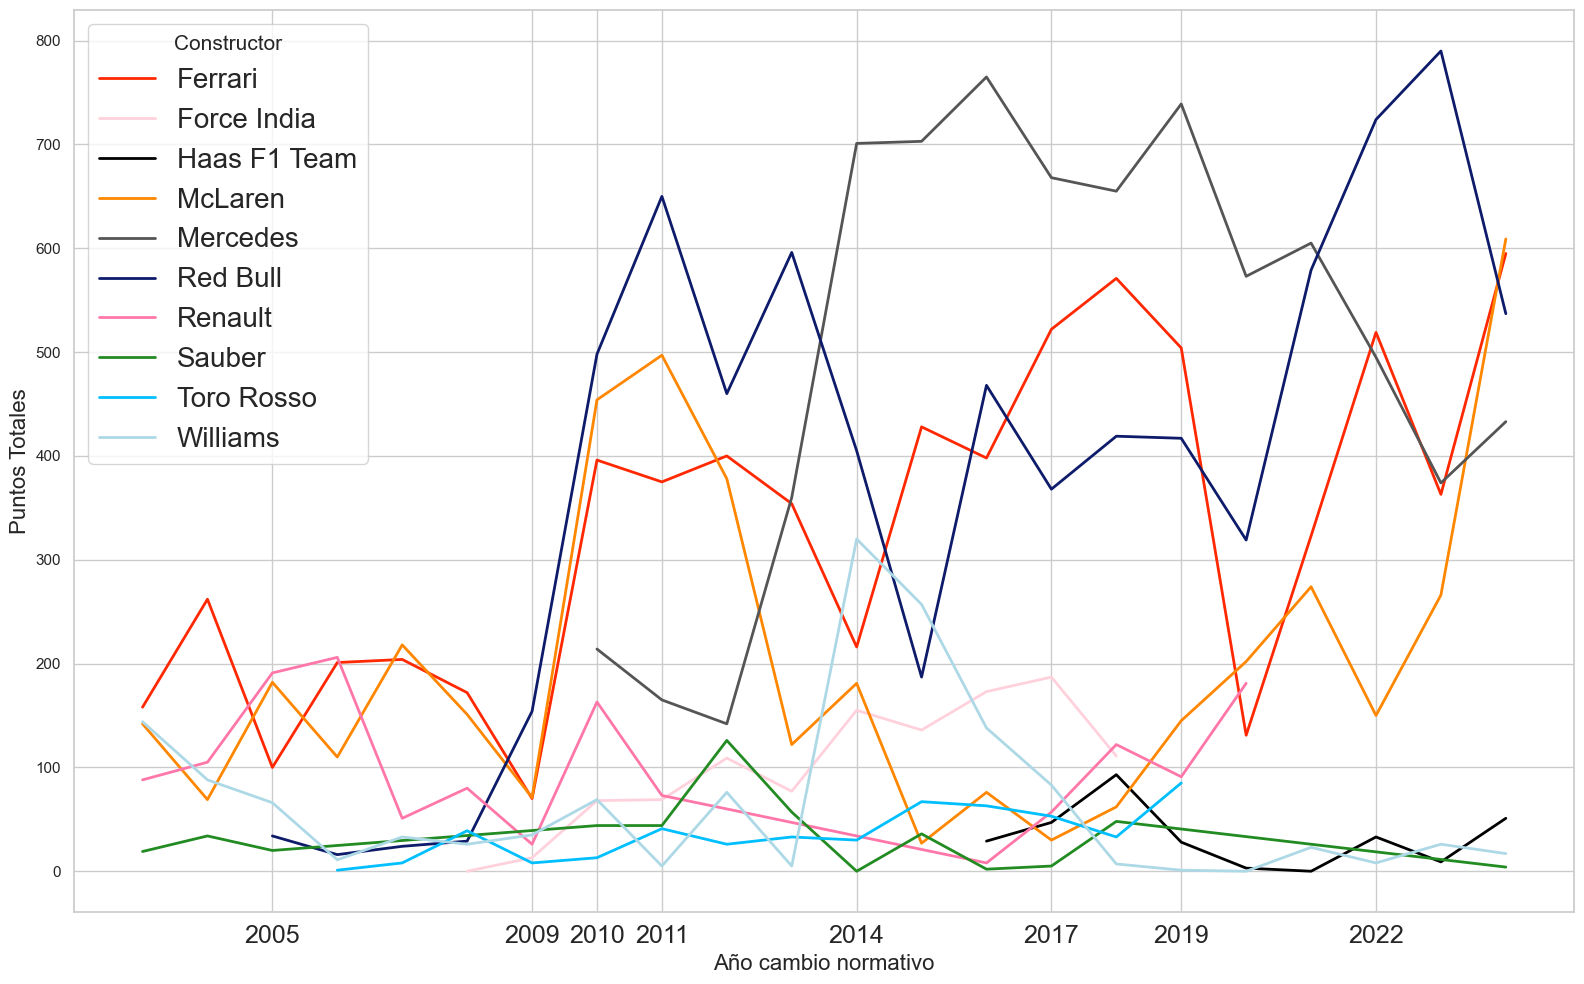

In [26]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 2. Resultados desde 2003
df_results_2003 = df_results[df_results['raceId'].isin(df_races_2003['raceId'])]

# 3. Top 10 constructores con más carreras desde 2003
constructor_counts = (
    df_results_2003.groupby('constructorId')['raceId'].count()
    .reset_index()
    .rename(columns={'raceId': 'Total Races'})
)
constructor_counts = pd.merge(constructor_counts, df_constructors[['constructorId', 'name']], on='constructorId')
top10_constructors = constructor_counts.sort_values(by='Total Races', ascending=False).head(10)

# 4. Sumar puntos por carrera y agregar año
df_points = pd.merge(df_results_2003, df_races[['raceId', 'year']], on='raceId')
df_points = pd.merge(df_points, df_constructors[['constructorId', 'name']], on='constructorId')

# 5. Filtrar solo top 10 constructores
df_points = df_points[df_points['name'].isin(top10_constructors['name'])]

# 6. Agrupar por constructor y año para obtener puntos totales anuales
df_points_yearly = df_points.groupby(['name', 'year'])['points'].sum().reset_index()

# 7. Usar colores consistentes
palette = [constructor_colors.get(name, '#808080') for name in df_points_yearly['name'].unique()]

# 8. Graficar
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=df_points_yearly,
    x='year',
    y='points',
    hue='name',
    linewidth=2,
    palette=palette,
    errorbar=None
)

# 9. Títulos y etiquetas
plt.xlabel('Año cambio normativo', fontsize=16)
plt.ylabel('Puntos Totales', fontsize=16)

# Aumentar tamaño de los años en el eje X
años_marcados = [2005, 2009, 2010, 2011, 2014, 2017, 2019, 2022]
plt.xticks(años_marcados, fontsize=18)

# Aumentar tamaño de los nombres de los constructores (leyenda)
plt.legend(title='Constructor', fontsize=20, title_fontsize=15)

plt.tight_layout()
plt.show()

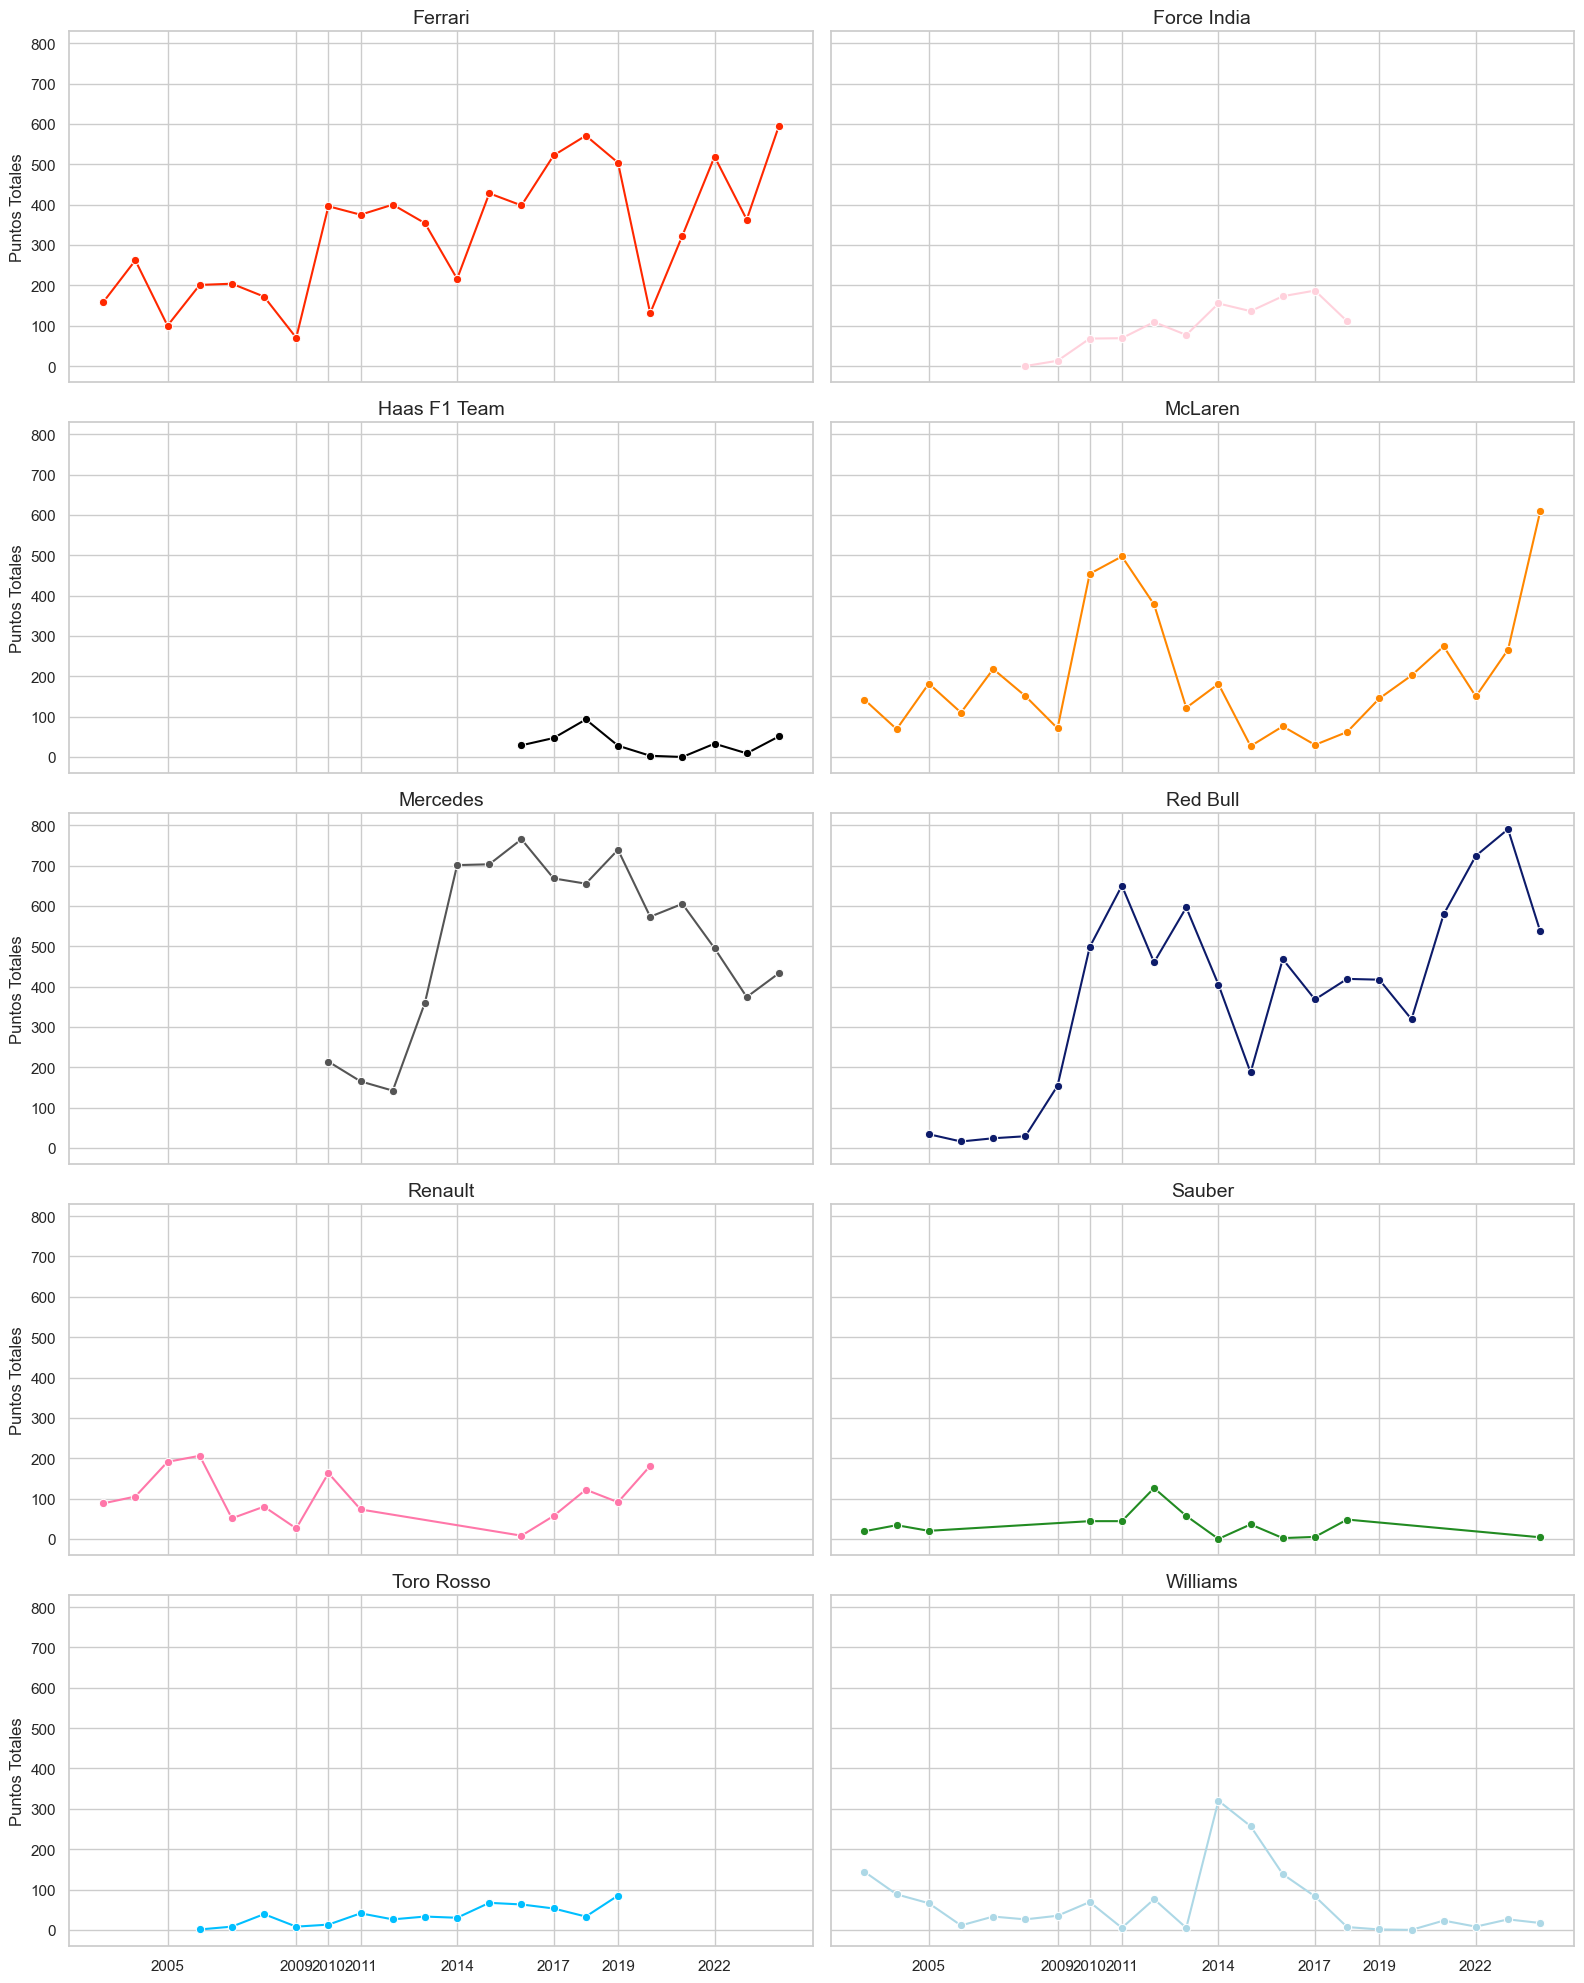

In [27]:
# 1. Asegurar que df_points tenga los campos necesarios (si no está hecho antes)
df_results_2003 = df_results[df_results['raceId'].isin(df_races[df_races['year'] >= 2003]['raceId'])]
df_points = pd.merge(df_results_2003, df_races[['raceId', 'year']], on='raceId')
df_points = pd.merge(df_points, df_constructors[['constructorId', 'name']], on='constructorId')

# 2. Filtrar solo los top 10 constructores por número de carreras
constructor_counts = df_results_2003.groupby('constructorId')['raceId'].count().reset_index(name='Total Races')
constructor_counts = pd.merge(constructor_counts, df_constructors[['constructorId', 'name']], on='constructorId')
top10_constructors = constructor_counts.sort_values(by='Total Races', ascending=False).head(10)
df_points = df_points[df_points['name'].isin(top10_constructors['name'])]

# 3. Agrupar por constructor y año para obtener puntos anuales
df_points_yearly = df_points.groupby(['name', 'year'])['points'].sum().reset_index()

# 4. Lista de constructores únicos
constructors = df_points_yearly['name'].unique()

# 5. Configuración del grid de subplots
n_constructors = len(constructors)
cols = 2
rows = (n_constructors + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), sharex=True, sharey=True)
axes = axes.flatten()

# 6. Plot para cada constructor
for i, constructor in enumerate(constructors):
    ax = axes[i]
    data = df_points_yearly[df_points_yearly['name'] == constructor]
    sns.lineplot(data=data, x='year', y='points', marker='o', ax=ax,
                 color=constructor_colors.get(constructor, '#808080'), errorbar=None)
    ax.set_title(constructor, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Puntos Totales')
    ax.grid(True)
    ax.set_xticks([2005, 2009, 2010, 2011, 2014, 2017, 2019, 2022])  # Años marcados

# 7. Ocultar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 8. Solo etiquetas en la última fila
for ax in axes[:-cols]:
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

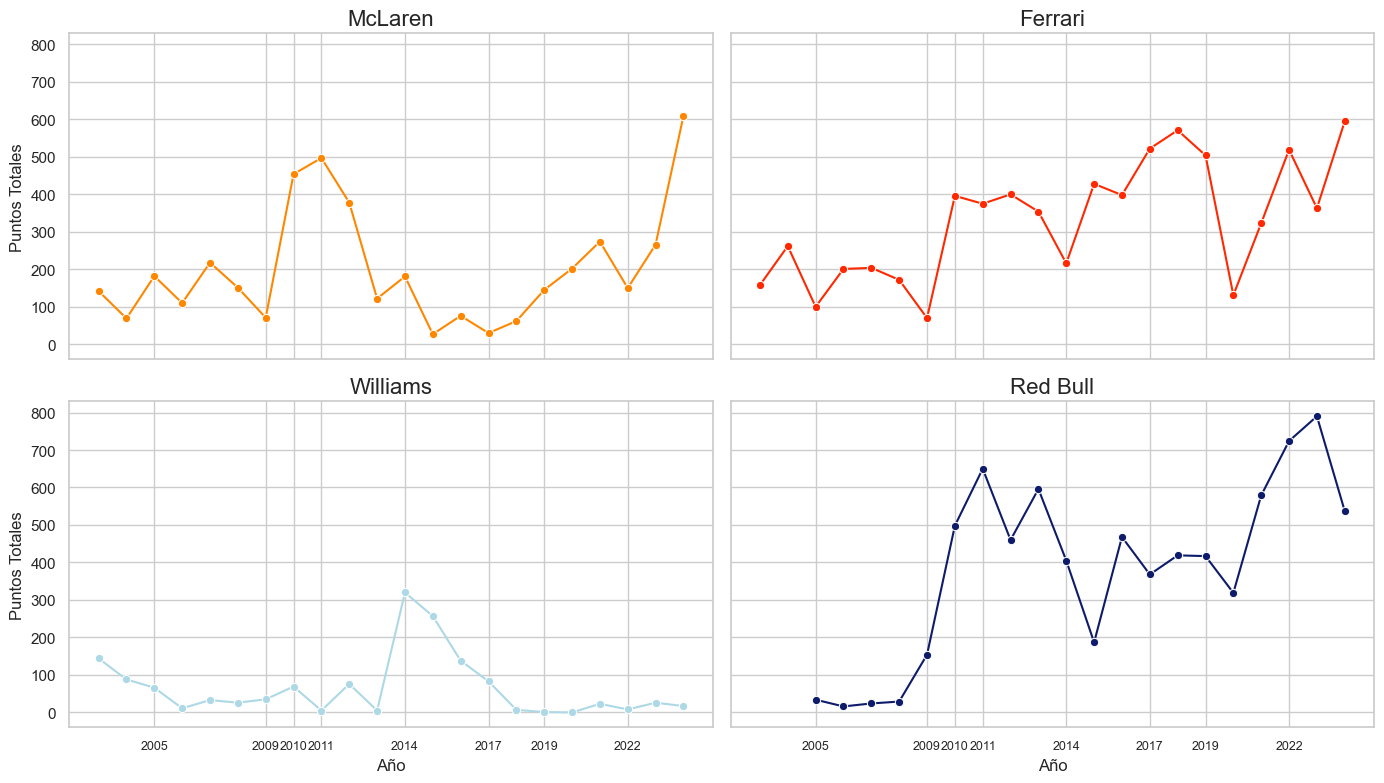

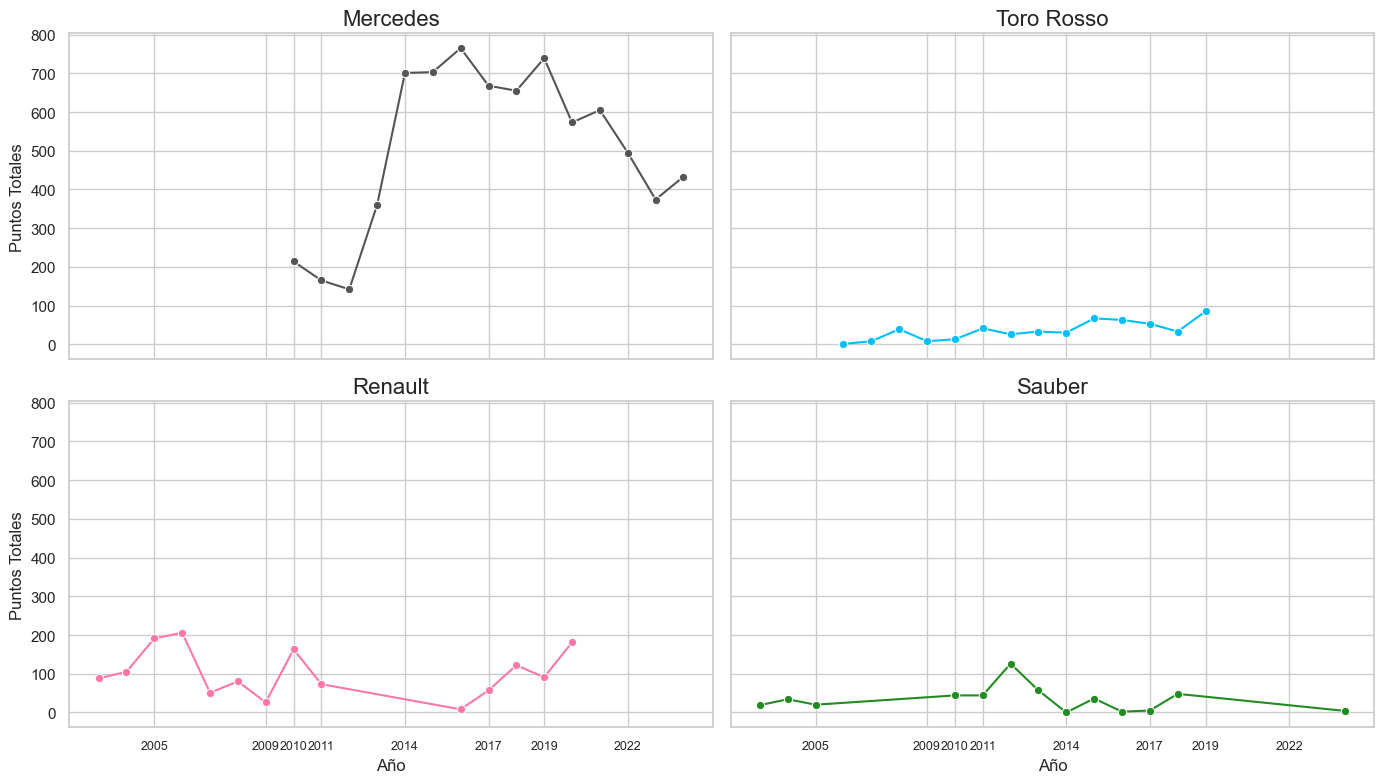

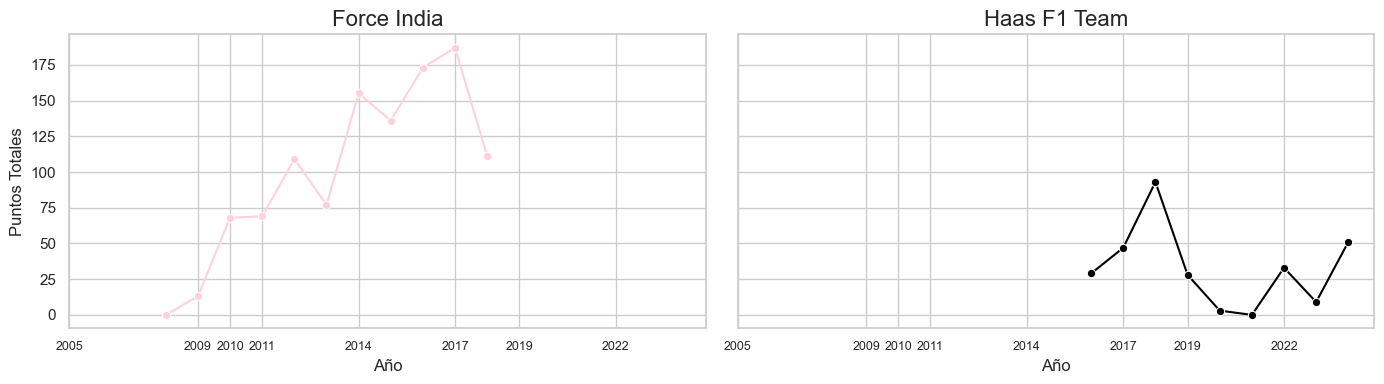

In [28]:
# 1. Preparación previa
df_results_2003 = df_results[df_results['raceId'].isin(df_races[df_races['year'] >= 2003]['raceId'])]
df_points = pd.merge(df_results_2003, df_races[['raceId', 'year']], on='raceId')
df_points = pd.merge(df_points, df_constructors[['constructorId', 'name']], on='constructorId')

# 2. Top 10 constructores por número de carreras
constructor_counts = df_results_2003.groupby('constructorId')['raceId'].count().reset_index(name='Total Races')
constructor_counts = pd.merge(constructor_counts, df_constructors[['constructorId', 'name']], on='constructorId')
top10_constructors = constructor_counts.sort_values(by='Total Races', ascending=False).head(10)
df_points = df_points[df_points['name'].isin(top10_constructors['name'])]

# 3. Puntos anuales
df_points_yearly = df_points.groupby(['name', 'year'])['points'].sum().reset_index()

# 4. Lista de constructores ordenados
constructors = top10_constructors['name'].tolist()

# 5. Años a marcar
años_marcados = [2005, 2009, 2010, 2011, 2014, 2017, 2019, 2022]

# 6. Función para graficar grupos con fuente de años más pequeña
def plot_constructor_group(constructors_sublist):
    n = len(constructors_sublist)
    cols = 2
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, constructor in enumerate(constructors_sublist):
        ax = axes[i]
        data = df_points_yearly[df_points_yearly['name'] == constructor]
        sns.lineplot(data=data, x='year', y='points', marker='o', ax=ax,
                     color=constructor_colors.get(constructor, '#808080'), errorbar=None)
        ax.set_title(constructor, fontsize=16)
        ax.set_xlabel('Año')
        ax.set_ylabel('Puntos Totales')
        ax.set_xticks(años_marcados)
        ax.tick_params(axis='x', labelsize=9)  # Ajuste del tamaño de letra de los años
        ax.grid(True)

    # Ocultar ejes vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 7. Graficar en tres grupos
plot_constructor_group(constructors[:4])
plot_constructor_group(constructors[4:8])
plot_constructor_group(constructors[8:])

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2940806246.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=team_points_avg.sort_values(by=['year', 'avg_points'], ascending=[True, False]),


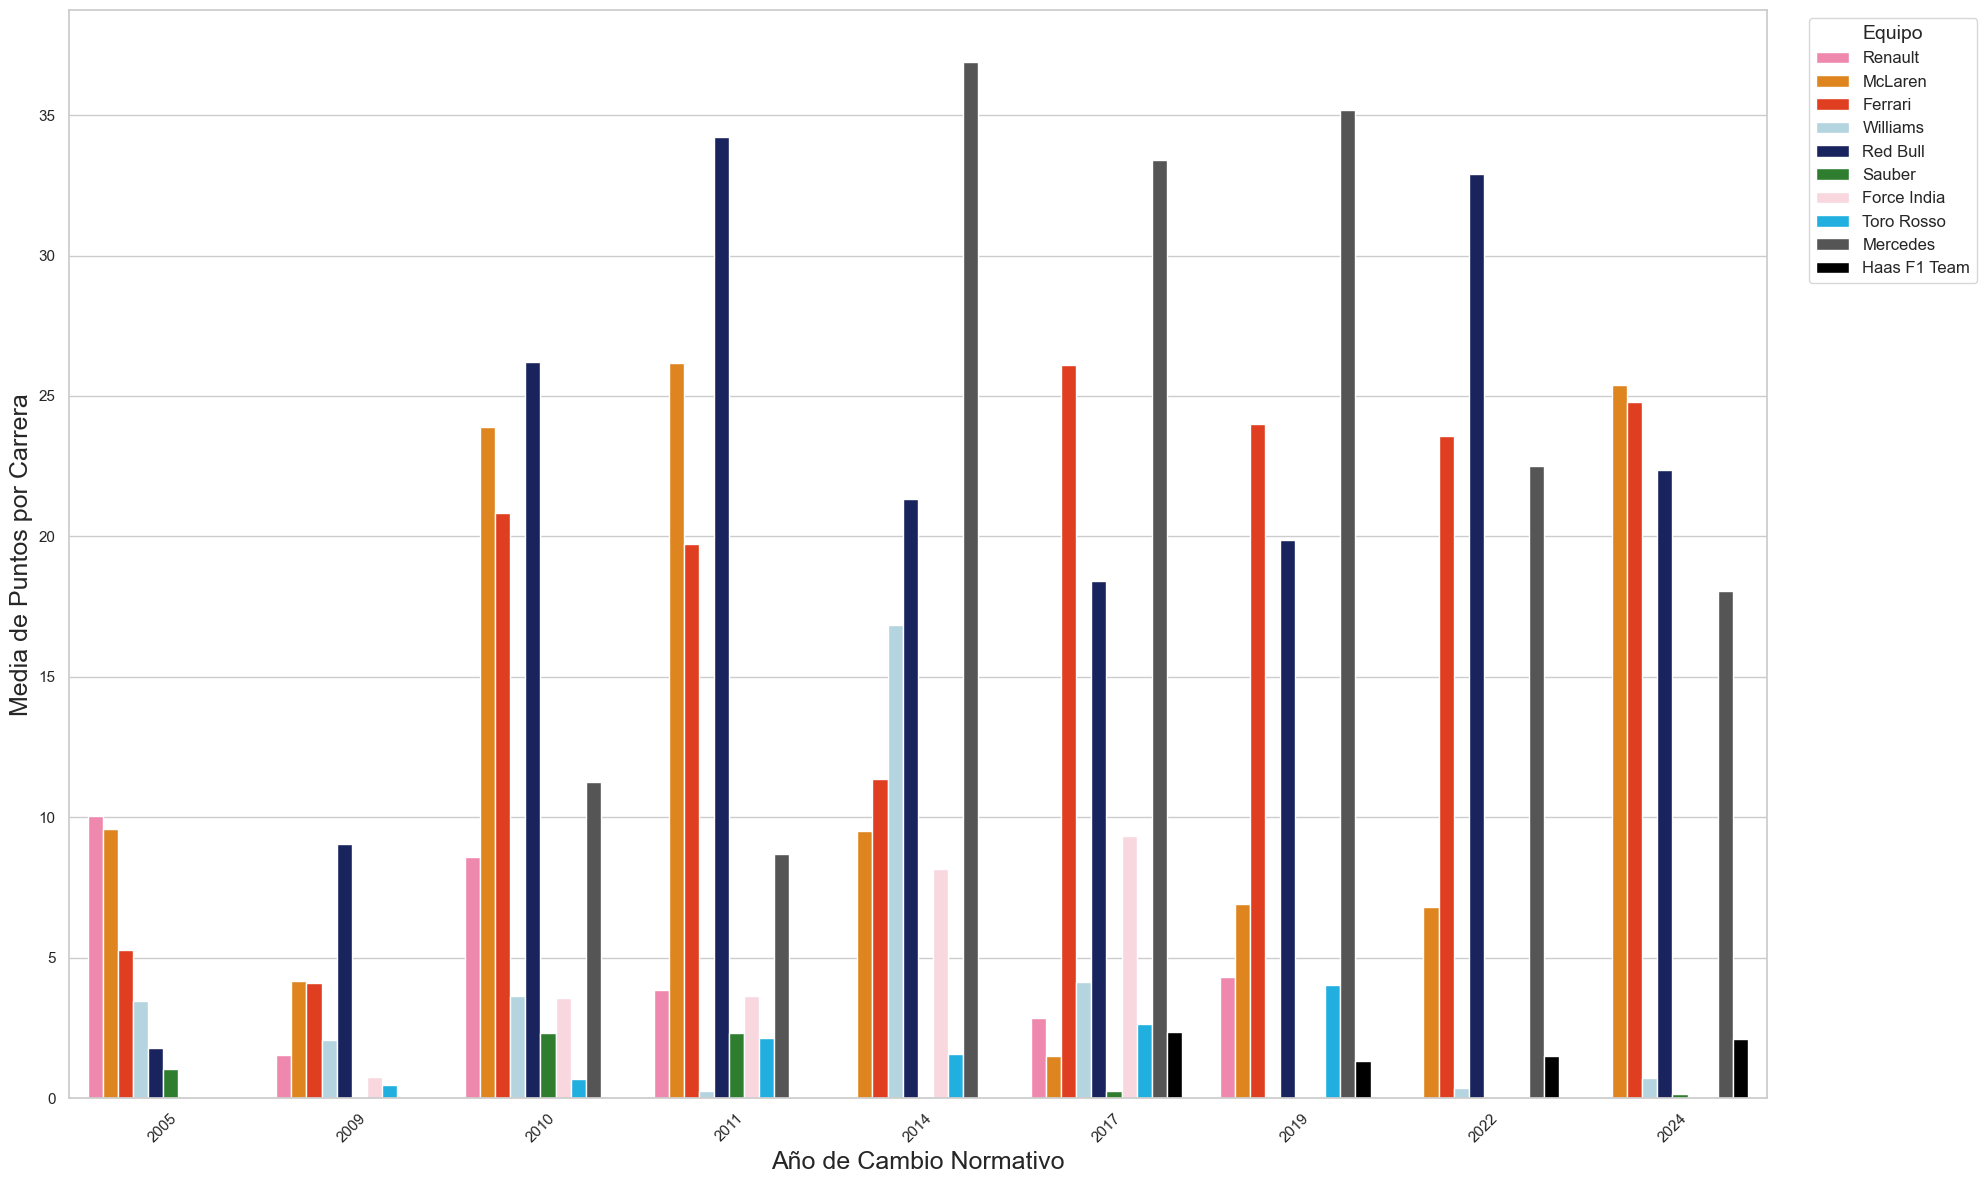

In [29]:
# 1. Filtrar carreras en años normativos + 2024
norm_years = df_newnorm['year'].tolist() + [2024]
df_races_norm_years = df_races[df_races['year'].isin(norm_years)]

# 2. Top 10 equipos con más carreras desde 2003
top_10_teams = (df_results[df_results['raceId'].isin(df_races[df_races['year'] >= 2003]['raceId'])]
                .groupby('constructorId')
                .size()
                .reset_index(name='total_races')
                .sort_values(by='total_races', ascending=False)
                .head(10))

# 3. Filtrar resultados de esos equipos y unir con año
team_points = df_results[df_results['constructorId'].isin(top_10_teams['constructorId'])]
team_points = pd.merge(team_points, df_races_norm_years[['raceId', 'year']], on='raceId')

# 4. Unir con nombre del equipo
team_points = pd.merge(team_points, df_constructors[['constructorId', 'name']], on='constructorId')

# 5. Agrupar por carrera y equipo para sumar puntos por carrera
team_points_per_race = team_points.groupby(['year', 'raceId', 'name'])['points'].sum().reset_index()

# 6. Calcular promedio por equipo y año
team_points_avg = team_points_per_race.groupby(['year', 'name'])['points'].mean().reset_index(name='avg_points')

# 7. Graficar
plt.figure(figsize=(20, 12))
sns.barplot(data=team_points_avg.sort_values(by=['year', 'avg_points'], ascending=[True, False]), 
            x='year', y='avg_points', hue='name', 
            palette=constructor_colors, ci=None)

# plt.title('Media de Puntos por Carrera de los 10 Equipos con Más Carreras en Años de Cambio Normativo + 2024', fontsize=22)
plt.xlabel('Año de Cambio Normativo', fontsize=18)
plt.ylabel('Media de Puntos por Carrera', fontsize=18)
plt.legend(title='Equipo', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\912789595.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


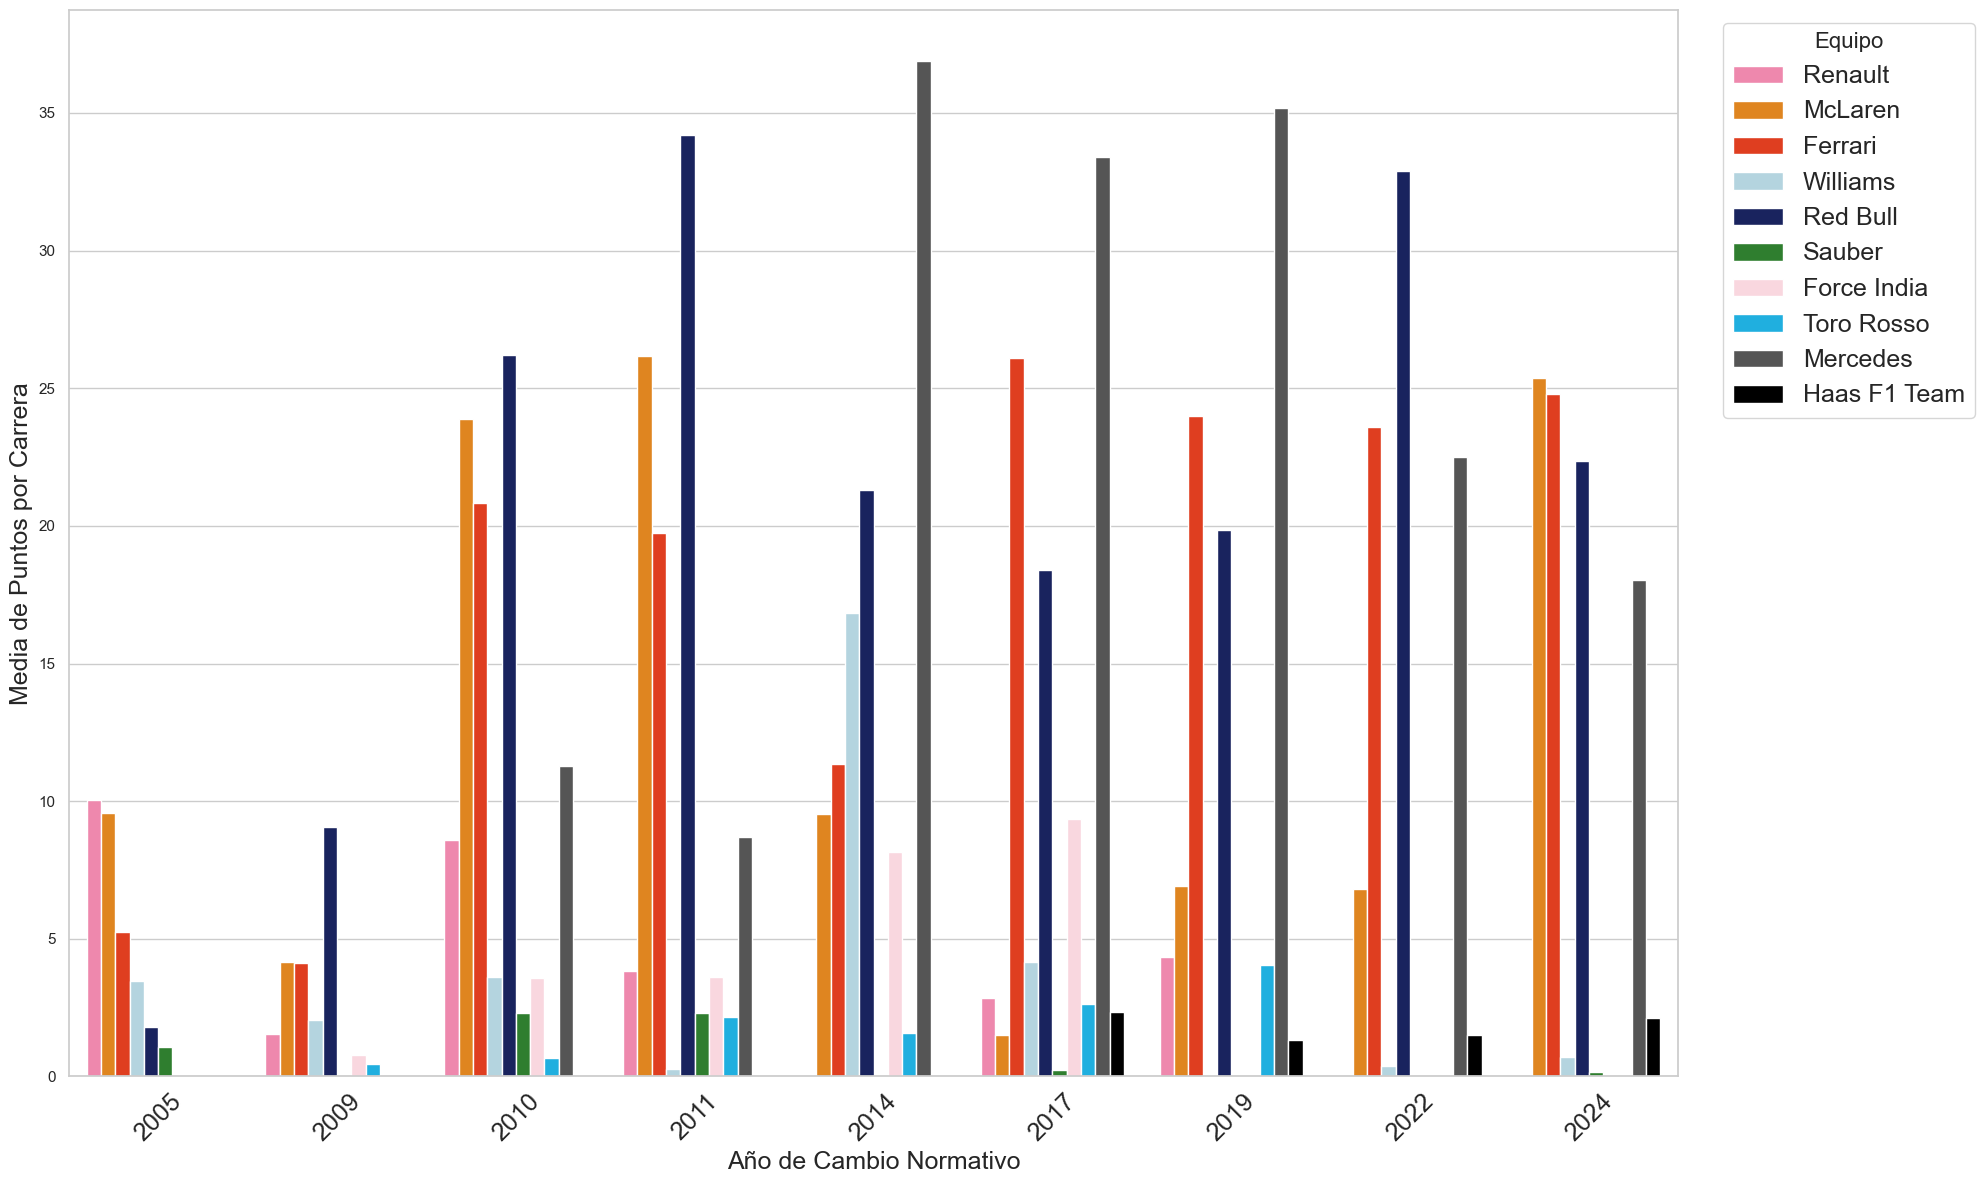

In [30]:
# 1. Filtrar carreras en años normativos + 2024
norm_years = df_newnorm['year'].tolist() + [2024]
df_races_norm_years = df_races[df_races['year'].isin(norm_years)]

# 2. Top 10 equipos con más carreras desde 2003
top_10_teams = (df_results[df_results['raceId'].isin(df_races[df_races['year'] >= 2003]['raceId'])]
                .groupby('constructorId')
                .size()
                .reset_index(name='total_races')
                .sort_values(by='total_races', ascending=False)
                .head(10))

# 3. Filtrar resultados de esos equipos y unir con año
team_points = df_results[df_results['constructorId'].isin(top_10_teams['constructorId'])]
team_points = pd.merge(team_points, df_races_norm_years[['raceId', 'year']], on='raceId')

# 4. Unir con nombre del equipo
team_points = pd.merge(team_points, df_constructors[['constructorId', 'name']], on='constructorId')

# 5. Agrupar por carrera y equipo para sumar puntos por carrera
team_points_per_race = team_points.groupby(['year', 'raceId', 'name'])['points'].sum().reset_index()

# 6. Calcular promedio por equipo y año
team_points_avg = team_points_per_race.groupby(['year', 'name'])['points'].mean().reset_index(name='avg_points')

# 7. Graficar
plt.figure(figsize=(20, 12))
ax = sns.barplot(
    data=team_points_avg.sort_values(by=['year', 'avg_points'], ascending=[True, False]), 
    x='year', y='avg_points', hue='name', 
    palette=constructor_colors, ci=None
)

# Etiquetas y fuentes
plt.xlabel('Año de Cambio Normativo', fontsize=18)
plt.ylabel('Media de Puntos por Carrera', fontsize=18)

# Ajuste de la leyenda (constructores)
plt.legend(title='Equipo', fontsize=18, title_fontsize=16, bbox_to_anchor=(1.02, 1), loc='upper left')

# Tamaño de los años en el eje X
ax.tick_params(axis='x', labelsize=18)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

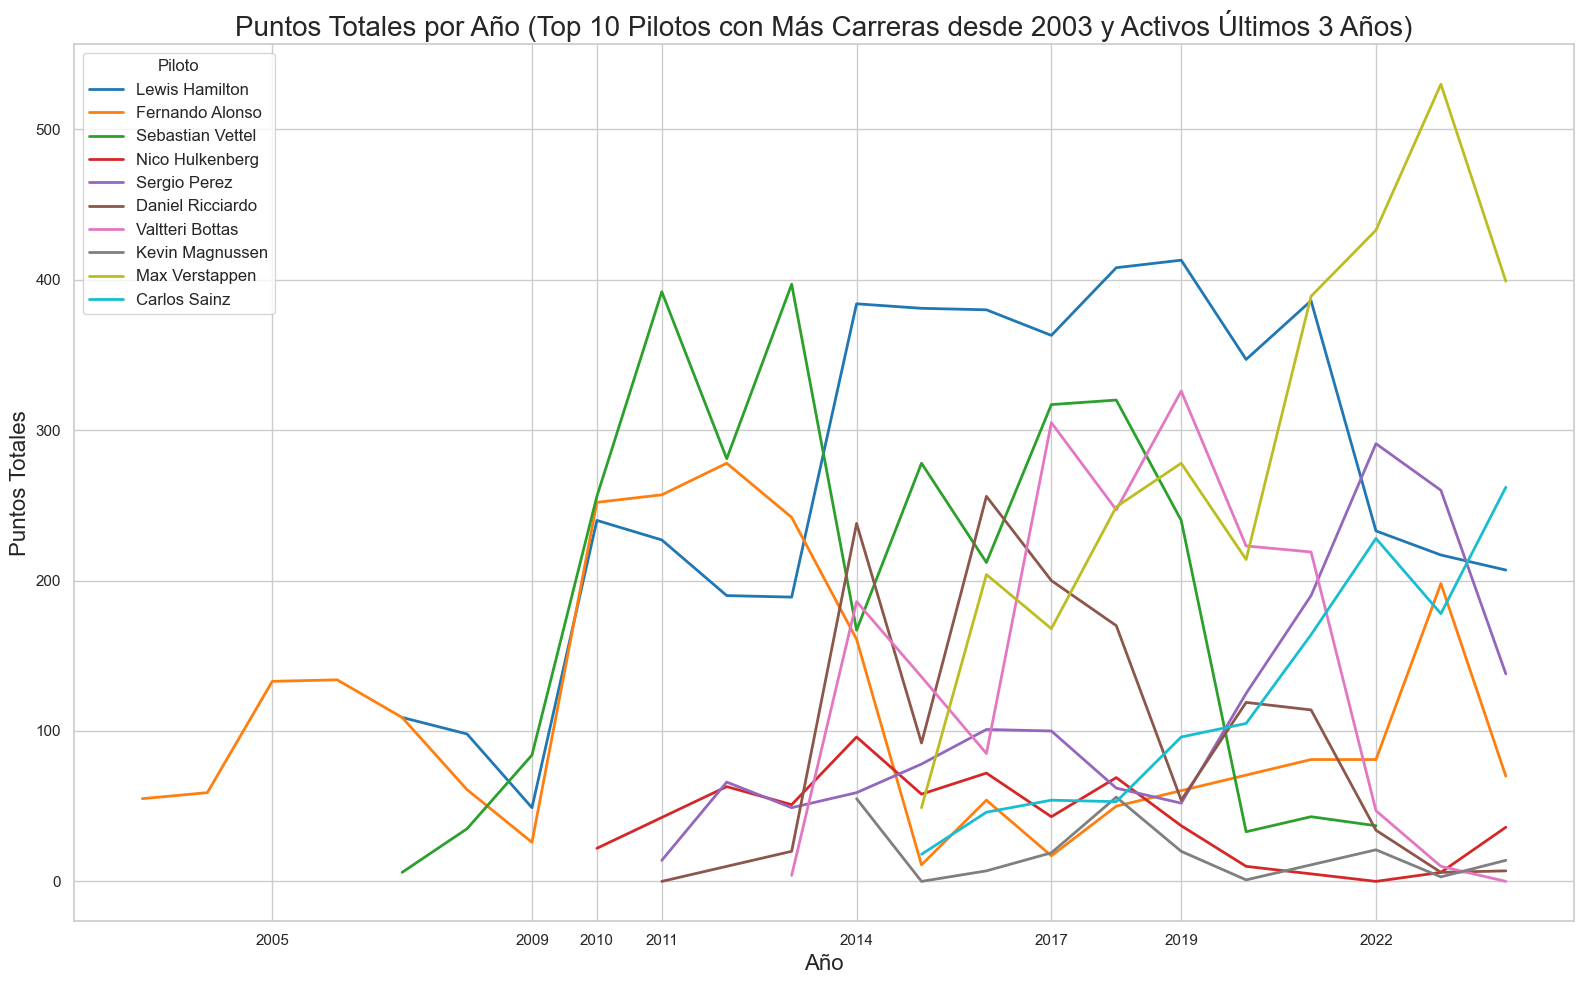

In [31]:
# 1. Filtrar carreras desde 2003 y últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
last_3_years = df_races['year'].max() - 2
df_races_last_3_years = df_races[df_races['year'] >= last_3_years]

# 2. Pilotos con más carreras desde 2003
pilot_counts = df_results[df_results['raceId'].isin(df_races_2003['raceId'])]
pilot_counts = pilot_counts.groupby('driverId').size().reset_index(name='race_count')

# 3. Pilotos activos en los últimos 3 años
active_drivers_last_3_years = df_results[df_results['raceId'].isin(df_races_last_3_years['raceId'])]['driverId'].unique()

# 4. Filtrar solo pilotos activos en los últimos 3 años
pilot_counts_active = pilot_counts[pilot_counts['driverId'].isin(active_drivers_last_3_years)]

# 5. Top 10 pilotos con más carreras
top_10_drivers = pilot_counts_active.sort_values(by='race_count', ascending=False).head(10)

# 6. Añadir nombres de los pilotos
top_10_drivers = pd.merge(top_10_drivers, df_drivers[['driverId', 'forename', 'surname']], on='driverId')
top_10_drivers['Driver'] = top_10_drivers['forename'] + ' ' + top_10_drivers['surname']

# 7. Filtrar resultados desde 2003 y para los top 10 pilotos
df_points_pilots = df_results[df_results['raceId'].isin(df_races_2003['raceId'])]
df_points_pilots = df_points_pilots[df_points_pilots['driverId'].isin(top_10_drivers['driverId'])]

# 8. Añadir año
df_points_pilots = pd.merge(df_points_pilots, df_races[['raceId', 'year']], on='raceId')

# 9. Agrupar por piloto y año, sumar puntos
df_points_pilots = df_points_pilots.groupby(['driverId', 'year'])['points'].sum().reset_index()

# 10. Añadir nombres de los pilotos
df_points_pilots = pd.merge(df_points_pilots, top_10_drivers[['driverId', 'Driver']], on='driverId')

# 11. Graficar
plt.figure(figsize=(16, 10))
sns.lineplot(data=df_points_pilots, x='year', y='points', hue='Driver', linewidth=2, palette='tab10', errorbar=None)
plt.title('Puntos Totales por Año (Top 10 Pilotos con Más Carreras desde 2003 y Activos Últimos 3 Años)', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Puntos Totales', fontsize=16)
plt.legend(title='Piloto', fontsize=12)

# 12. Marcar solo los años clave en el eje X
años_marcados = [2005, 2009, 2010, 2011, 2014, 2017, 2019, 2022]
plt.xticks(años_marcados)

plt.tight_layout()
plt.show()

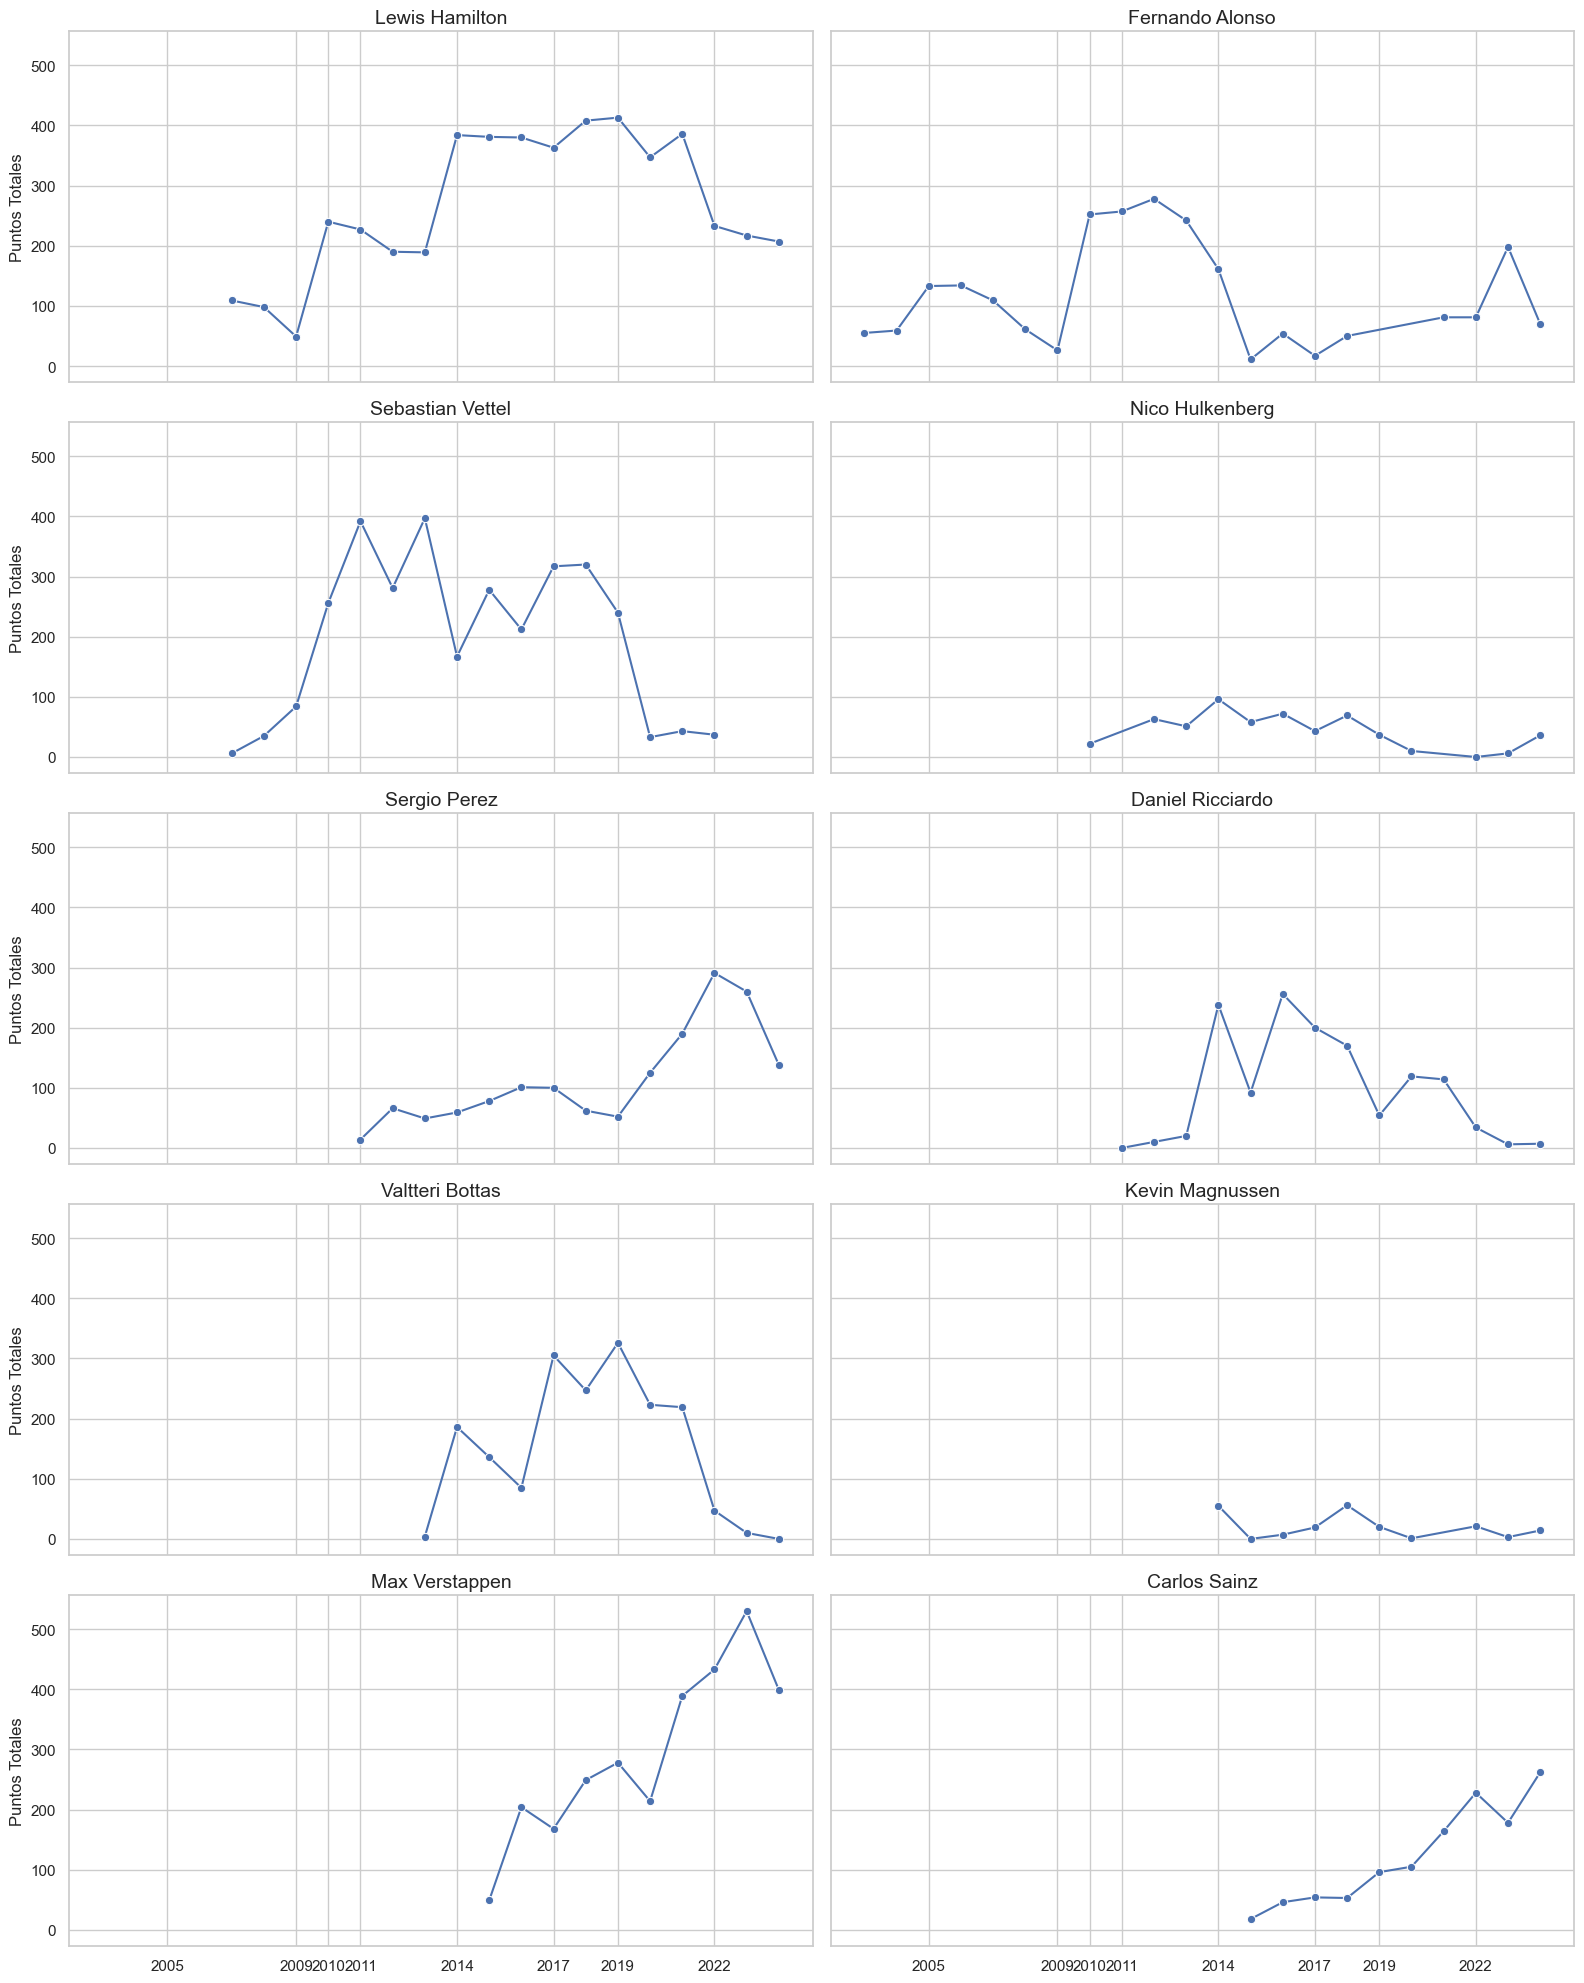

In [32]:
# 1. Obtener lista de pilotos únicos
drivers = df_points_pilots['Driver'].unique()

# 2. Crear figura con subplots (2 columnas)
n_drivers = len(drivers)
cols = 2
rows = (n_drivers + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), sharex=True, sharey=True)
axes = axes.flatten()

# 3. Años específicos que se deben marcar en el eje x
años_marcados = [2005, 2009, 2010, 2011, 2014, 2017, 2019, 2022]

# 4. Graficar por piloto
for i, driver in enumerate(drivers):
    ax = axes[i]
    data = df_points_pilots[df_points_pilots['Driver'] == driver]
    sns.lineplot(data=data, x='year', y='points', marker='o', ax=ax, errorbar=None)
    ax.set_title(driver, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Puntos Totales')
    ax.set_xticks(años_marcados)  # mostrar solo los años clave
    ax.grid(True)

# 5. Ocultar ejes sobrantes si hay más subplots de los necesarios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 6. Quitar etiquetas del eje x de todas excepto la última fila
for ax in axes[:-cols]:
    ax.set_xlabel('')

# 7. Ajustar layout
plt.tight_layout()
plt.show()

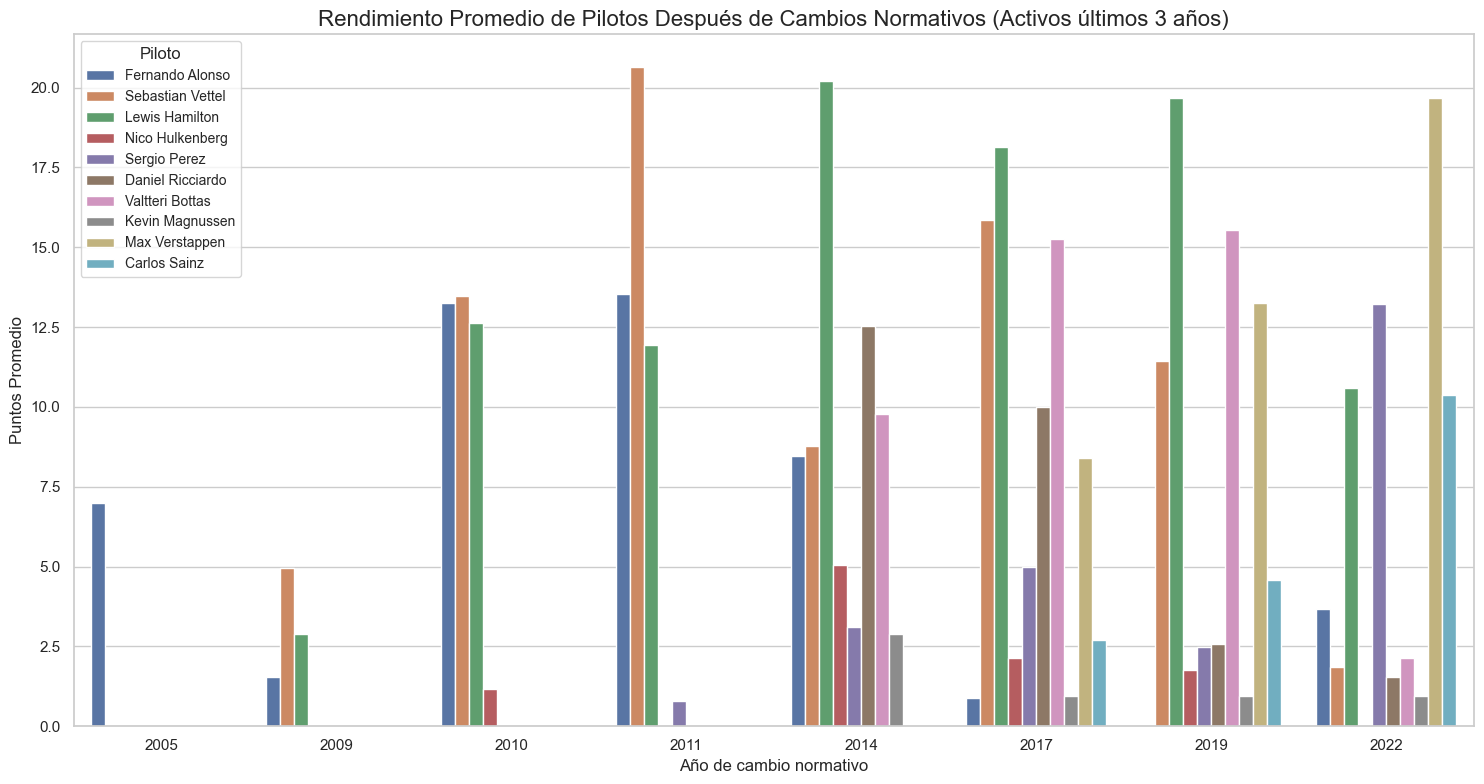

In [33]:
# Filtrar pilotos activos en los últimos 3 años
last_3_years = df_races['year'].max() - 2
races_last_3_years = df_races[df_races['year'] >= last_3_years]

active_drivers_last_3_years = (
    df_results[df_results['raceId'].isin(races_last_3_years['raceId'])]
    .groupby('driverId')
    .size()
    .reset_index(name='races_last_3_years')
)

# Obtener pilotos con más carreras desde 2003
races_2003_onward = df_races[df_races['year'] >= 2003]
df_results_2003 = df_results[df_results['raceId'].isin(races_2003_onward['raceId'])]

top_10_active_drivers = (
    df_results_2003.groupby('driverId')
    .size()
    .reset_index(name='total_races')
)
top_10_active_drivers = pd.merge(top_10_active_drivers, active_drivers_last_3_years, on='driverId')
top_10_active_drivers = top_10_active_drivers.sort_values(by='total_races', ascending=False).head(10)

# Unir resultados con años de carrera
df_driver_performance = pd.merge(df_results, races_2003_onward[['raceId', 'year']], on='raceId')

# Filtrar solo los 10 pilotos activos con más carreras
df_driver_performance = df_driver_performance[df_driver_performance['driverId'].isin(top_10_active_drivers['driverId'])]

# Unir con nombres de pilotos
df_driver_performance = pd.merge(
    df_driver_performance, df_drivers[['driverId', 'forename', 'surname']], on='driverId'
)
df_driver_performance['driver_name'] = df_driver_performance['forename'] + ' ' + df_driver_performance['surname']

# Filtrar solo carreras posteriores a años normativos
normative_years = [2005, 2009, 2010, 2011, 2014, 2017, 2019, 2022]
df_driver_performance = df_driver_performance[df_driver_performance['year'].isin(normative_years)]

# Agrupar por piloto y año de normativa
df_driver_performance_summary = df_driver_performance.groupby(['driver_name', 'year']).agg(
    races_after_change=('raceId', 'count'),
    avg_points_after_change=('points', 'mean')
).reset_index()

# Ordenar por año y promedio de puntos
df_driver_performance_summary = df_driver_performance_summary.sort_values(
    by=['year', 'avg_points_after_change'], ascending=[True, False]
)

# Gráfico
plt.figure(figsize=(15, 8))
sns.barplot(
    x="year",
    y="avg_points_after_change",
    hue="driver_name",
    data=df_driver_performance_summary
)
plt.title("Rendimiento Promedio de Pilotos Después de Cambios Normativos (Activos últimos 3 años)", fontsize=16)
plt.xlabel("Año de cambio normativo", fontsize=12)
plt.ylabel("Puntos Promedio", fontsize=12)
plt.xticks(ticks=range(len(normative_years)), labels=normative_years)
plt.legend(title='Piloto', fontsize=10)
plt.tight_layout()
plt.show()

# VICTORIAS DESDE LA POLE

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\132205375.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\132205375.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

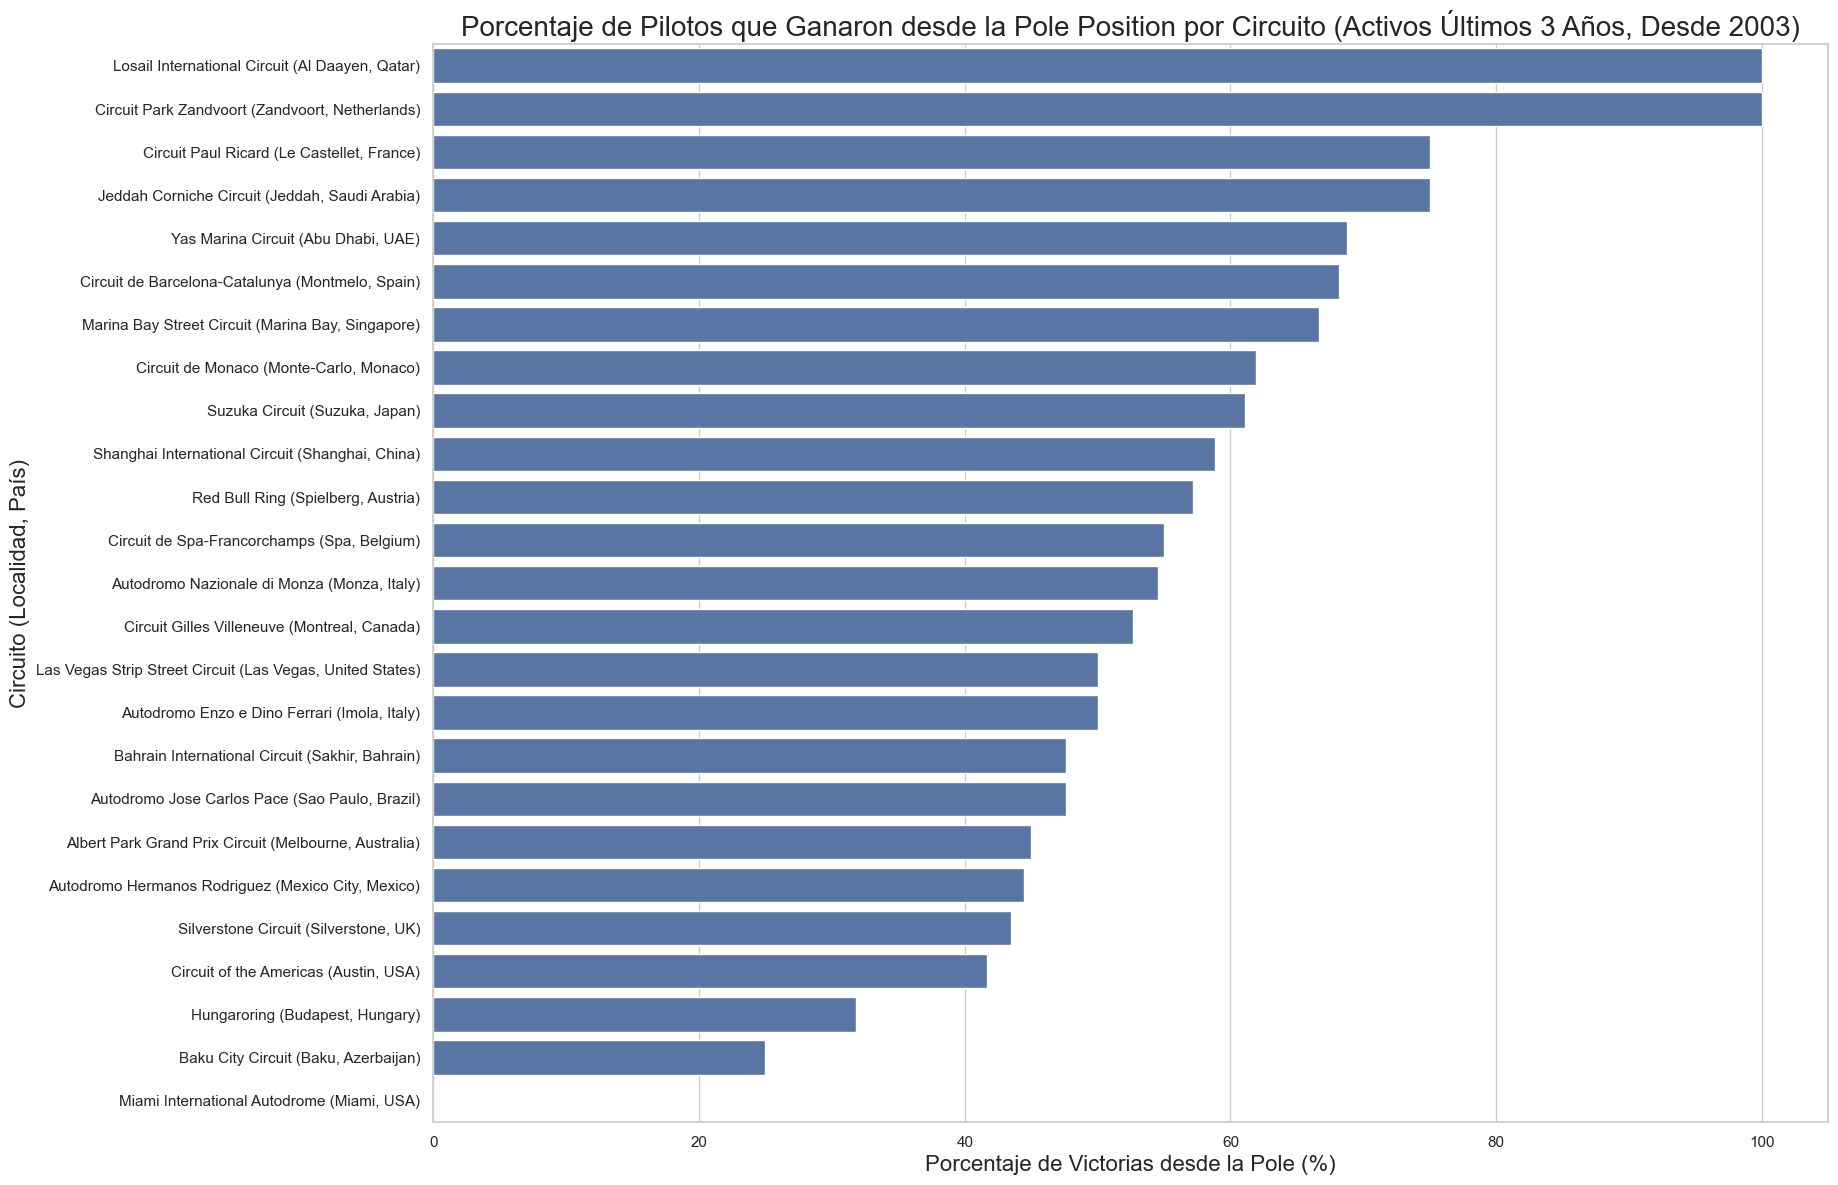

In [34]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para todos los pilotos desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name_full'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar para que las etiquetas coincidan con las barras
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='percent', ascending=False).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(18, 14))
sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name_full')

plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Localidad, País)', fontsize=16)
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\389747203.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\389747203.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

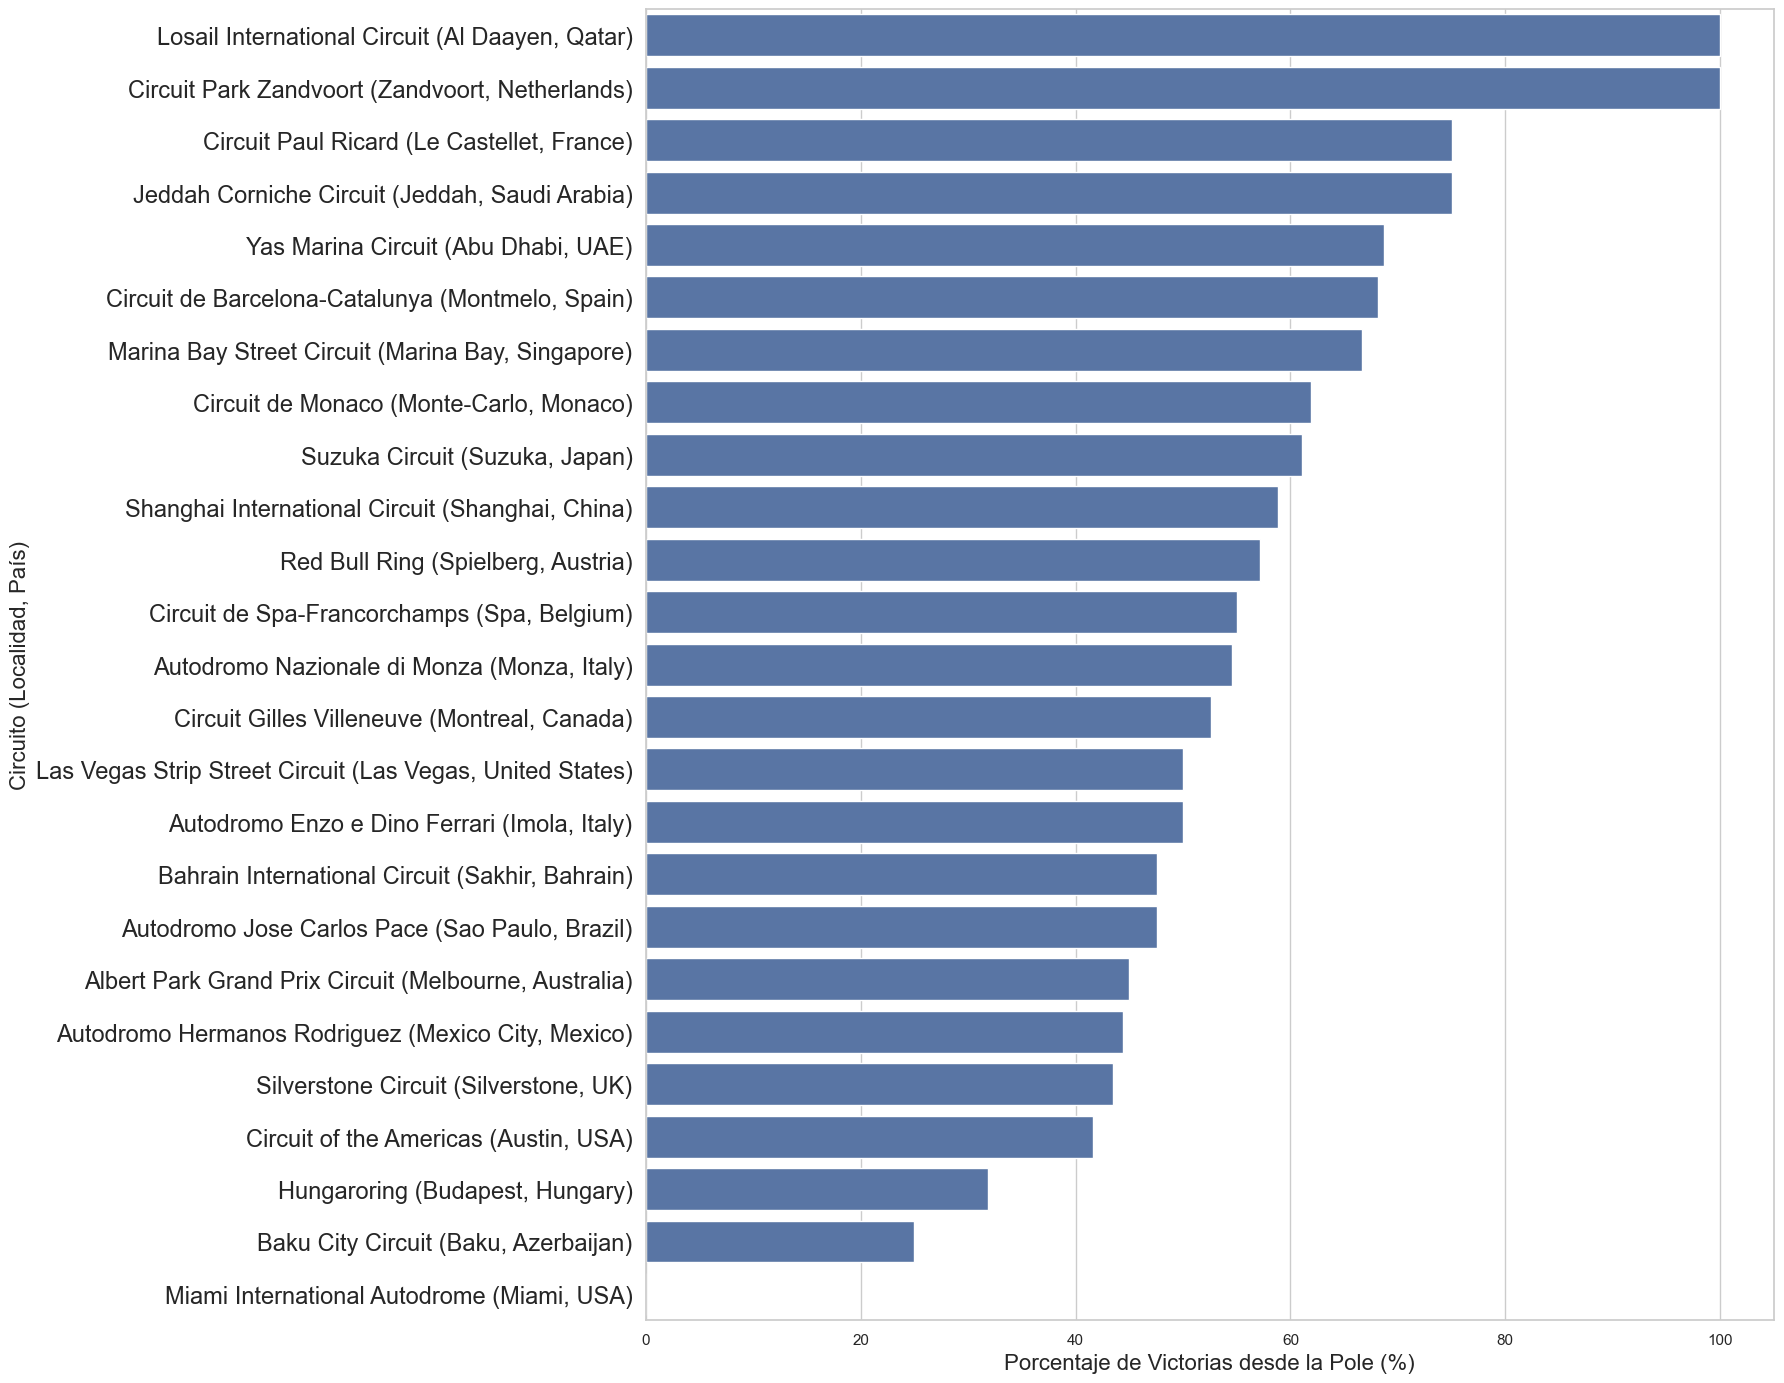

In [35]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para todos los pilotos desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name_full'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar para que las etiquetas coincidan con las barras
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='percent', ascending=False).reset_index(drop=True)

plt.figure(figsize=(18, 14))
sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name_full')

# plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Localidad, País)', fontsize=16)
plt.yticks(fontsize=17)  # <-- Aumenta el tamaño de las etiquetas del eje Y
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\527139466.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\527139466.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

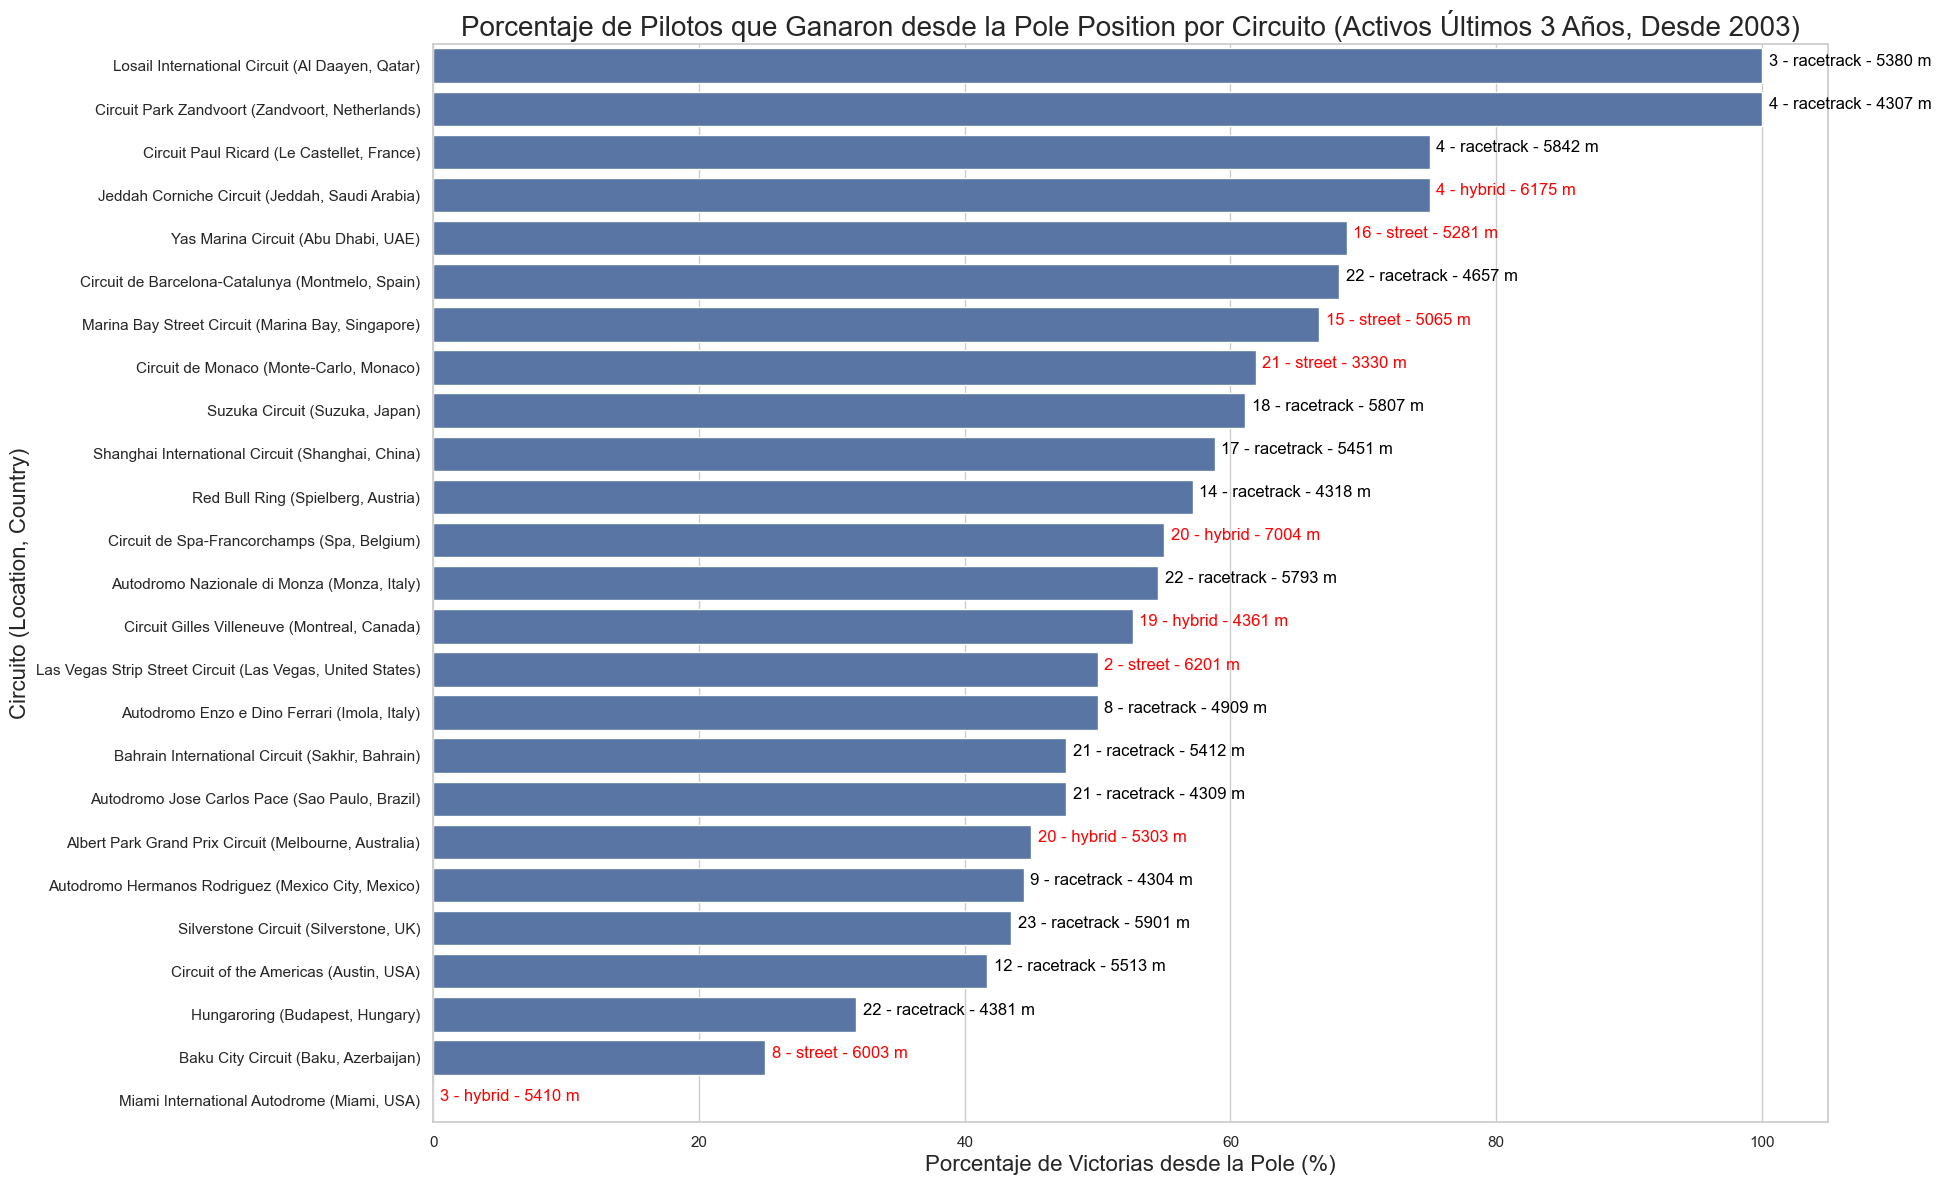

In [36]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para los 20 pilotos con más carreras desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0 para los circuitos sin victorias desde pole
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar para que las etiquetas coincidan con las barras
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='percent', ascending=False).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(18, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    # Color del texto en función del tipo de circuito
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    # Crear el texto combinando 'race_count', 'type' y 'length_mt'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    # Añadir el texto al final de cada barra
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=12)

plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Location, Country)', fontsize=16)
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\135587880.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\135587880.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

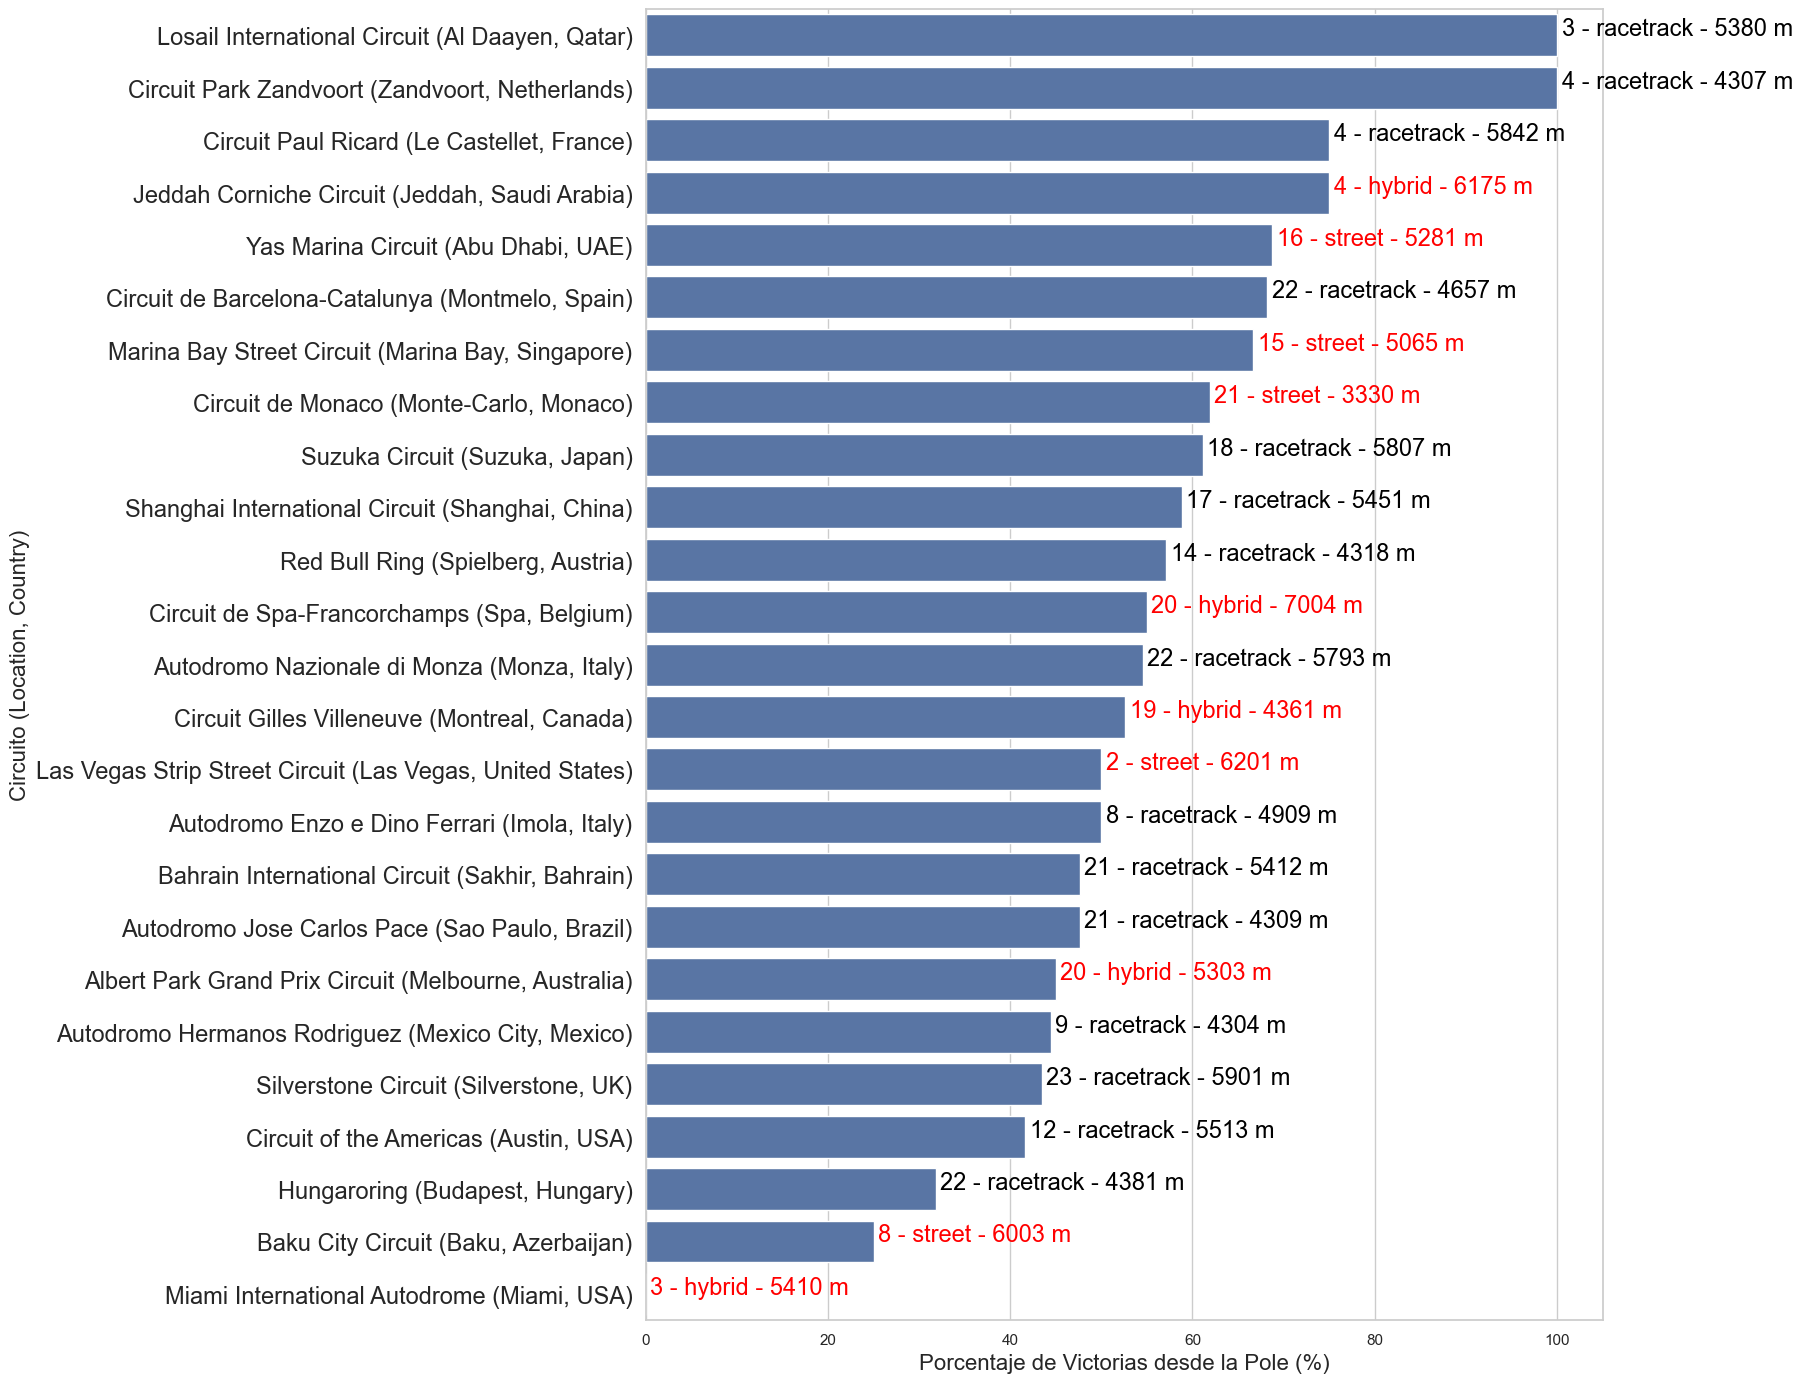

In [37]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para los 20 pilotos con más carreras desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0 para los circuitos sin victorias desde pole
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar para que las etiquetas coincidan con las barras
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='percent', ascending=False).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(18, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=17)  # Aumentado el tamaño de letra

# Títulos y etiquetas
# plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Location, Country)', fontsize=16)
plt.yticks(fontsize=17)  # Aumentar el tamaño de las etiquetas del eje Y
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2664190264.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2664190264.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

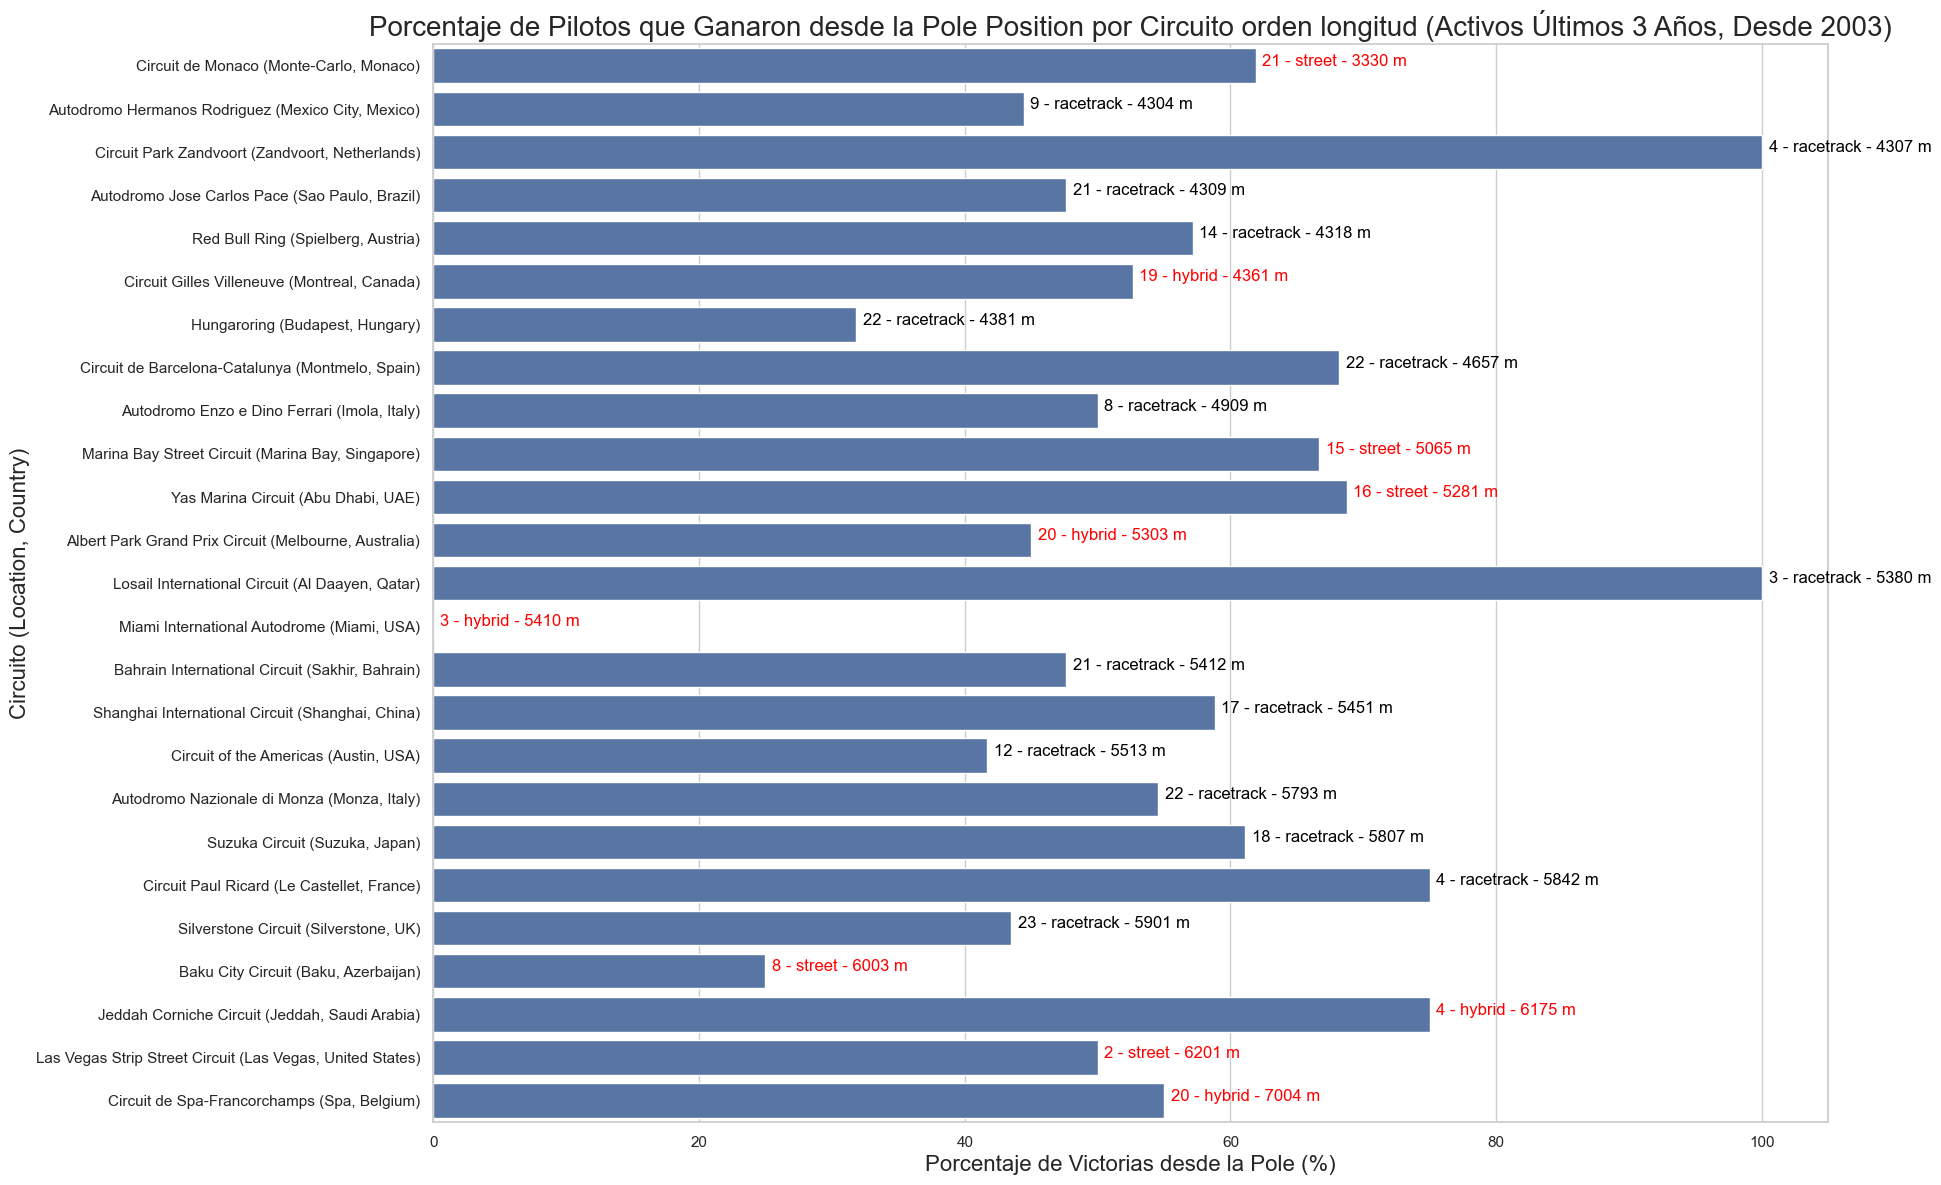

In [38]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para los 20 pilotos con más carreras desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0 para los circuitos sin victorias desde pole
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por length_mt de forma ascendente
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='length_mt', ascending=True).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(18, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    # Color del texto en función del tipo de circuito
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    # Crear el texto combinando 'race_count', 'type' y 'length_mt'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    # Añadir el texto al final de cada barra
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=12)

plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito orden longitud (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Location, Country)', fontsize=16)
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2694004622.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2694004622.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

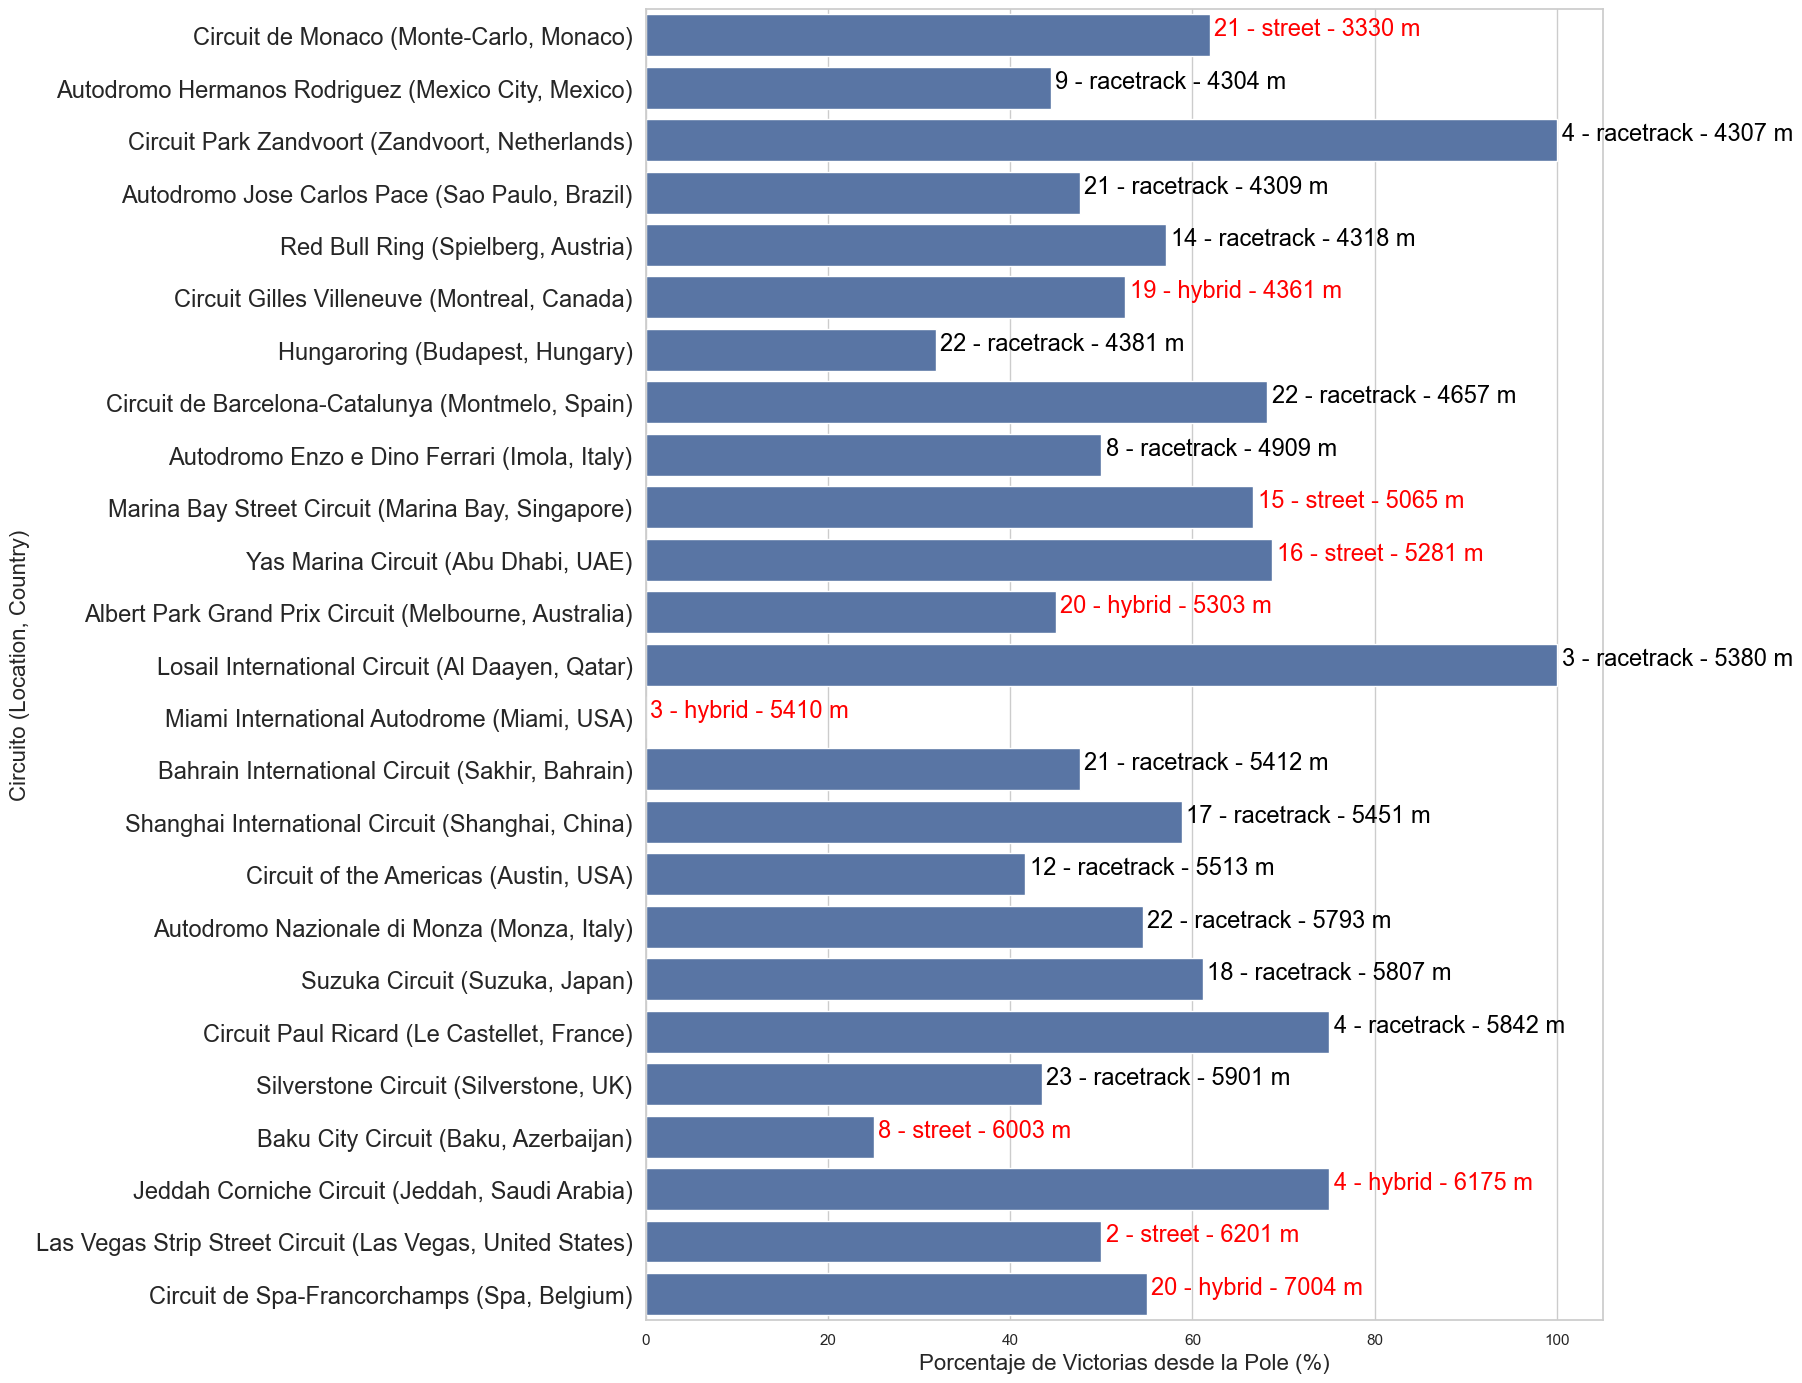

In [39]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para los 20 pilotos con más carreras desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0 para los circuitos sin victorias desde pole
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por length_mt de forma ascendente
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='length_mt', ascending=True).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(18, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=17)  # Tamaño aumentado

# Títulos y etiquetas
# plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito orden longitud (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Location, Country)', fontsize=16)
plt.yticks(fontsize=17)  # Tamaño aumentado de etiquetas eje Y
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\775336636.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\775336636.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

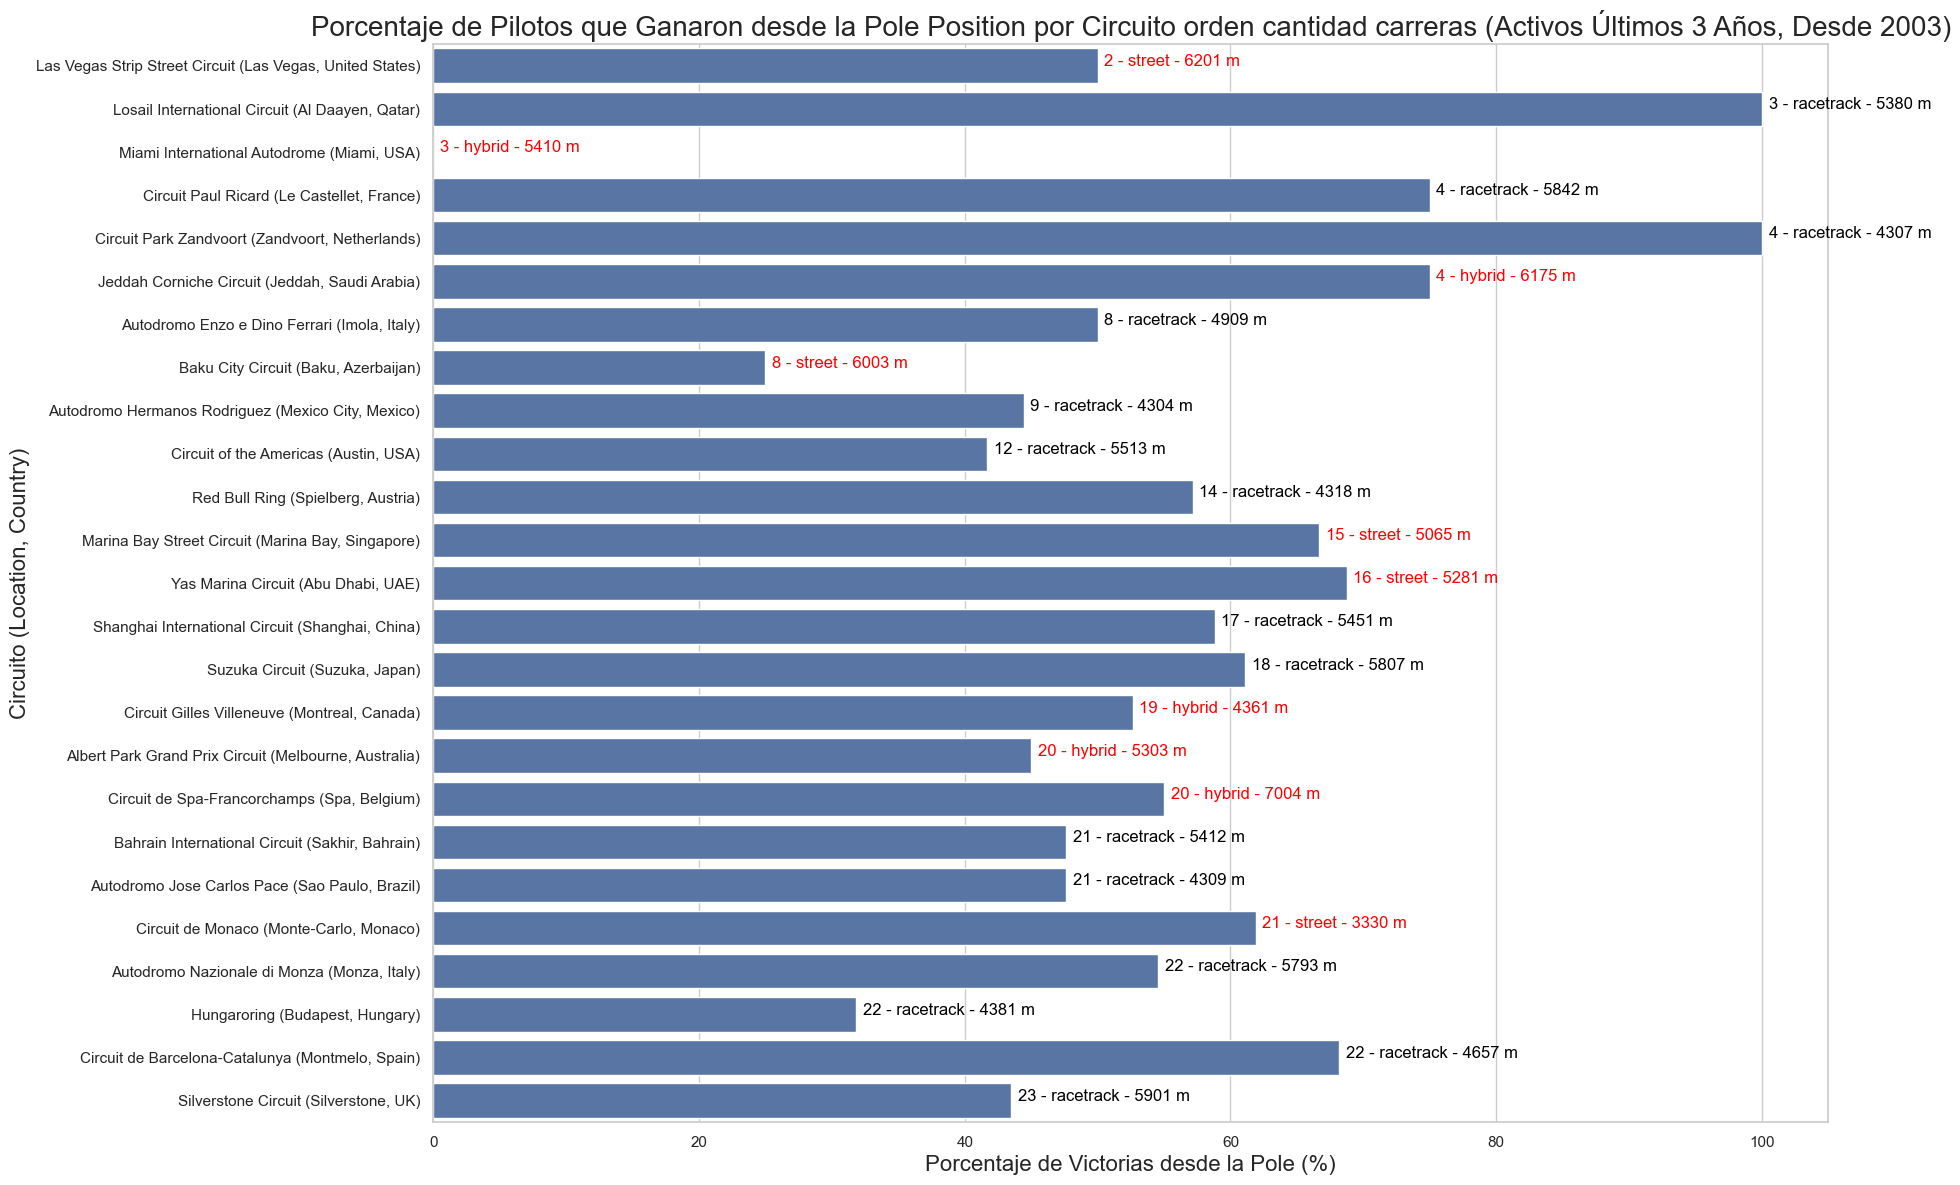

In [40]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para los 20 pilotos con más carreras desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0 para los circuitos sin victorias desde pole
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por race_count de forma ascendente
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='race_count', ascending=True).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(18, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    # Color del texto en función del tipo de circuito
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    # Crear el texto combinando 'race_count', 'type' y 'length_mt'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    # Añadir el texto al final de cada barra
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=12)

plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito orden cantidad carreras (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Location, Country)', fontsize=16)
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\1392950586.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\1392950586.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

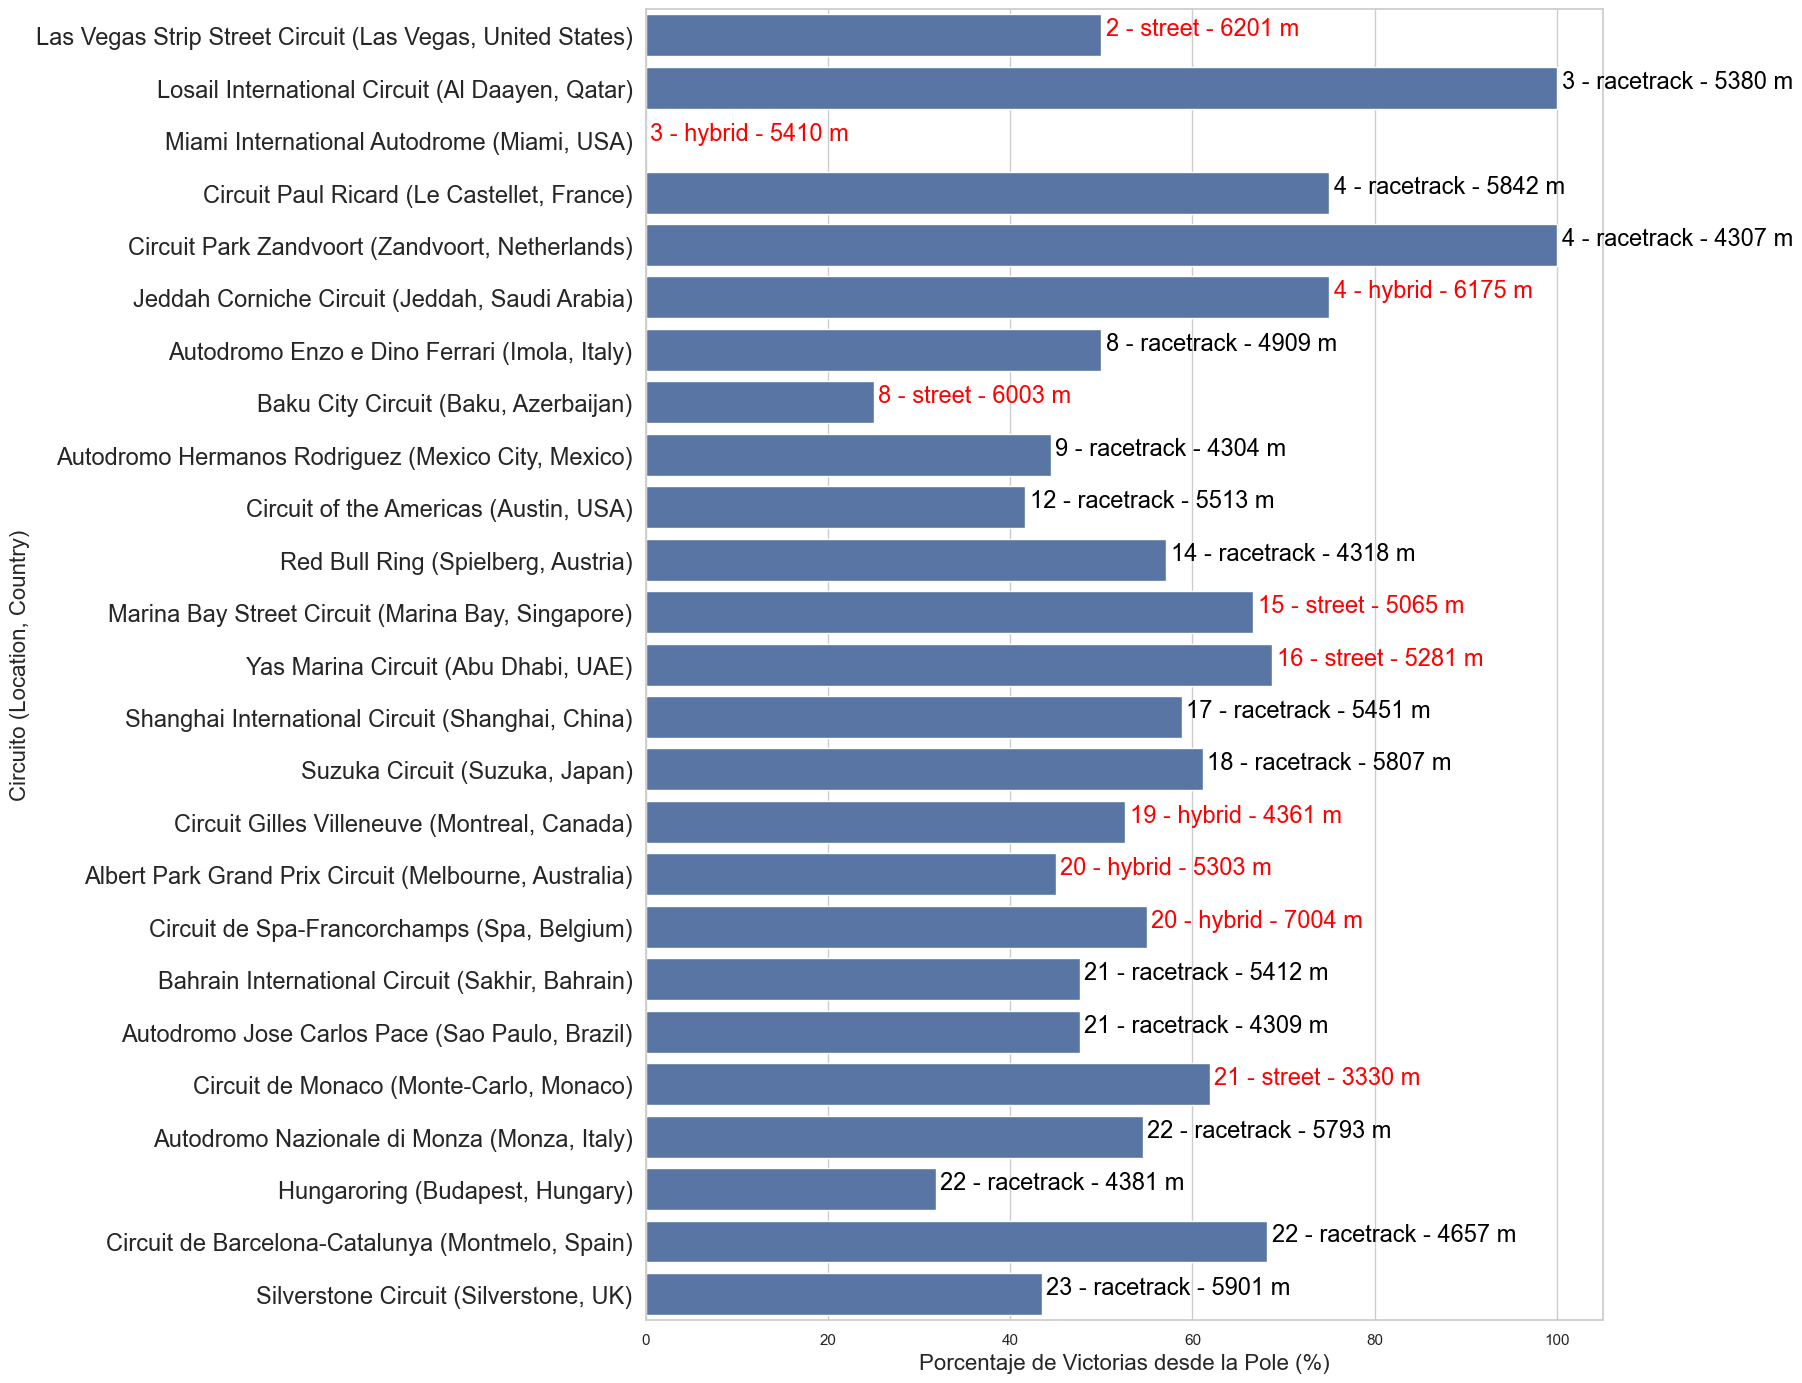

In [41]:
# Filtrar carreras desde 2003 y las de los últimos 3 años
df_races_2003 = df_races[df_races['year'] >= 2003]
df_races_last_3_years = df_races[df_races['year'] >= (df_races['year'].max() - 2)]

# Obtener los circuitos activos en los últimos 3 años
active_circuits_last_3_years = df_races_last_3_years['circuitId'].unique()

# 1. Calcular victorias desde pole para los 20 pilotos con más carreras desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos y filtrar solo circuitos activos en los últimos 3 años
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'location', 'country', 'type', 'length_mt']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits_last_3_years)]

# Reemplazar NaN por 0 para los circuitos sin victorias desde pole
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Añadir location y country al nombre del circuito
circuit_pole_percent['name'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por race_count de forma ascendente
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='race_count', ascending=True).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(18, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=17)  # Tamaño de fuente aumentado

# Títulos y etiquetas
# plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito orden cantidad carreras (Activos Últimos 3 Años, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Location, Country)', fontsize=16)
plt.yticks(fontsize=17)  # Aumentar el tamaño de fuente del eje Y
plt.tight_layout()
plt.show()

In [42]:
from scipy.stats import shapiro

# Test de normalidad de Shapiro-Wilk
stat, p_value = shapiro(circuit_pole_percent_sorted['percent'])

print(f"Estadístico de Shapiro-Wilk: {stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

if p_value > 0.05:
    print("✅ No se rechaza la hipótesis nula: la distribución es aproximadamente normal.")
else:
    print("❌ Se rechaza la hipótesis nula: la distribución no es normal.")

Estadístico de Shapiro-Wilk: 0.9470
Valor-p: 0.2145
✅ No se rechaza la hipótesis nula: la distribución es aproximadamente normal.


In [43]:
# Test de normalidad para 'race_count'
stat_race, p_race = shapiro(circuit_pole_percent_sorted['race_count'])
print(f"Estadístico de Shapiro-Wilk: {stat_race:.4f}")
print(f"Valor-p: {p_race:.4f}")

if p_value > 0.05:
    print("✅ No se rechaza la hipótesis nula: la distribución es aproximadamente normal.")
else:
    print("❌ Se rechaza la hipótesis nula: la distribución no es normal.")

Estadístico de Shapiro-Wilk: 0.8708
Valor-p: 0.0045
✅ No se rechaza la hipótesis nula: la distribución es aproximadamente normal.


In [44]:
# Extraer solo la columna de longitud
lengths = circuit_pole_percent_sorted['length_mt']

# Test de Shapiro-Wilk
stat, p = shapiro(lengths)
print(f"Estadístico de Shapiro-Wilk: {stat:.4f}")
print(f"Valor-p = {p:.4f}")

# Interpretación
if p_value > 0.05:
    print("✅ No se rechaza la hipótesis nula: la distribución es aproximadamente normal.")
else:
    print("❌ Se rechaza la hipótesis nula: la distribución no es normal.")

Estadístico de Shapiro-Wilk: 0.9640
Valor-p = 0.5006
✅ No se rechaza la hipótesis nula: la distribución es aproximadamente normal.


In [45]:
from scipy.stats import shapiro

# Extraer la columna de interés
race_counts = circuit_pole_percent_sorted['race_count']

# Aplicar el test de Shapiro-Wilk
stat, p_value = shapiro(race_counts)

# Mostrar resultados
print(f"Estadístico de Shapiro-Wilk: {stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

if p_value > 0.05:
    print("✅ No se rechaza la hipótesis nula: la distribución es aproximadamente normal.")
else:
    print("❌ Se rechaza la hipótesis nula: la distribución no es normal.")

Estadístico de Shapiro-Wilk: 0.8708
Valor-p: 0.0045
❌ Se rechaza la hipótesis nula: la distribución no es normal.


In [46]:
from scipy.stats import spearmanr

# Supongamos que quieres correlacionar 'percent' y 'race_count'
rho, pval = spearmanr(circuit_pole_percent_sorted['percent'], 
                      circuit_pole_percent_sorted['race_count'])

print(f"Coeficiente de Spearman: {rho:.4f}")
print(f"Valor-p: {pval:.4f}")

if pval < 0.05:
    print("📌 Existe una correlación significativa (p < 0.05)")
else:
    print("ℹ️ No se detecta una correlación significativa (p ≥ 0.05)")

Coeficiente de Spearman: -0.1992
Valor-p: 0.3398
ℹ️ No se detecta una correlación significativa (p ≥ 0.05)


C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2479302888.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2479302888.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

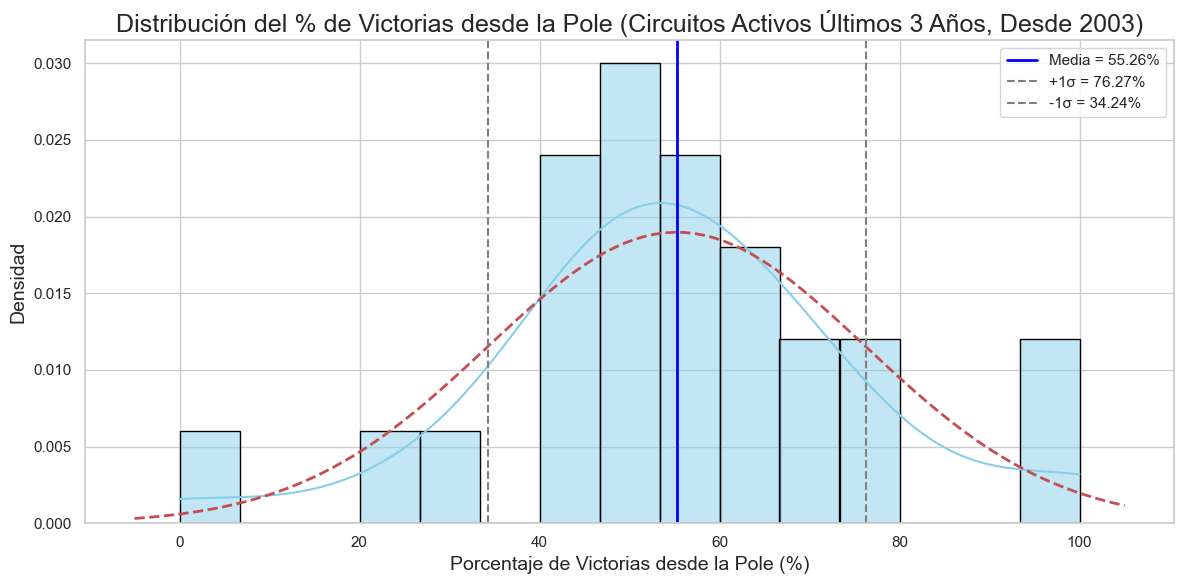

In [47]:
from scipy.stats import norm

# 1. Filtrar carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 2. Obtener circuitos activos últimos 3 años
recent_years = df_races['year'].max() - 2
active_circuits = df_races[df_races['year'] >= recent_years]['circuitId'].unique()

# 3. Calcular victorias desde la pole
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']],
                     df_results[['raceId', 'driverId', 'positionOrder']],
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 4. Agregar circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 5. Total de victorias
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1],
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 6. Total de carreras
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 7. Unir datos
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'type', 'length_mt', 'location', 'country']],
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')

# 8. Filtrar circuitos activos en últimos 3 años
circuit_pole_percent = circuit_pole_percent[circuit_pole_percent['circuitId'].isin(active_circuits)]

# 9. Limpiar y calcular %
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# --------- 📊 GRAFICAR DISTRIBUCIÓN NORMAL ---------
plt.figure(figsize=(12, 6))

# Histograma + KDE
sns.histplot(circuit_pole_percent['percent'], kde=True, stat="density", bins=15, color='skyblue', edgecolor='black')

# Ajuste Gaussiano
mean = circuit_pole_percent['percent'].mean()
std = circuit_pole_percent['percent'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', linewidth=2)

# Líneas verticales
plt.axvline(mean, color='blue', linestyle='-', linewidth=2, label=f"Media = {mean:.2f}%")
plt.axvline(mean + std, color='gray', linestyle='--', label=f"+1σ = {mean + std:.2f}%")
plt.axvline(mean - std, color='gray', linestyle='--', label=f"-1σ = {mean - std:.2f}%")

# Etiquetas y formato
plt.title('Distribución del % de Victorias desde la Pole (Circuitos Activos Últimos 3 Años, Desde 2003)', fontsize=18)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

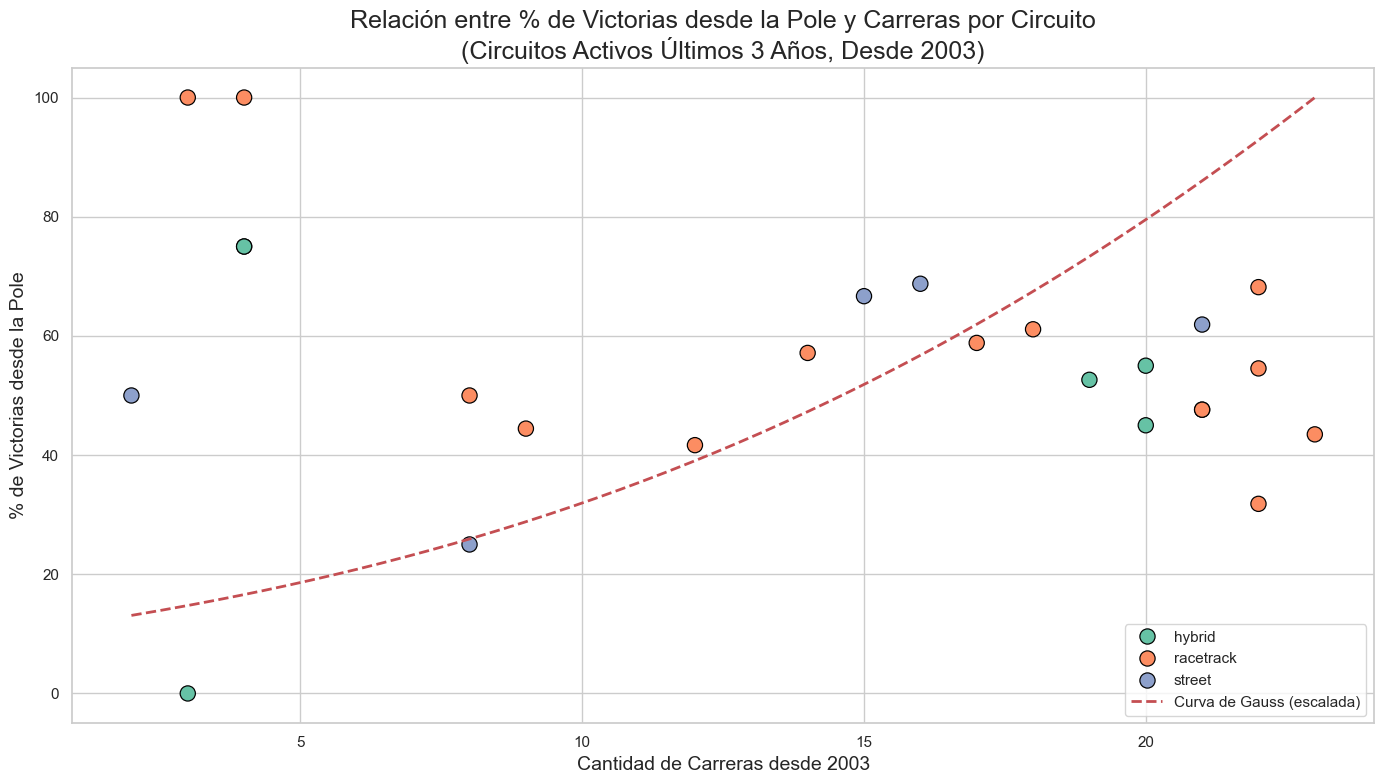

In [48]:
from scipy.stats import norm

plt.figure(figsize=(14, 8))

# 1. SCATTER PLOT
sns.scatterplot(
    data=circuit_pole_percent,
    x='race_count',
    y='percent',
    hue='type',
    palette='Set2',
    s=120,
    edgecolor='black'
)

# 2. CURVA DE GAUSS (basada en Y: 'percent')
x_vals = np.linspace(circuit_pole_percent['race_count'].min(), circuit_pole_percent['race_count'].max(), 200)
mean_y = circuit_pole_percent['percent'].mean()
std_y = circuit_pole_percent['percent'].std()
y_gauss = norm.pdf(x_vals, mean_y, std_y)

# Escalar la curva para que se ajuste al rango de los datos reales
y_gauss_scaled = y_gauss / y_gauss.max() * circuit_pole_percent['percent'].max()

# 3. DIBUJAR LA CURVA
plt.plot(x_vals, y_gauss_scaled, 'r--', linewidth=2, label='Curva de Gauss (escalada)')

# 4. ANOTACIONES
plt.title('Relación entre % de Victorias desde la Pole y Carreras por Circuito\n(Circuitos Activos Últimos 3 Años, Desde 2003)', fontsize=18)
plt.xlabel('Cantidad de Carreras desde 2003', fontsize=14)
plt.ylabel('% de Victorias desde la Pole', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2023186487.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2023186487.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

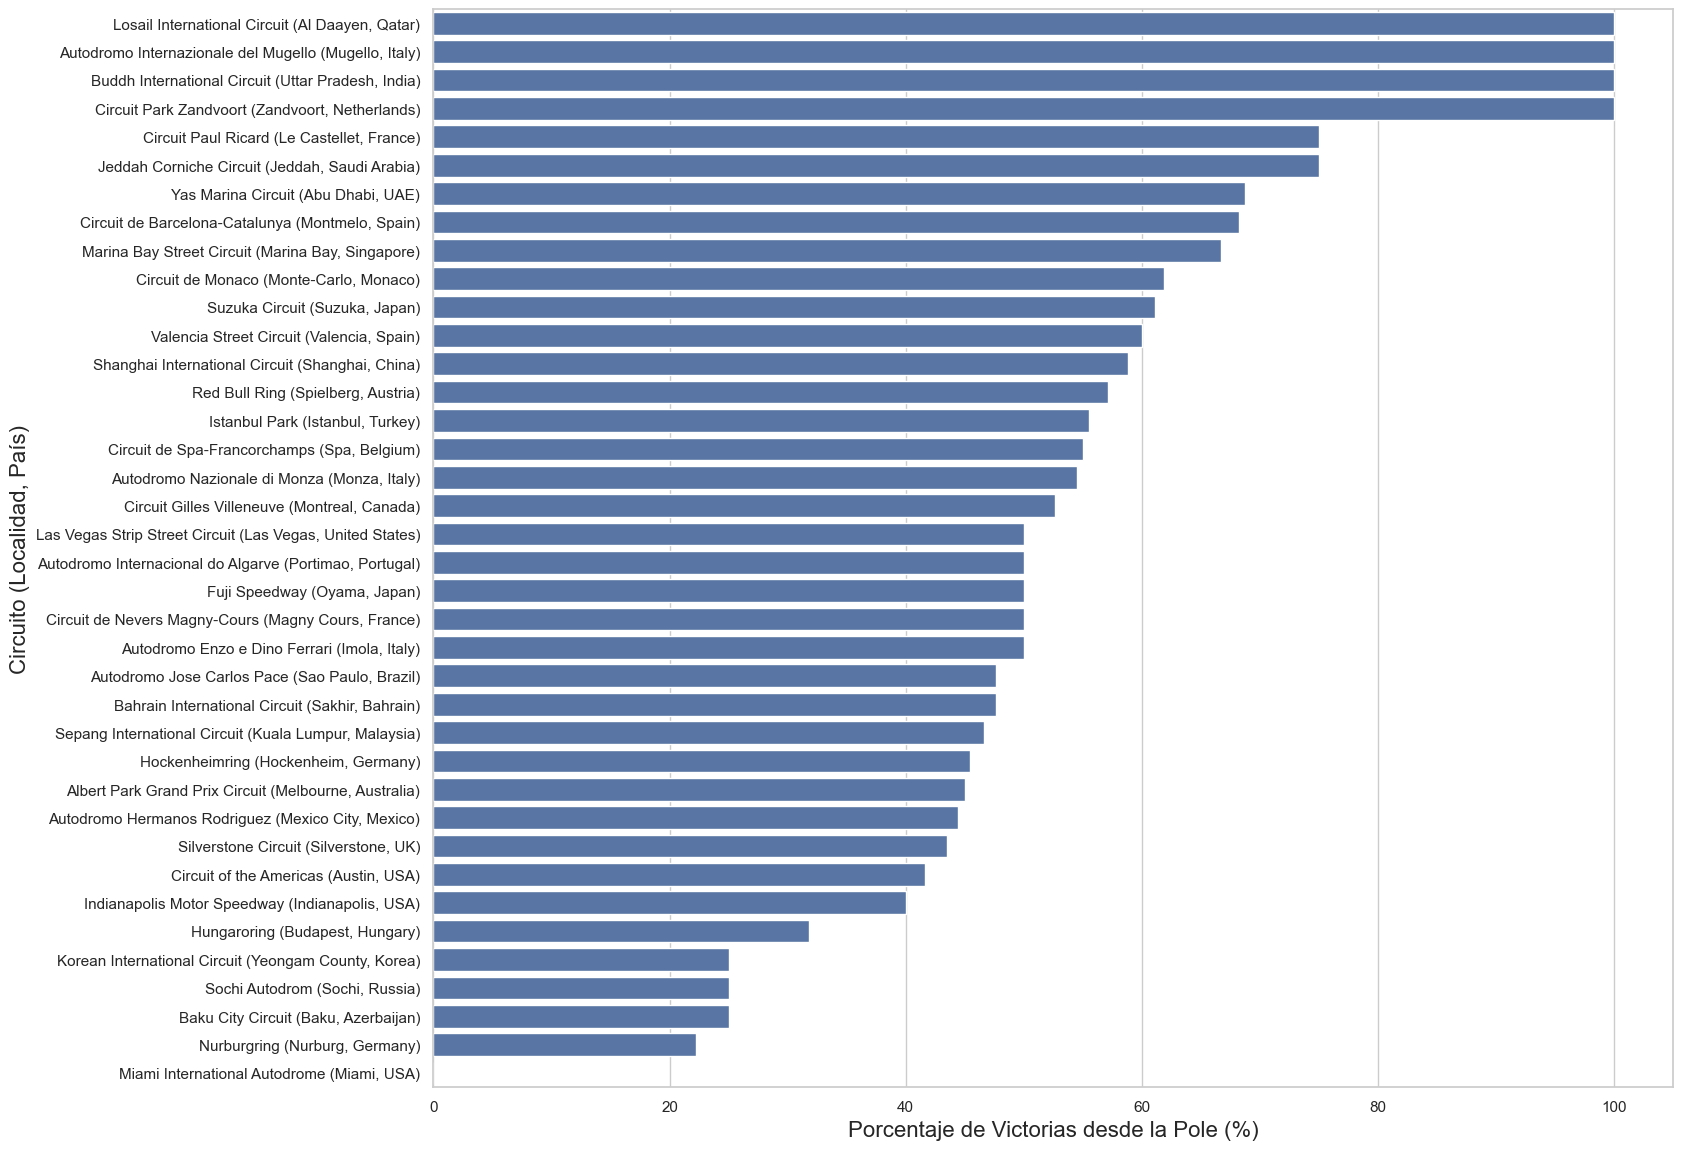

In [49]:
# Filtrar carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 1. Calcular victorias desde pole para todos los pilotos desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'type', 'length_mt', 'location', 'country']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')

# Reemplazar NaN por 0
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Crear columna con nombre + (localidad, país)
circuit_pole_percent['name_full'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por porcentaje descendente
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='percent', ascending=False).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(16, 14))
sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name_full')

# plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Localidad, País)', fontsize=16)
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2493003046.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2493003046.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

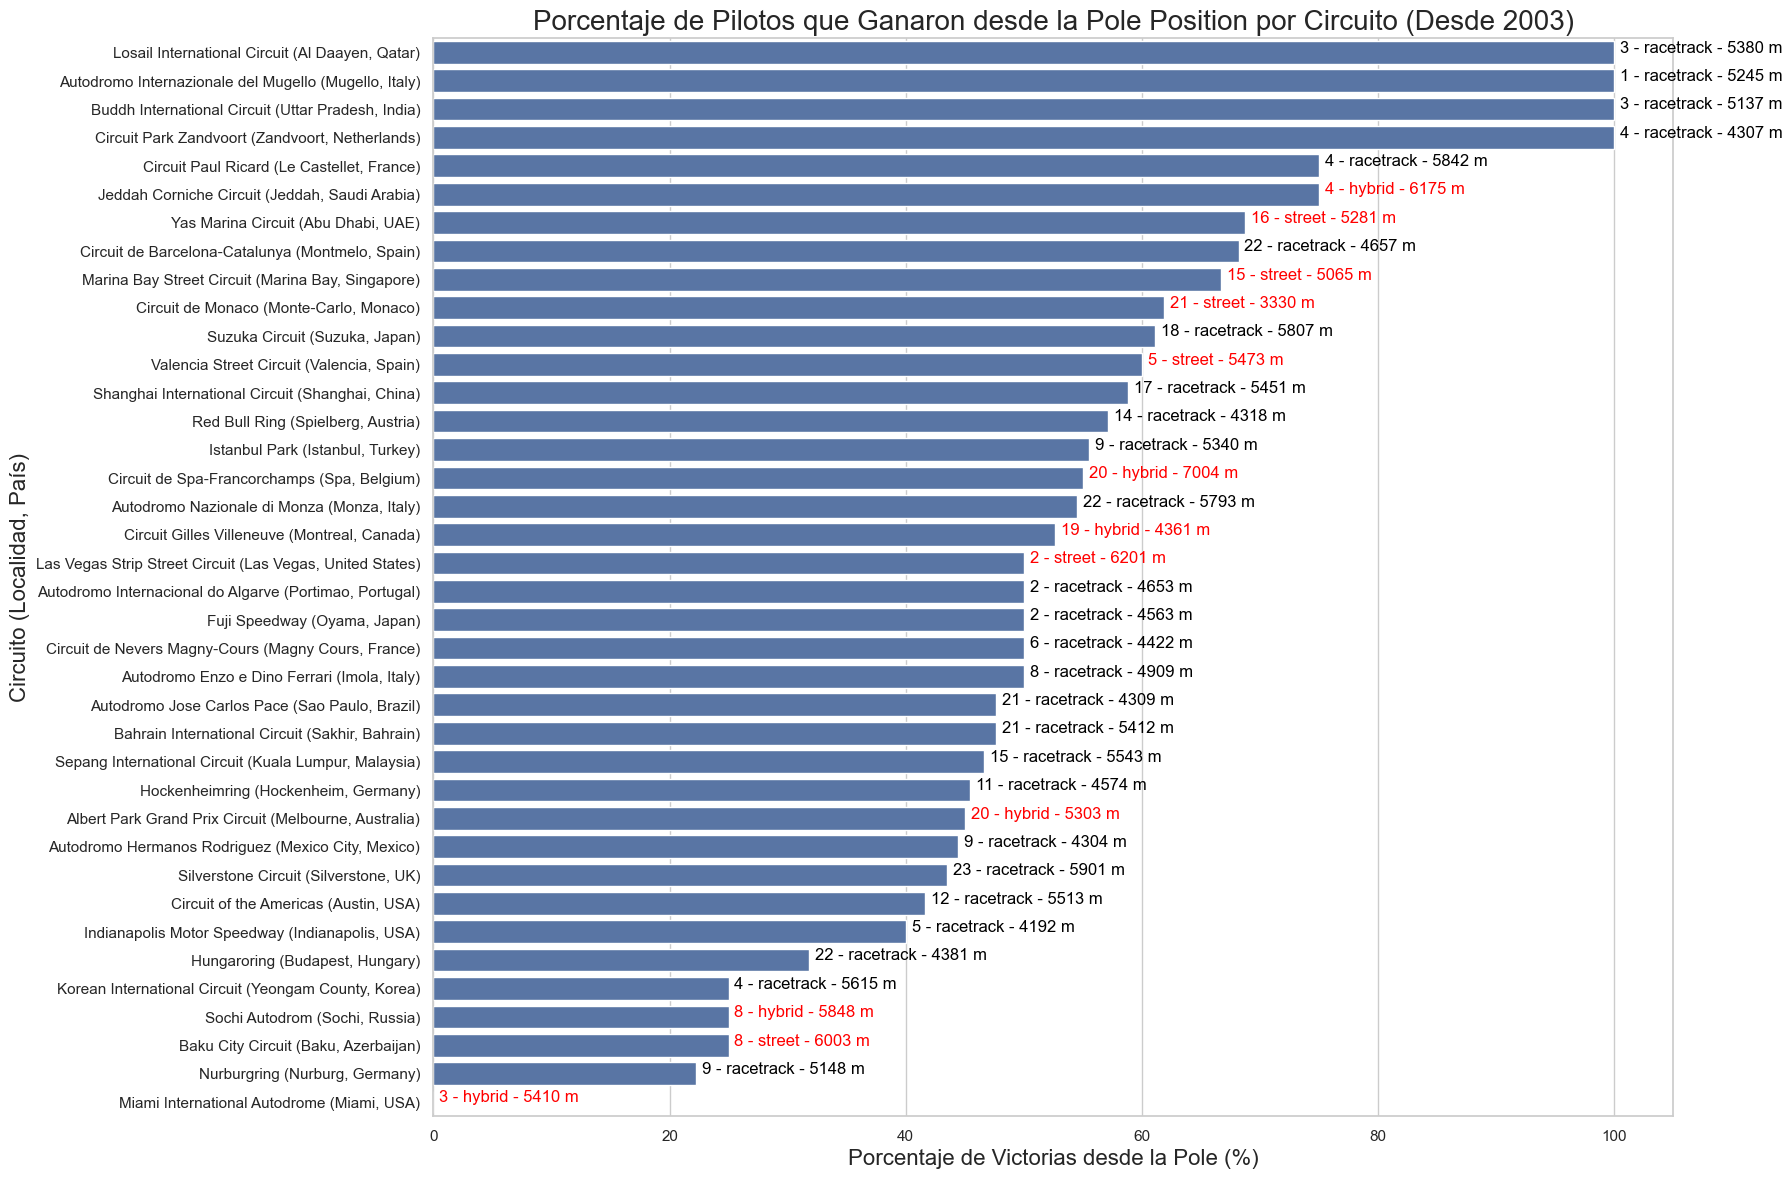

In [50]:
# Filtrar carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 1. Calcular victorias desde pole para todos los pilotos desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'type', 'length_mt', 'location', 'country']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')

# Reemplazar NaN por 0 para los circuitos sin victorias desde pole
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Crear columna con nombre + (localidad, país)
circuit_pole_percent['name_full'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por porcentaje descendente
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='percent', ascending=False).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(16, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name_full')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=12)

plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito (Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Localidad, País)', fontsize=16)
plt.show()

Correlacion de Pearson entre % y cantidad de carreras

In [51]:
from scipy.stats import pearsonr

# Calcular coeficiente de correlación de Pearson
corr_coef, p_value = pearsonr(circuit_pole_percent_sorted['percent'], circuit_pole_percent_sorted['race_count'])

# Mostrar resultado
print(f"Coeficiente de correlación de Pearson: {corr_coef:.4f}")
print(f"Valor p: {p_value:.4e}")

# Interpretación opcional
if p_value < 0.05:
    print("🔍 Hay una correlación estadísticamente significativa entre el porcentaje de victorias desde la pole y la cantidad de carreras por circuito.")
else:
    print("ℹ️ No se encuentra una correlación estadísticamente significativa entre estas variables.")

Coeficiente de correlación de Pearson: -0.1490
Valor p: 3.7204e-01
ℹ️ No se encuentra una correlación estadísticamente significativa entre estas variables.


Correlacion de Pearson entre % y longitud de los circuitos

In [52]:
from scipy.stats import pearsonr

# Variables numéricas
x = circuit_pole_percent_sorted['length_mt']
y = circuit_pole_percent_sorted['percent']

# Cálculo del coeficiente de Pearson
r, p_value = pearsonr(x, y)

print(f"Coeficiente de Pearson: r = {r:.4f}")
print(f"Valor p = {p_value:.4e}")

if p_value < 0.05:
    print("📊 Existe una correlación lineal significativa entre longitud del circuito y % de victorias desde la pole.")
else:
    print("ℹ️ No se detecta una correlación lineal significativa.")

Coeficiente de Pearson: r = -0.0635
Valor p = 7.0505e-01
ℹ️ No se detecta una correlación lineal significativa.


C:\Users\santy\AppData\Local\Temp\ipykernel_31440\4224814930.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\4224814930.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

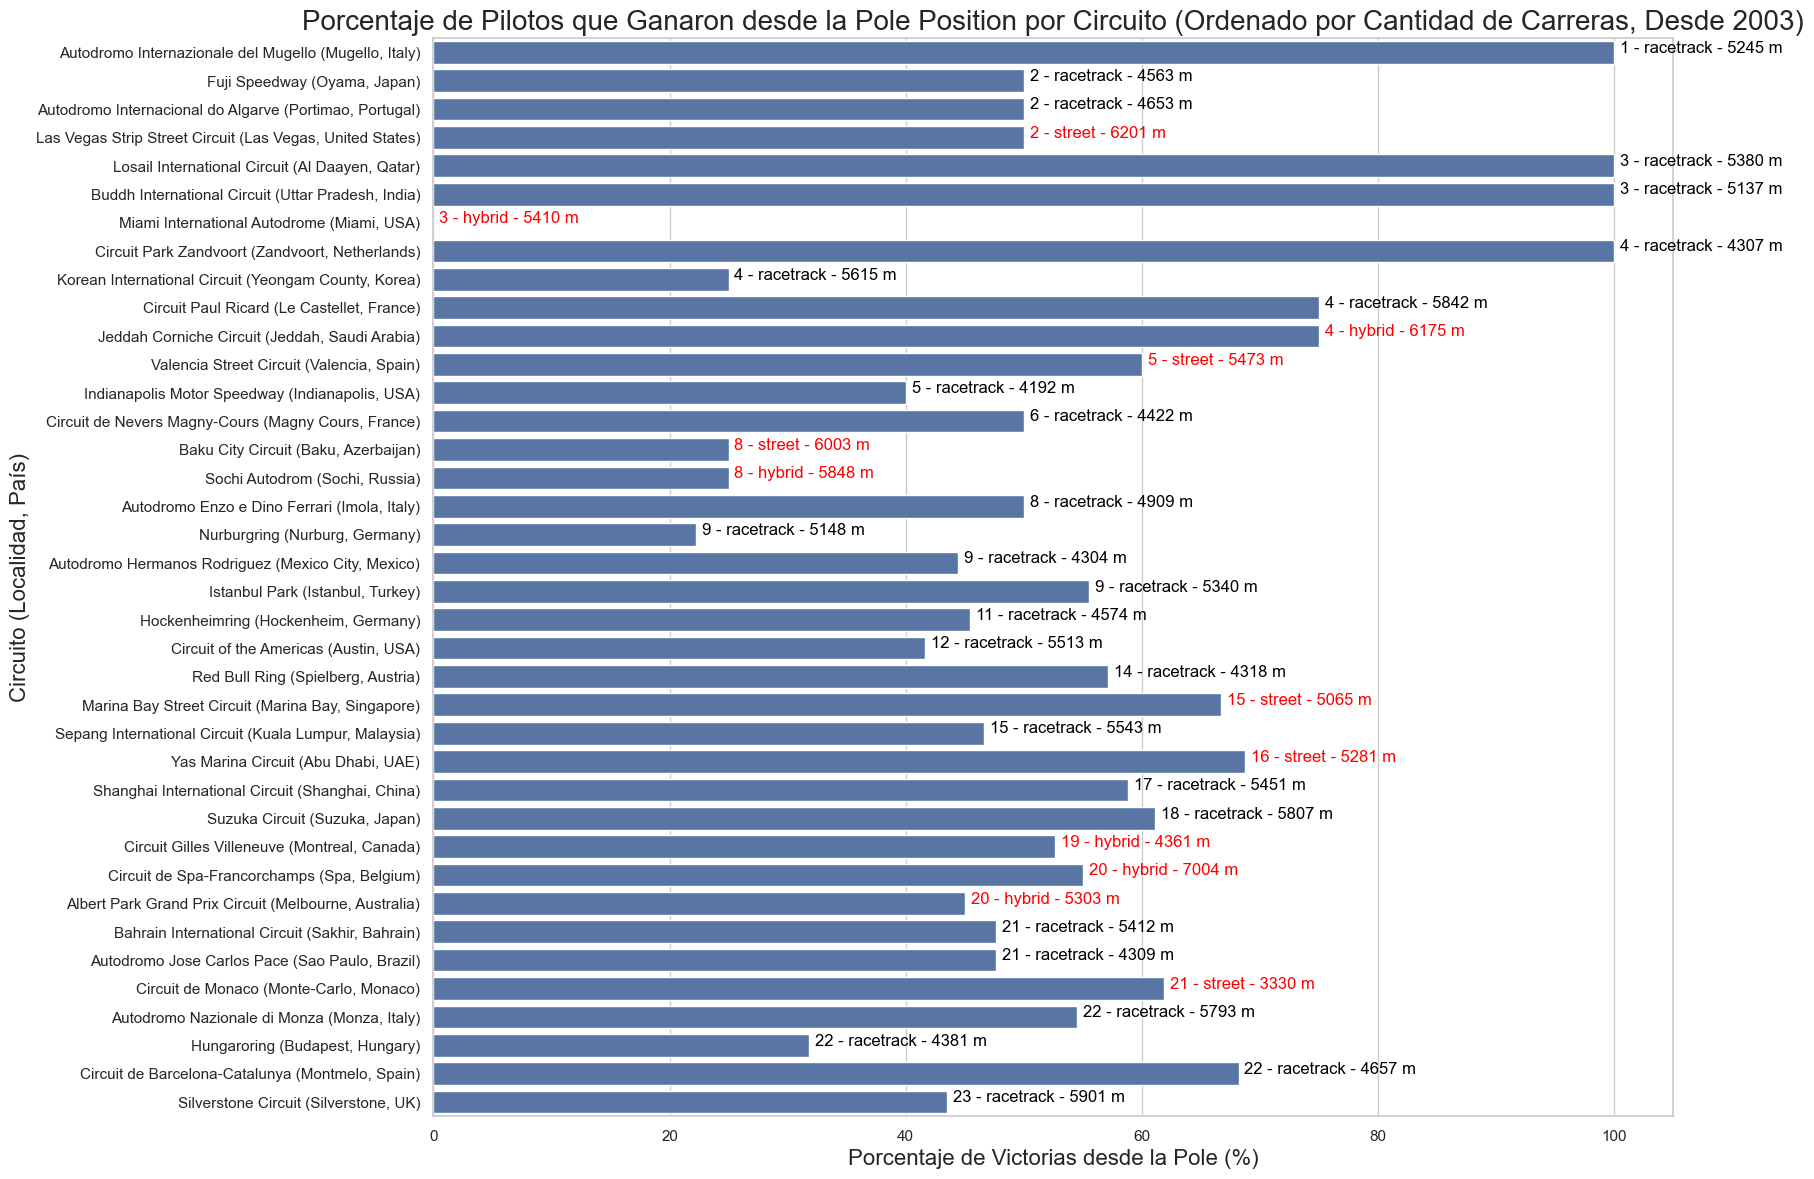

In [53]:
# Filtrar carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 1. Calcular victorias desde pole para todos los pilotos desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'type', 'length_mt', 'location', 'country']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')

# Reemplazar NaN por 0
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Crear nombre completo: nombre (localidad, país)
circuit_pole_percent['name_full'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por cantidad de carreras ascendente
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='race_count', ascending=True).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(16, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name_full')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=12)

plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito (Ordenado por Cantidad de Carreras, Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Localidad, País)', fontsize=16)
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\154849853.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\154849853.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

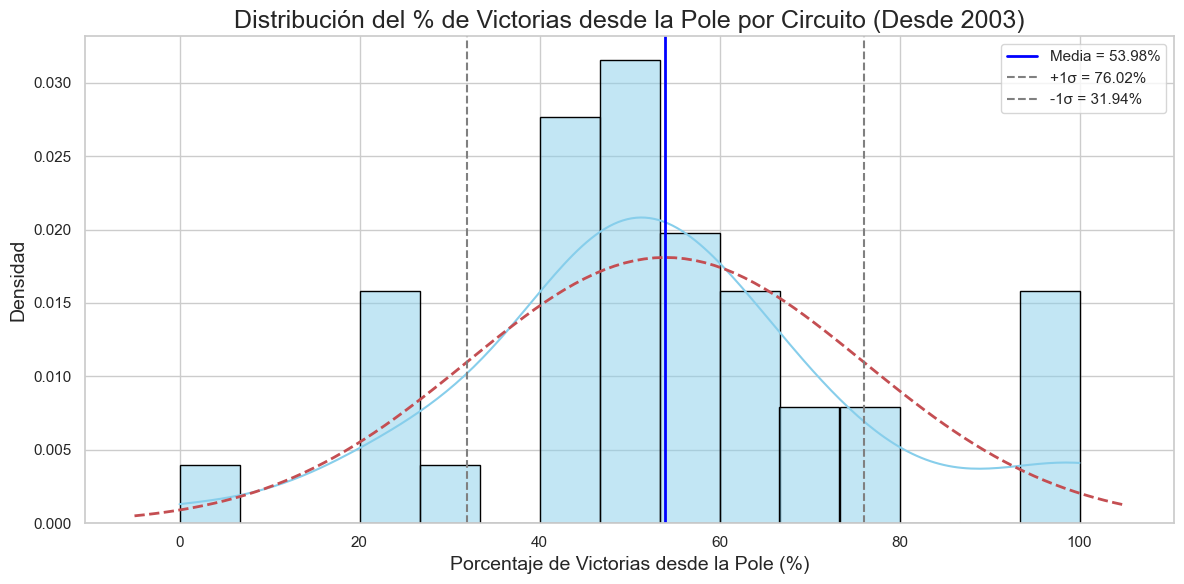

In [54]:
from scipy.stats import norm

# Mismo procesamiento previo
df_races_2003 = df_races[df_races['year'] >= 2003]

# Victorias desde la pole
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# Agregar circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# Total de victorias
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# Total de carreras
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# Unir todo
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'type', 'length_mt', 'location', 'country']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')

# Reemplazar NaN
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)

# Calcular porcentaje
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# --------- 🎯 GRAFICAR DISTRIBUCIÓN NORMAL ---------
plt.figure(figsize=(12, 6))

# Histograma con curva de densidad normal
sns.histplot(circuit_pole_percent['percent'], kde=True, stat="density", bins=15, color='skyblue', edgecolor='black')

# Ajuste a campana de Gauss
mean = circuit_pole_percent['percent'].mean()
std = circuit_pole_percent['percent'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', linewidth=2)

# Líneas de media y +/- 1 desviación estándar
plt.axvline(mean, color='blue', linestyle='-', linewidth=2, label=f"Media = {mean:.2f}%")
plt.axvline(mean + std, color='gray', linestyle='--', label=f"+1σ = {mean + std:.2f}%")
plt.axvline(mean - std, color='gray', linestyle='--', label=f"-1σ = {mean - std:.2f}%")

# Títulos
plt.title('Distribución del % de Victorias desde la Pole por Circuito (Desde 2003)', fontsize=18)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\3123366449.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\3123366449.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

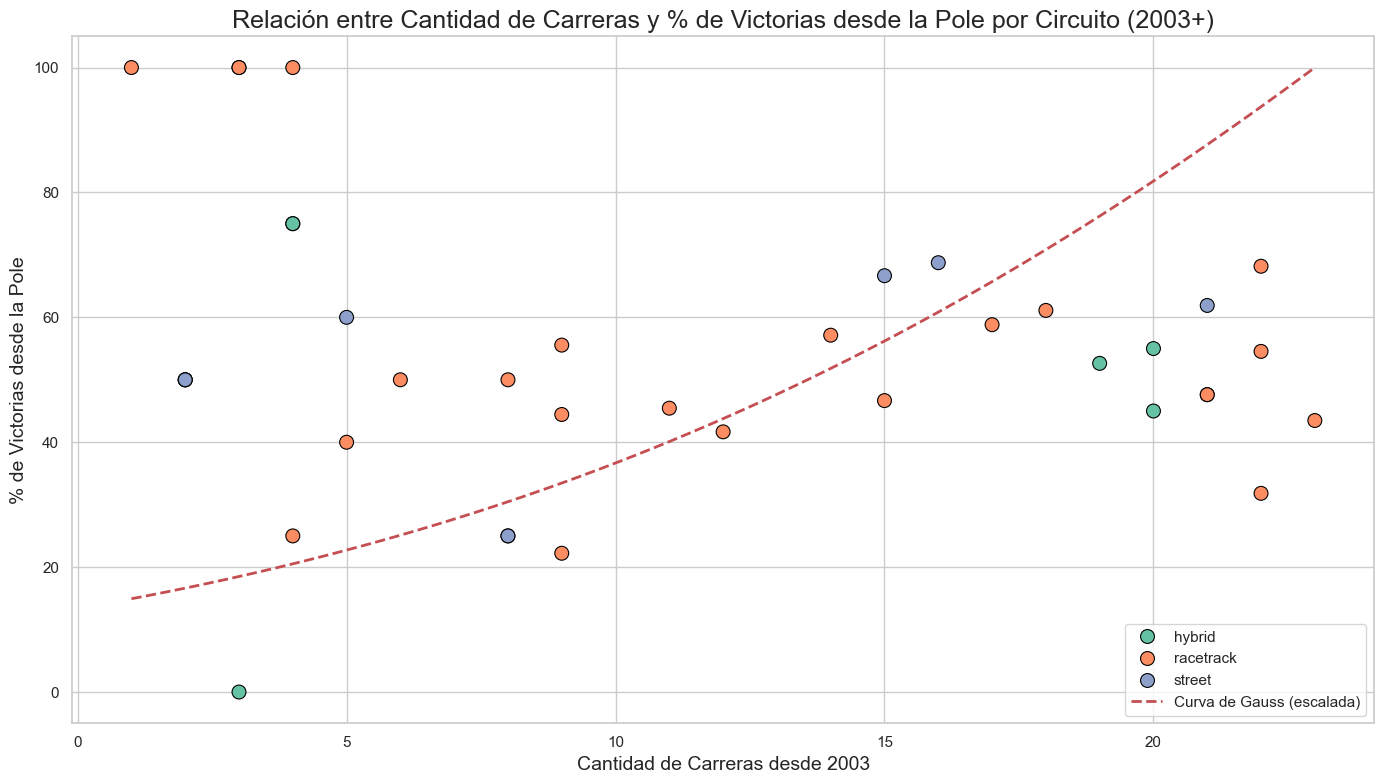

In [55]:
# Preparación de datos (idéntica al procesamiento anterior)
df_races_2003 = df_races[df_races['year'] >= 2003]

pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']],
                     df_results[['raceId', 'driverId', 'positionOrder']],
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1],
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'type', 'length_mt', 'location', 'country']],
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')

circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# ----------- 🎯 SCATTER PLOT CON CURVA DE DISTRIBUCIÓN GAUSSIANA -----------

plt.figure(figsize=(14, 8))

# Gráfico de dispersión
sns.scatterplot(data=circuit_pole_percent, x='race_count', y='percent', hue='type', s=100, palette='Set2', edgecolor='black')

# Ajuste de curva gaussiana en eje Y
x_vals = np.linspace(circuit_pole_percent['race_count'].min(), circuit_pole_percent['race_count'].max(), 100)
mean_y = circuit_pole_percent['percent'].mean()
std_y = circuit_pole_percent['percent'].std()
y_gauss = norm.pdf(x_vals, mean_y, std_y)
y_gauss = y_gauss / y_gauss.max() * max(circuit_pole_percent['percent'])  # escalar a % máximo para comparabilidad

# Graficar la curva tipo campana
plt.plot(x_vals, y_gauss, 'r--', label='Curva de Gauss (escalada)', linewidth=2)

# Etiquetas
plt.title('Relación entre Cantidad de Carreras y % de Victorias desde la Pole por Circuito (2003+)', fontsize=18)
plt.xlabel('Cantidad de Carreras desde 2003', fontsize=14)
plt.ylabel('% de Victorias desde la Pole', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\3367098344.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
C:\Users\santy\AppData\Local\Temp\ipykernel_31440\3367098344.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

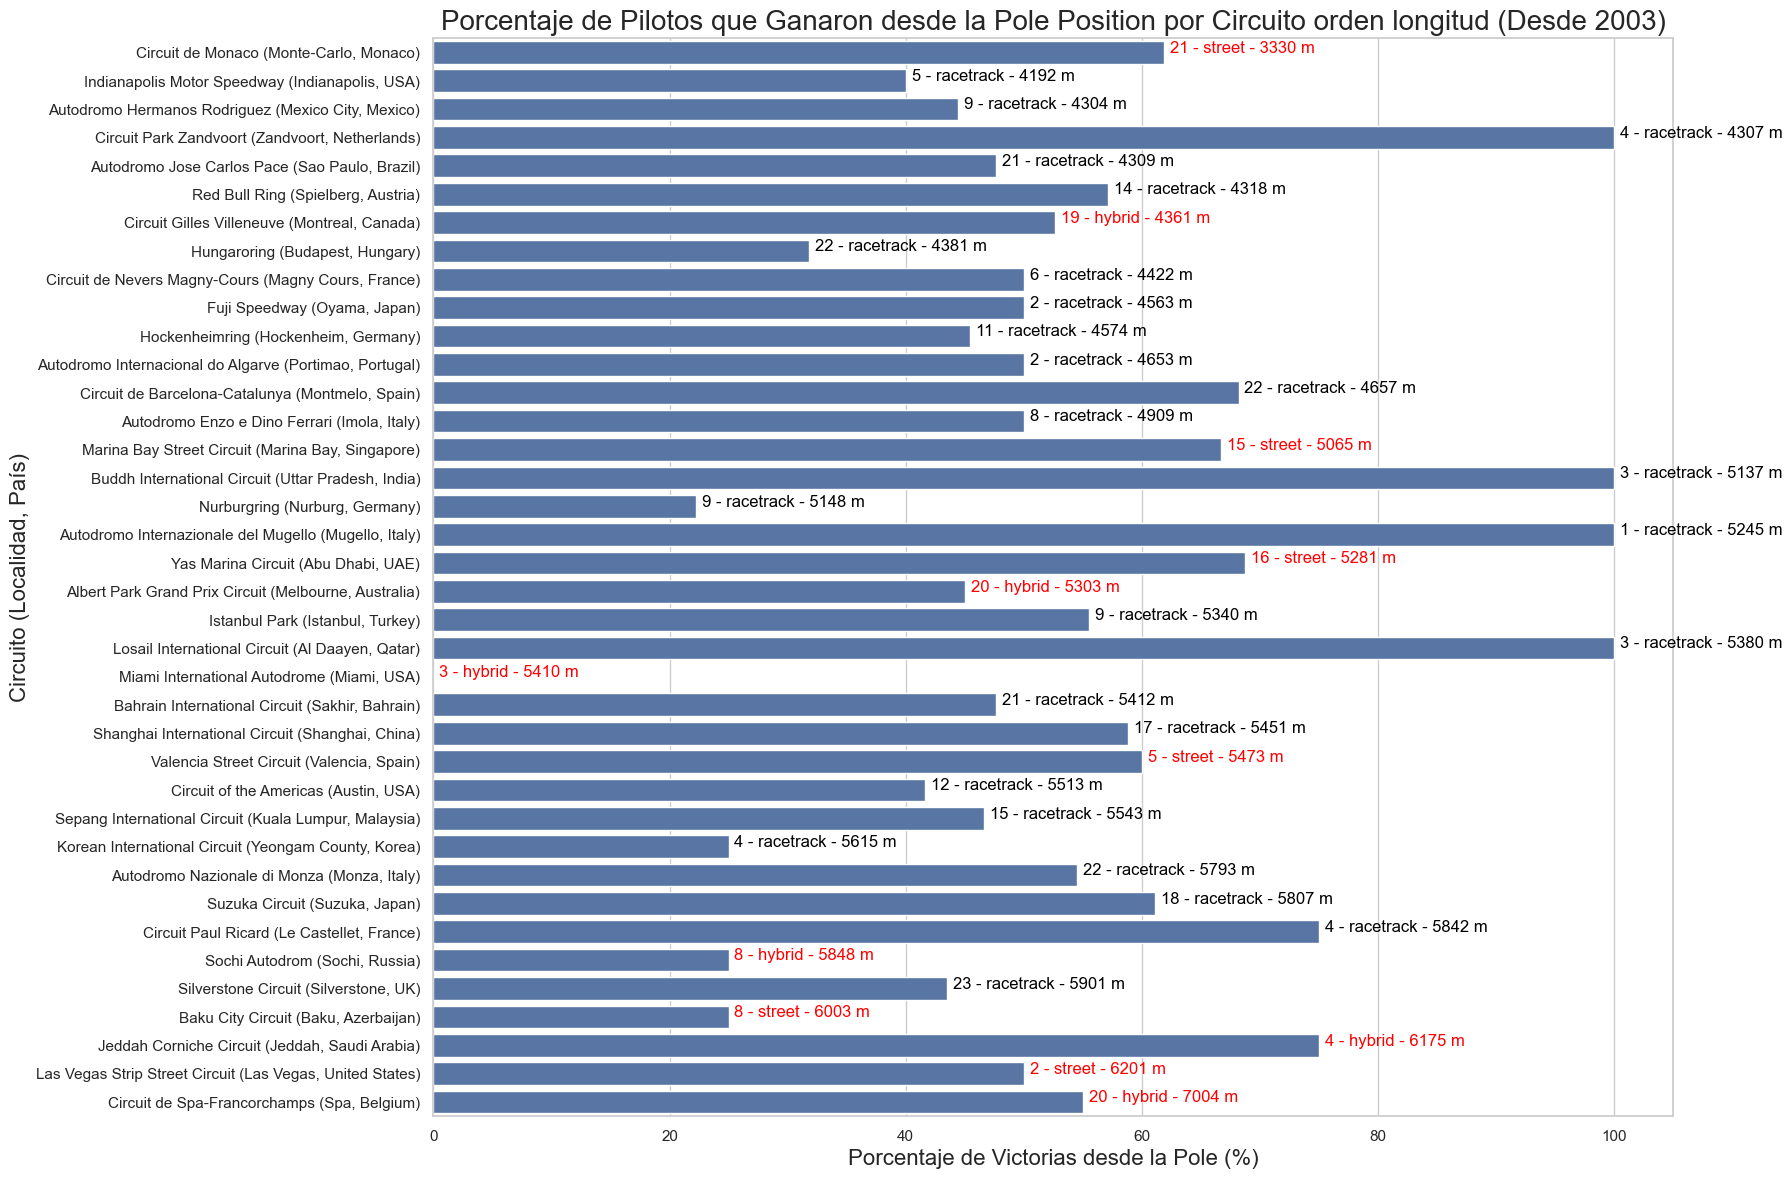

In [56]:
# Filtrar carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]

# 1. Calcular victorias desde pole para todos los pilotos desde 2003
pole_position = df_qualifying[df_qualifying['position'] == 1]
pole_wins = pd.merge(pole_position[['raceId', 'driverId']], 
                     df_results[['raceId', 'driverId', 'positionOrder']], 
                     on=['raceId', 'driverId'])
pole_wins = pole_wins[pole_wins['positionOrder'] == 1]

# 2. Agregar información del circuito
pole_wins_with_circuit = pd.merge(pole_wins, df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_pole_wins_count = pole_wins_with_circuit.groupby('circuitId').size().reset_index(name='pole_wins')

# 3. Calcular el total de victorias por circuito desde 2003
total_wins_with_circuit = pd.merge(df_results[df_results['positionOrder'] == 1], 
                                   df_races_2003[['raceId', 'circuitId']], on='raceId')
circuit_total_wins = total_wins_with_circuit.groupby('circuitId').size().reset_index(name='total_wins')

# 4. Calcular el total de carreras por circuito desde 2003
circuit_race_count = df_races_2003.groupby('circuitId').size().reset_index(name='race_count')

# 5. Unir los datos
circuit_pole_percent = pd.merge(df_circuits[['circuitId', 'name', 'type', 'length_mt', 'location', 'country']], 
                                circuit_total_wins, on='circuitId', how='inner')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_pole_wins_count, on='circuitId', how='left')
circuit_pole_percent = pd.merge(circuit_pole_percent, circuit_race_count, on='circuitId', how='left')

# Reemplazar NaN por 0
circuit_pole_percent['pole_wins'].fillna(0, inplace=True)
circuit_pole_percent['total_wins'].fillna(0, inplace=True)
circuit_pole_percent['percent'] = (circuit_pole_percent['pole_wins'] / circuit_pole_percent['total_wins'].replace(0, 1)) * 100

# Crear nombre combinado con localidad y país
circuit_pole_percent['name_full'] = circuit_pole_percent['name'] + " (" + circuit_pole_percent['location'] + ", " + circuit_pole_percent['country'] + ")"

# Ordenar por longitud del circuito en orden ascendente (o cambiar por otra columna si lo deseas)
circuit_pole_percent_sorted = circuit_pole_percent.sort_values(by='length_mt', ascending=True).reset_index(drop=True)

# 6. Graficar
plt.figure(figsize=(16, 14))
barplot = sns.barplot(data=circuit_pole_percent_sorted, x='percent', y='name_full')

# Añadir los labels de 'race_count', 'type' y 'length_mt' al final de cada barra
for index, row in circuit_pole_percent_sorted.iterrows():
    color = 'red' if row['type'] in ['street', 'hybrid'] else 'black'
    label = f"{row['race_count']} - {row['type']} - {row['length_mt']} m"
    barplot.text(row['percent'] + 0.5, index, label, color=color, ha="left", fontsize=12)

plt.title('Porcentaje de Pilotos que Ganaron desde la Pole Position por Circuito orden longitud (Desde 2003)', fontsize=20)
plt.xlabel('Porcentaje de Victorias desde la Pole (%)', fontsize=16)
plt.ylabel('Circuito (Localidad, País)', fontsize=16)
plt.show()

Para relacionar % con tipo de circuito

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2165240680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=circuit_pole_percent_sorted, x='type', y='percent', palette='Set2')


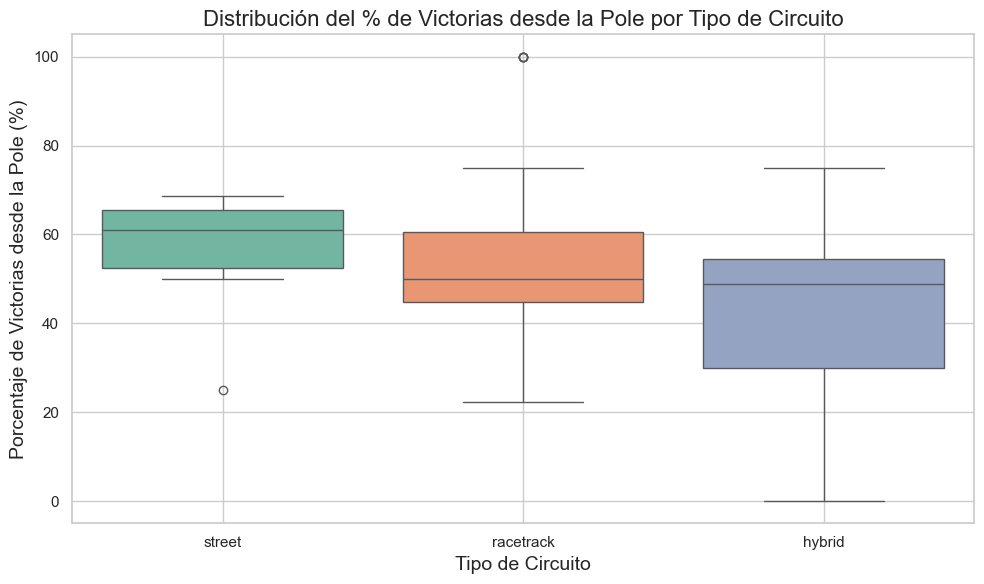

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=circuit_pole_percent_sorted, x='type', y='percent', palette='Set2')
plt.title('Distribución del % de Victorias desde la Pole por Tipo de Circuito', fontsize=16)
plt.xlabel('Tipo de Circuito', fontsize=14)
plt.ylabel('Porcentaje de Victorias desde la Pole (%)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
from scipy.stats import f_oneway

# Agrupar los porcentajes por tipo
groups = [group['percent'].values for _, group in circuit_pole_percent_sorted.groupby('type')]

# Test ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA - F-statistic: {f_stat:.4f}, p-value: {p_value:.4e}")

if p_value < 0.05:
    print("📊 Hay diferencias estadísticamente significativas entre los tipos de circuito.")
else:
    print("ℹ️ No se detectan diferencias significativas entre los grupos.")

ANOVA - F-statistic: 1.0419, p-value: 3.6346e-01
ℹ️ No se detectan diferencias significativas entre los grupos.


In [59]:
from scipy.stats import kruskal

# Test de Kruskal-Wallis
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis - H-statistic: {h_stat:.4f}, p-value: {p_value:.4e}")

if p_value < 0.05:
    print("📊 Hay diferencias estadísticamente significativas entre los tipos de circuito.")
else:
    print("ℹ️ No se detectan diferencias significativas entre los grupos.")

Kruskal-Wallis - H-statistic: 1.4650, p-value: 4.8070e-01
ℹ️ No se detectan diferencias significativas entre los grupos.


C:\Users\santy\AppData\Local\Temp\ipykernel_31440\257902485.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pole_stats['pole_wins'].fillna(0, inplace=True)


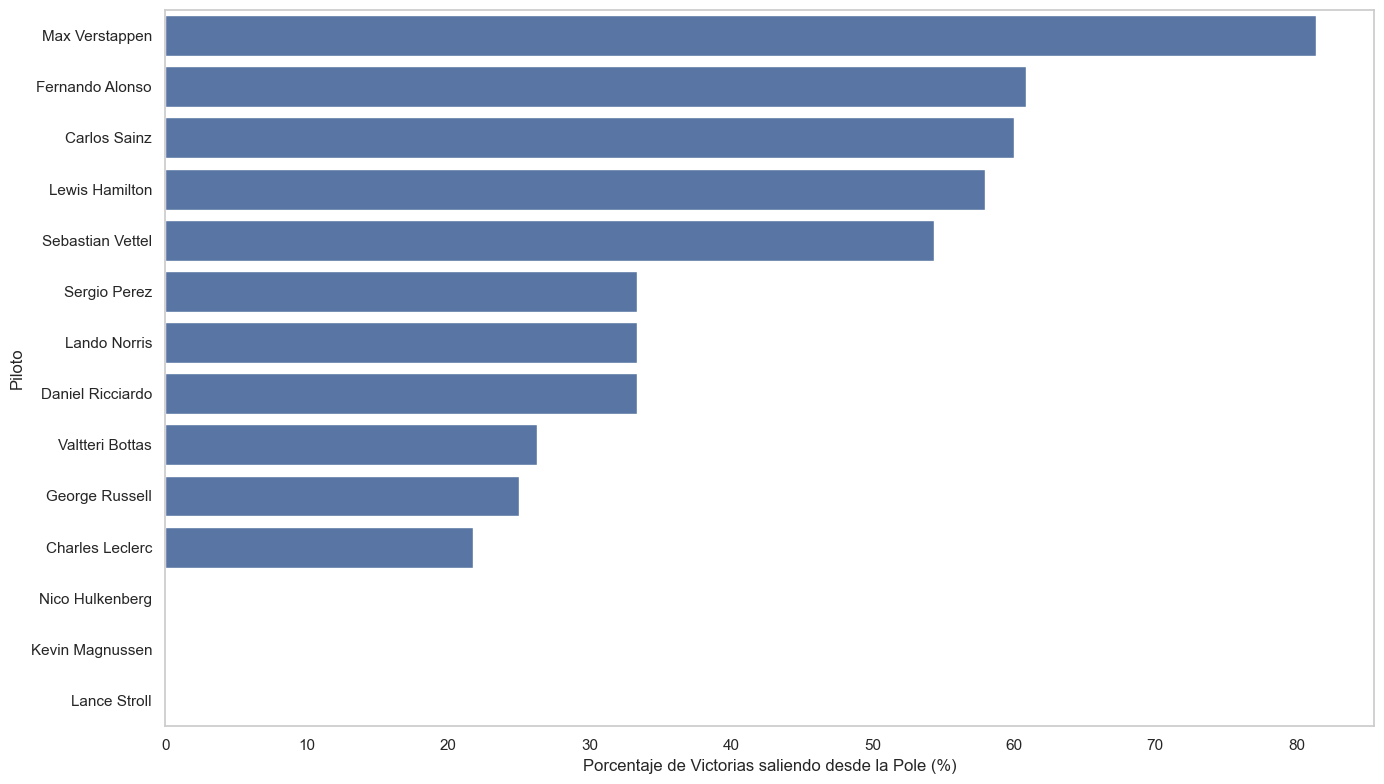

In [60]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]
races_2003_ids = df_races_2003['raceId'].unique()

# 2. Pilotos activos últimos 3 años
latest_year = df_races['year'].max()
recent_race_ids = df_races[df_races['year'] >= latest_year - 2]['raceId']
active_driver_ids = df_results[df_results['raceId'].isin(recent_race_ids)]['driverId'].unique()

# 3. Carreras por piloto desde 2003
results_2003 = df_results[df_results['raceId'].isin(races_2003_ids)]
driver_race_counts = results_2003.groupby('driverId').size().reset_index(name='race_count')
driver_race_counts = driver_race_counts[driver_race_counts['driverId'].isin(active_driver_ids)]

# 4. Top 20 pilotos con más carreras
top20_driver_ids = driver_race_counts.sort_values(by='race_count', ascending=False).head(20)['driverId']

# 5. Clasificaciones desde 2003: pilotos en pole
pole_positions = df_qualifying[(df_qualifying['position'] == 1) & 
                               (df_qualifying['raceId'].isin(races_2003_ids))]

# 6. Cuántas veces partió desde pole cada piloto
driver_poles = pole_positions[pole_positions['driverId'].isin(top20_driver_ids)]
driver_pole_counts = driver_poles.groupby('driverId').size().reset_index(name='pole_starts')

# 7. Cuántas veces ganó desde la pole
pole_wins = pd.merge(driver_poles[['raceId', 'driverId']],
                     df_results[df_results['positionOrder'] == 1][['raceId', 'driverId']],
                     on=['raceId', 'driverId'])

pole_wins_count = pole_wins.groupby('driverId').size().reset_index(name='pole_wins')

# 8. Unir poles y victorias desde pole
df_pole_stats = pd.merge(driver_pole_counts, pole_wins_count, on='driverId', how='left')
df_pole_stats['pole_wins'].fillna(0, inplace=True)

# 9. Calcular % de conversión desde pole
df_pole_stats['percent_conversion'] = (df_pole_stats['pole_wins'] / df_pole_stats['pole_starts']) * 100

# 10. Añadir nombres de pilotos
df_pole_stats = pd.merge(df_pole_stats, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_pole_stats['name'] = df_pole_stats['forename'] + ' ' + df_pole_stats['surname']

# 11. Graficar

plt.figure(figsize=(14, 8))
sns.barplot(data=df_pole_stats.sort_values(by='percent_conversion', ascending=False), 
            x='percent_conversion', y='name')

plt.xlabel('Porcentaje de Victorias saliendo desde la Pole (%)')
plt.ylabel('Piloto')
# plt.title('Pilotos Activos (últimos 3 años): % de Victorias desde la Pole (desde 2003)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\846847278.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pole_stats['pole_wins'].fillna(0, inplace=True)


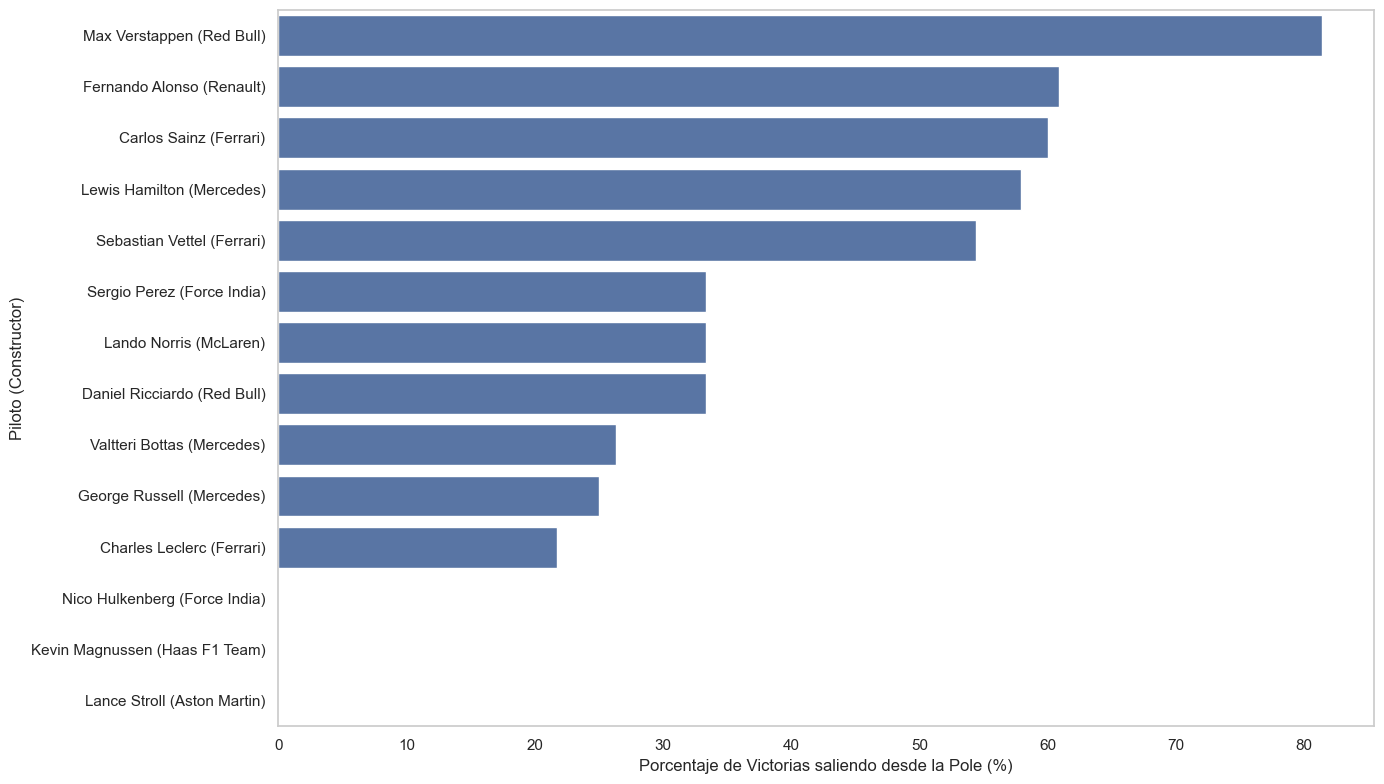

In [61]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]
races_2003_ids = df_races_2003['raceId'].unique()

# 2. Pilotos activos últimos 3 años
latest_year = df_races['year'].max()
recent_race_ids = df_races[df_races['year'] >= latest_year - 2]['raceId']
active_driver_ids = df_results[df_results['raceId'].isin(recent_race_ids)]['driverId'].unique()

# 3. Carreras por piloto desde 2003
results_2003 = df_results[df_results['raceId'].isin(races_2003_ids)]
driver_race_counts = results_2003.groupby('driverId').size().reset_index(name='race_count')
driver_race_counts = driver_race_counts[driver_race_counts['driverId'].isin(active_driver_ids)]

# 4. Top 20 pilotos con más carreras
top20_driver_ids = driver_race_counts.sort_values(by='race_count', ascending=False).head(20)['driverId']

# 5. Clasificaciones desde 2003: pilotos en pole
pole_positions = df_qualifying[(df_qualifying['position'] == 1) & 
                               (df_qualifying['raceId'].isin(races_2003_ids))]

# 6. Cuántas veces partió desde pole cada piloto
driver_poles = pole_positions[pole_positions['driverId'].isin(top20_driver_ids)]
driver_pole_counts = driver_poles.groupby('driverId').size().reset_index(name='pole_starts')

# 7. Cuántas veces ganó desde la pole
pole_wins = pd.merge(driver_poles[['raceId', 'driverId']],
                     df_results[df_results['positionOrder'] == 1][['raceId', 'driverId']],
                     on=['raceId', 'driverId'])

pole_wins_count = pole_wins.groupby('driverId').size().reset_index(name='pole_wins')

# 8. Unir poles y victorias desde pole
df_pole_stats = pd.merge(driver_pole_counts, pole_wins_count, on='driverId', how='left')
df_pole_stats['pole_wins'].fillna(0, inplace=True)

# 9. Calcular % de conversión desde pole
df_pole_stats['percent_conversion'] = (df_pole_stats['pole_wins'] / df_pole_stats['pole_starts']) * 100

# 10. Añadir nombres de pilotos
df_pole_stats = pd.merge(df_pole_stats, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_pole_stats['name'] = df_pole_stats['forename'] + ' ' + df_pole_stats['surname']

# 11. Obtener constructor principal de cada piloto (top 20 activos desde 2003)
results_2003_top20 = results_2003[results_2003['driverId'].isin(top20_driver_ids)]

driver_constructor_counts = results_2003_top20.groupby(['driverId', 'constructorId']).size().reset_index(name='count')

idx = driver_constructor_counts.groupby('driverId')['count'].idxmax()
driver_main_constructor = driver_constructor_counts.loc[idx, ['driverId', 'constructorId']]

driver_main_constructor = driver_main_constructor.merge(df_constructors[['constructorId', 'name']], on='constructorId', how='left')
driver_main_constructor.rename(columns={'name': 'constructor_name'}, inplace=True)

# 12. Añadir constructor a df_pole_stats con suffix para evitar conflictos
df_pole_stats = df_pole_stats.merge(driver_main_constructor[['driverId', 'constructor_name']], 
                                    on='driverId', how='left', suffixes=('', '_constructor'))

# 13. Cambiar nombre a 'name_x' para usar en el gráfico y concatenar constructor
df_pole_stats['name_x'] = df_pole_stats['name'] + ' (' + df_pole_stats['constructor_name'] + ')'

# 14. Graficar
plt.figure(figsize=(14, 8))
sns.barplot(data=df_pole_stats.sort_values(by='percent_conversion', ascending=False), 
            x='percent_conversion', y='name_x')

plt.xlabel('Porcentaje de Victorias saliendo desde la Pole (%)')
plt.ylabel('Piloto (Constructor)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\2709387658.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pole_stats['pole_wins'].fillna(0, inplace=True)


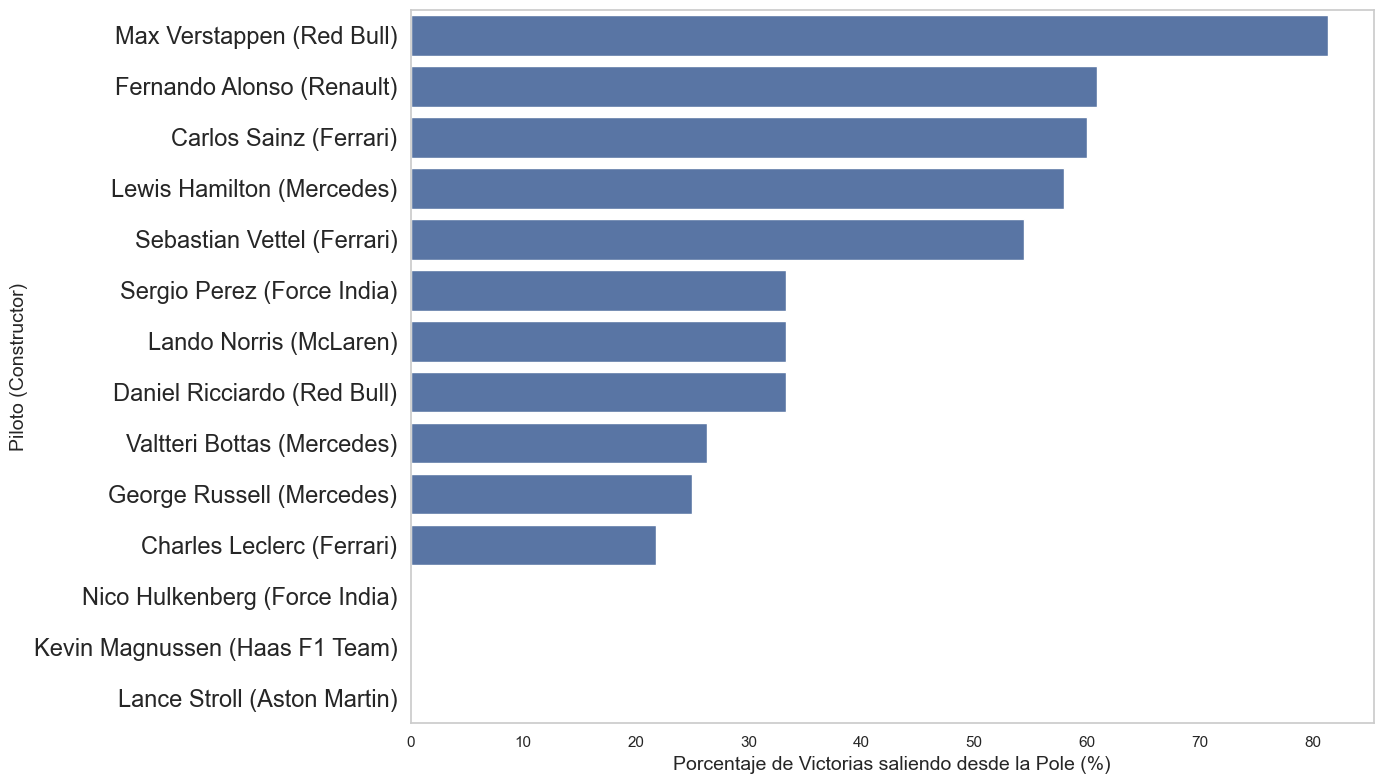

In [62]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]
races_2003_ids = df_races_2003['raceId'].unique()

# 2. Pilotos activos últimos 3 años
latest_year = df_races['year'].max()
recent_race_ids = df_races[df_races['year'] >= latest_year - 2]['raceId']
active_driver_ids = df_results[df_results['raceId'].isin(recent_race_ids)]['driverId'].unique()

# 3. Carreras por piloto desde 2003
results_2003 = df_results[df_results['raceId'].isin(races_2003_ids)]
driver_race_counts = results_2003.groupby('driverId').size().reset_index(name='race_count')
driver_race_counts = driver_race_counts[driver_race_counts['driverId'].isin(active_driver_ids)]

# 4. Top 20 pilotos con más carreras
top20_driver_ids = driver_race_counts.sort_values(by='race_count', ascending=False).head(20)['driverId']

# 5. Clasificaciones desde 2003: pilotos en pole
pole_positions = df_qualifying[(df_qualifying['position'] == 1) & 
                               (df_qualifying['raceId'].isin(races_2003_ids))]

# 6. Cuántas veces partió desde pole cada piloto
driver_poles = pole_positions[pole_positions['driverId'].isin(top20_driver_ids)]
driver_pole_counts = driver_poles.groupby('driverId').size().reset_index(name='pole_starts')

# 7. Cuántas veces ganó desde la pole
pole_wins = pd.merge(driver_poles[['raceId', 'driverId']],
                     df_results[df_results['positionOrder'] == 1][['raceId', 'driverId']],
                     on=['raceId', 'driverId'])

pole_wins_count = pole_wins.groupby('driverId').size().reset_index(name='pole_wins')

# 8. Unir poles y victorias desde pole
df_pole_stats = pd.merge(driver_pole_counts, pole_wins_count, on='driverId', how='left')
df_pole_stats['pole_wins'].fillna(0, inplace=True)

# 9. Calcular % de conversión desde pole
df_pole_stats['percent_conversion'] = (df_pole_stats['pole_wins'] / df_pole_stats['pole_starts']) * 100

# 10. Añadir nombres de pilotos
df_pole_stats = pd.merge(df_pole_stats, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_pole_stats['name'] = df_pole_stats['forename'] + ' ' + df_pole_stats['surname']

# 11. Obtener constructor principal de cada piloto (top 20 activos desde 2003)
results_2003_top20 = results_2003[results_2003['driverId'].isin(top20_driver_ids)]
driver_constructor_counts = results_2003_top20.groupby(['driverId', 'constructorId']).size().reset_index(name='count')
idx = driver_constructor_counts.groupby('driverId')['count'].idxmax()
driver_main_constructor = driver_constructor_counts.loc[idx, ['driverId', 'constructorId']]
driver_main_constructor = driver_main_constructor.merge(df_constructors[['constructorId', 'name']], on='constructorId', how='left')
driver_main_constructor.rename(columns={'name': 'constructor_name'}, inplace=True)

# 12. Añadir constructor a df_pole_stats
df_pole_stats = df_pole_stats.merge(driver_main_constructor[['driverId', 'constructor_name']], 
                                    on='driverId', how='left', suffixes=('', '_constructor'))

# 13. Concatenar nombre del piloto con el constructor
df_pole_stats['name_x'] = df_pole_stats['name'] + ' (' + df_pole_stats['constructor_name'] + ')'

# 14. Graficar con etiquetas más grandes
plt.figure(figsize=(14, 8))
sns.barplot(data=df_pole_stats.sort_values(by='percent_conversion', ascending=False), 
            x='percent_conversion', y='name_x')

# Etiquetas de ejes
plt.xlabel('Porcentaje de Victorias saliendo desde la Pole (%)', fontsize=14)
plt.ylabel('Piloto (Constructor)', fontsize=14)

# Tamaño de los nombres de pilotos + constructores
plt.yticks(fontsize=17)

# Tamaño de los ticks del eje X (opcional)
plt.xticks(fontsize=11)

plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\814004741.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pole_stats['pole_wins'].fillna(0, inplace=True)


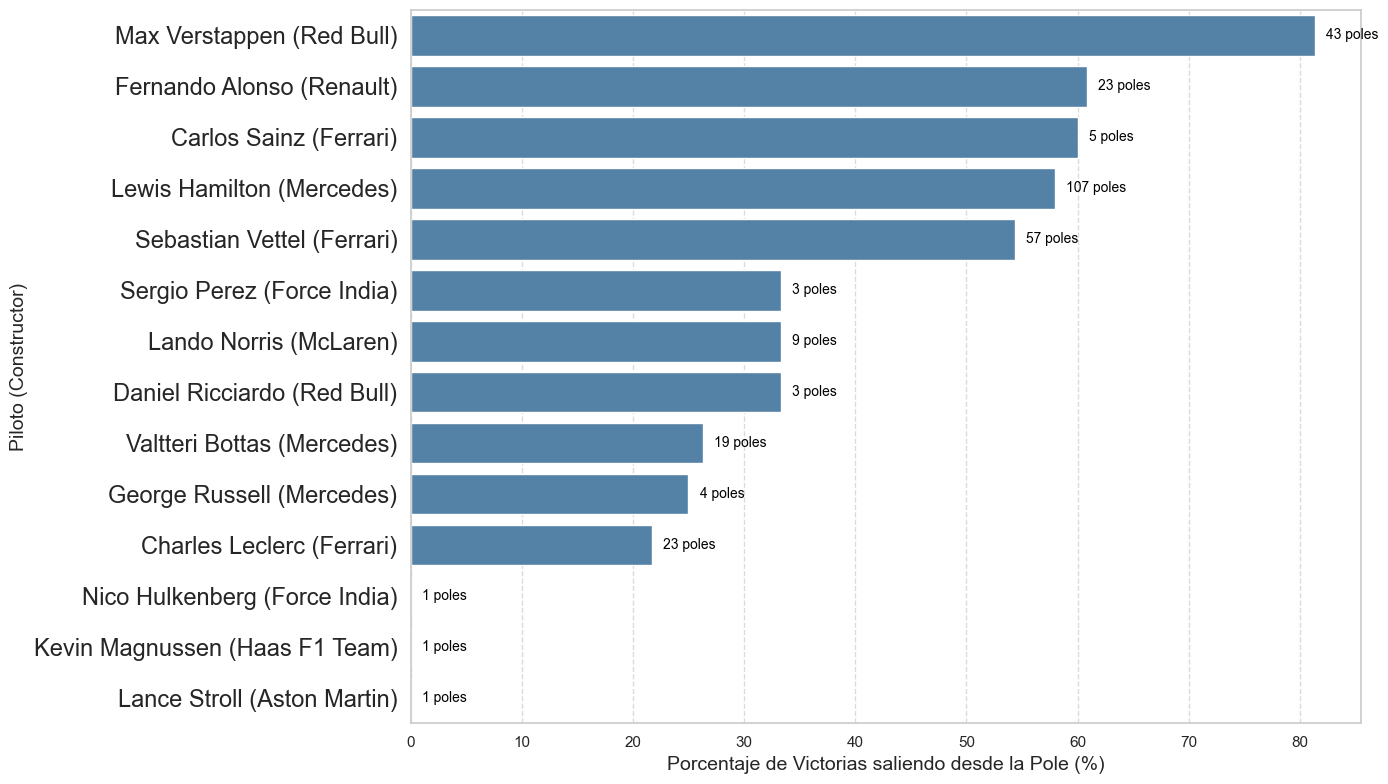

In [63]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]
races_2003_ids = df_races_2003['raceId'].unique()

# 2. Pilotos activos últimos 3 años
latest_year = df_races['year'].max()
recent_race_ids = df_races[df_races['year'] >= latest_year - 2]['raceId']
active_driver_ids = df_results[df_results['raceId'].isin(recent_race_ids)]['driverId'].unique()

# 3. Carreras por piloto desde 2003
results_2003 = df_results[df_results['raceId'].isin(races_2003_ids)]
driver_race_counts = results_2003.groupby('driverId').size().reset_index(name='race_count')
driver_race_counts = driver_race_counts[driver_race_counts['driverId'].isin(active_driver_ids)]

# 4. Top 20 pilotos con más carreras
top20_driver_ids = driver_race_counts.sort_values(by='race_count', ascending=False).head(20)['driverId']

# 5. Clasificaciones desde 2003: pilotos en pole
pole_positions = df_qualifying[(df_qualifying['position'] == 1) & 
                               (df_qualifying['raceId'].isin(races_2003_ids))]

# 6. Cuántas veces partió desde pole cada piloto
driver_poles = pole_positions[pole_positions['driverId'].isin(top20_driver_ids)]
driver_pole_counts = driver_poles.groupby('driverId').size().reset_index(name='pole_starts')

# 7. Cuántas veces ganó desde la pole
pole_wins = pd.merge(driver_poles[['raceId', 'driverId']],
                     df_results[df_results['positionOrder'] == 1][['raceId', 'driverId']],
                     on=['raceId', 'driverId'])

pole_wins_count = pole_wins.groupby('driverId').size().reset_index(name='pole_wins')

# 8. Unir poles y victorias desde pole
df_pole_stats = pd.merge(driver_pole_counts, pole_wins_count, on='driverId', how='left')
df_pole_stats['pole_wins'].fillna(0, inplace=True)

# 9. Calcular % de conversión desde pole
df_pole_stats['percent_conversion'] = (df_pole_stats['pole_wins'] / df_pole_stats['pole_starts']) * 100

# 10. Añadir nombres de pilotos
df_pole_stats = pd.merge(df_pole_stats, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_pole_stats['name'] = df_pole_stats['forename'] + ' ' + df_pole_stats['surname']

# 11. Obtener constructor principal de cada piloto (top 20 activos desde 2003)
results_2003_top20 = results_2003[results_2003['driverId'].isin(top20_driver_ids)]
driver_constructor_counts = results_2003_top20.groupby(['driverId', 'constructorId']).size().reset_index(name='count')
idx = driver_constructor_counts.groupby('driverId')['count'].idxmax()
driver_main_constructor = driver_constructor_counts.loc[idx, ['driverId', 'constructorId']]
driver_main_constructor = driver_main_constructor.merge(df_constructors[['constructorId', 'name']], on='constructorId', how='left')
driver_main_constructor.rename(columns={'name': 'constructor_name'}, inplace=True)

# 12. Añadir constructor a df_pole_stats
df_pole_stats = df_pole_stats.merge(driver_main_constructor[['driverId', 'constructor_name']], 
                                    on='driverId', how='left', suffixes=('', '_constructor'))

# 13. Concatenar nombre del piloto con el constructor
df_pole_stats['name_x'] = df_pole_stats['name'] + ' (' + df_pole_stats['constructor_name'] + ')'

# 14. Graficar con etiquetas más grandes
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=df_pole_stats.sort_values(by='percent_conversion', ascending=False), 
    x='percent_conversion', 
    y='name_x', 
    color='steelblue'  # Azul estándar
)

# Añadir el número de poles al final de cada barra
for i, (value, label) in enumerate(zip(
        df_pole_stats.sort_values(by='percent_conversion', ascending=False)['pole_starts'],
        df_pole_stats.sort_values(by='percent_conversion', ascending=False)['percent_conversion'])):
    plt.text(label + 1, i, f'{value} poles', va='center', fontsize=10, color='black')  # 1 = separación derecha

# Etiquetas de ejes
plt.xlabel('Porcentaje de Victorias saliendo desde la Pole (%)', fontsize=14)
plt.ylabel('Piloto (Constructor)', fontsize=14)
plt.yticks(fontsize=17)
plt.xticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_31440\1415439741.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pole_stats['pole_wins'].fillna(0, inplace=True)


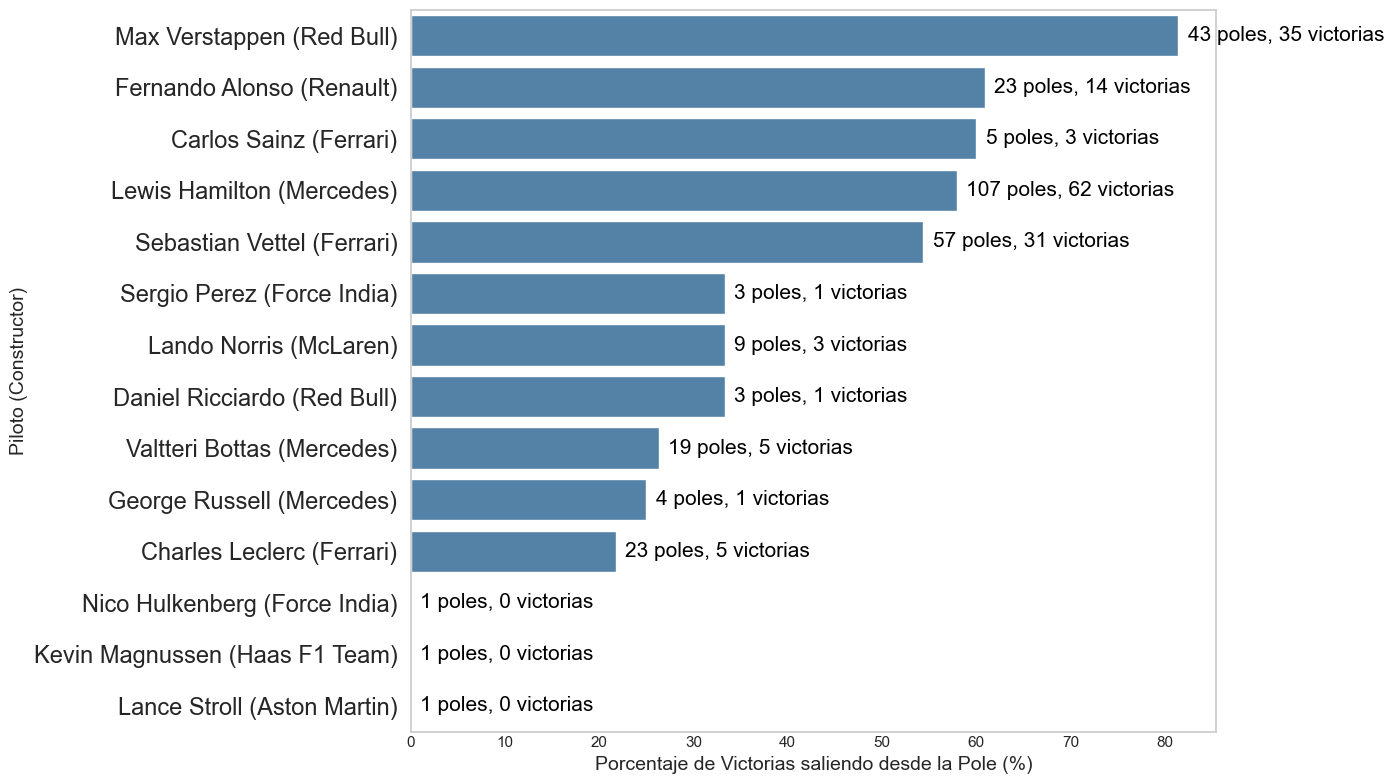

In [64]:
# 1. Carreras desde 2003
df_races_2003 = df_races[df_races['year'] >= 2003]
races_2003_ids = df_races_2003['raceId'].unique()

# 2. Pilotos activos últimos 3 años
latest_year = df_races['year'].max()
recent_race_ids = df_races[df_races['year'] >= latest_year - 2]['raceId']
active_driver_ids = df_results[df_results['raceId'].isin(recent_race_ids)]['driverId'].unique()

# 3. Carreras por piloto desde 2003
results_2003 = df_results[df_results['raceId'].isin(races_2003_ids)]
driver_race_counts = results_2003.groupby('driverId').size().reset_index(name='race_count')
driver_race_counts = driver_race_counts[driver_race_counts['driverId'].isin(active_driver_ids)]

# 4. Top 20 pilotos con más carreras
top20_driver_ids = driver_race_counts.sort_values(by='race_count', ascending=False).head(20)['driverId']

# 5. Clasificaciones desde 2003: pilotos en pole
pole_positions = df_qualifying[(df_qualifying['position'] == 1) & 
                               (df_qualifying['raceId'].isin(races_2003_ids))]

# 6. Cuántas veces partió desde pole cada piloto
driver_poles = pole_positions[pole_positions['driverId'].isin(top20_driver_ids)]
driver_pole_counts = driver_poles.groupby('driverId').size().reset_index(name='pole_starts')

# 7. Cuántas veces ganó desde la pole
pole_wins = pd.merge(driver_poles[['raceId', 'driverId']],
                     df_results[df_results['positionOrder'] == 1][['raceId', 'driverId']],
                     on=['raceId', 'driverId'])

pole_wins_count = pole_wins.groupby('driverId').size().reset_index(name='pole_wins')

# 8. Unir poles y victorias desde pole
df_pole_stats = pd.merge(driver_pole_counts, pole_wins_count, on='driverId', how='left')
df_pole_stats['pole_wins'].fillna(0, inplace=True)

# 9. Calcular % de conversión desde pole
df_pole_stats['percent_conversion'] = (df_pole_stats['pole_wins'] / df_pole_stats['pole_starts']) * 100

# 10. Añadir nombres de pilotos
df_pole_stats = pd.merge(df_pole_stats, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_pole_stats['name'] = df_pole_stats['forename'] + ' ' + df_pole_stats['surname']

# 11. Obtener constructor principal de cada piloto (top 20 activos desde 2003)
results_2003_top20 = results_2003[results_2003['driverId'].isin(top20_driver_ids)]
driver_constructor_counts = results_2003_top20.groupby(['driverId', 'constructorId']).size().reset_index(name='count')
idx = driver_constructor_counts.groupby('driverId')['count'].idxmax()
driver_main_constructor = driver_constructor_counts.loc[idx, ['driverId', 'constructorId']]
driver_main_constructor = driver_main_constructor.merge(df_constructors[['constructorId', 'name']], on='constructorId', how='left')
driver_main_constructor.rename(columns={'name': 'constructor_name'}, inplace=True)

# 12. Añadir constructor a df_pole_stats
df_pole_stats = df_pole_stats.merge(driver_main_constructor[['driverId', 'constructor_name']], 
                                    on='driverId', how='left', suffixes=('', '_constructor'))

# 13. Concatenar nombre del piloto con el constructor
df_pole_stats['name_x'] = df_pole_stats['name'] + ' (' + df_pole_stats['constructor_name'] + ')'

# 14. Graficar con etiquetas más grandes
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=df_pole_stats.sort_values(by='percent_conversion', ascending=False), 
    x='percent_conversion', 
    y='name_x', 
    color='steelblue'  # Azul estándar
)

# Añadir número de poles y victorias desde la pole al final de cada barra
sorted_stats = df_pole_stats.sort_values(by='percent_conversion', ascending=False)
for i, (poles, wins, percent) in enumerate(zip(
        sorted_stats['pole_starts'], 
        sorted_stats['pole_wins'], 
        sorted_stats['percent_conversion'])):
    plt.text(percent + 1, i, f'{poles} poles, {int(wins)} victorias', 
             va='center', fontsize=15, color='black')

# Etiquetas de ejes
plt.xlabel('Porcentaje de Victorias saliendo desde la Pole (%)', fontsize=14)
plt.ylabel('Piloto (Constructor)', fontsize=14)
plt.yticks(fontsize=17)
plt.xticks(fontsize=11)
# plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tick_params(axis='x', which='both', length=0)
plt.tight_layout()
barplot.xaxis.grid(False)
plt.show()